# Loan Default Prediction

**Project Overview**

Build a predictive model that assigns default probabilities to loan applications.
Minimize nancial risk by accurately predicting the likelihood of loan defaults, enabling
more informed and strategic lending decisions.

# Notebook Structure
---
<details>
<summary><b>1. Business Problem and Objectives</b></summary>
   Define the problem being addressed and its relevance to real-world scenarios.
</details>

---

<details>
<summary><b>2. Data Acquisition and Preparation</b></summary>

- ### **2.1 Data Source and Download**  
  Explanation of the dataset source and how it was obtained.  

- ### **2.2 Installing Required Modules**  
  List and install the libraries needed for the project.  

- ### **2.3 Importing Modules and Global Variables**  
  Set up imports and define constants or global variables.  

- ### **2.4 Defining Supplemental Functions**  
  Helper functions to streamline data processing.  

- ### **2.5 Data Loading**  
  Load the dataset into a DataFrame or suitable data structure.  

- ### **2.6 Basic Data Understanding**  
  Perform initial data exploration, including shape, columns, and types.  

</details>

---

<details>
<summary><b>3. Data Preprocessing and Feature Engineering</b></summary>

- ### **3.1 Cleaning**  

- ### **3.2 Preprocessing**  

- ### **3.3 Feature Extraction**  

</details>

---

<details>
<summary><b>4. Predictive Analysis</b></summary>

- ### **4.1 Train-Test Data Split**  
- ### **4.2 Classification with Simple Model**   
  Choose a simple base classification model and train it on the preprocessed data. Assess model performance using metrics like accuracy, precision, and recall.
- ### **4.3 Selecting Best Model for Feature Reduction**
  Deploy several advanced classification models with feature interpretability.
- ### **4.4 Feature Reduction Using Best Advanced Model**
  Reducing dataset to most important features from best performing model.        
- ### **4.5 Tuning Hyperparameters for Logistic Regression Model**
  Use parameter grid search to find the best-performing model.  
- ### **4.6 Improved Model Performance**
  Assess model performance using metrics like accuracy, precision, and recall.
- ### **4.7 Feature Interpretation**
  Visualize results and discuss findings, including strengths and limitations.
</details>

---

<details>
<summary><b>5. Conclusion</b></summary>
Summarize work.
Summarize findings, including strengths and limitations.
Suggest future work.
</details>


## 1.1 Business Problem and Objectives

**Problem Statement:**
**Key Questions:**
**Project Objectives:**


# 2. Data Acquisition and Preparation

## 2.1. Data Understanding

This section outlines the source of the data used in this project,  and provides instructions for downloading it.

**Data Sources**
**Data Relevance**
**Data Limitations**
**Download Instructions**
**Data Storage**
**Data Loading**

## 2.2 Installing Required Modules

This section focuses on installing the necessary Python libraries and packages required

1. **Requirements File**
    - We retrieve the list of required packages from a `requirements.txt` file hosted on GitHub using `wget`. This file contains the names and versions of all the dependencies.
    - This ensures that we install the correct versions of the libraries for compatibility and reproducibility.
2. **Installation using pip**
    - We use Python's `pip` package manager to install the libraries listed in the `requirements.txt` file.
    - The `-r` flag instructs `pip` to read the requirements file and install all the packages listed within.

Obtaining Data from the [Loan Default Prediction Competition](https://www.kaggle.com/competitions/home-credit-default-risk/overview) on **Kaggle:**

Before accessing the loan default prediction data, you must first join the competition and agree to its specific Terms & Conditions. Follow the step:

1. Create/Log In to Your Kaggle Account.
2. Navigate to the Competition Page. This page will have all the relevant details about the competition, including the rules and guidelines.
3. Click the “Join Competition” button. This action will prompt you to review and agree to the competition's Terms & Conditions. You must accept these terms before you can access the data.
4. Downloading the Dataset.
  
  a) **Manual Download**. After joining and agreeing to the terms, use the download button provided on the competition page to download the dataset directly to your computer.

  b) **Using the Kaggle API**. If you prefer using the command line, install the Kaggle API.

  `!pip install kaggle`

  Next, ensure your Kaggle API credentials (found in your account settings) are correctly set up (typically by placing the kaggle.json file in the ~/.kaggle/ directory). Then, run:

  `!kaggle competitions download -c home-credit-default-risk`

In [1]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Upload your kaggle.json file here
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


This block of code will download the dataset into either `/content` if environment is `Colab`, or into local `Downloads` folder.

In [2]:
# Download the dataset !kaggle competitions download -c home-credit-default-risk
# A fancier way of doing the kaggle download with try-catch block, if notebook is executed locally
import subprocess

try:
    # Run the Kaggle dataset download command
    result = subprocess.run(
        ["kaggle", "competitions", "download", "-c", "home-credit-default-risk"],
        check=True,  # Raise an exception if the command fails
        text=True,   # Capture output as text
        capture_output=True  # Capture stdout and stderr
    )
    print("Dataset downloaded successfully!")
    print(result.stdout)  # Print the command output
except subprocess.CalledProcessError as e:
    print("Error occurred while downloading the dataset.")
    print(f"Return code: {e.returncode}")
    print(f"Error output: {e.stderr}")
except FileNotFoundError:
    print("Kaggle CLI is not installed. Please install it and ensure it's in your PATH.")

Dataset downloaded successfully!




This block of code contains supplemental functions that will extra ct and move datasets into defailt `data` directory.  

In [3]:
# Import modules
import os
import zipfile
import requests

# Function checks if directory exists
def ensure_directory(path):
    """
    Ensure that a directory exists. If not, create it.
    """
    os.makedirs(path, exist_ok=True)
    print(f"Directory ensured: {path}")

# Function downloads files
def download_files(base_url, file_names, destination_dir):
    """
    Download a list of files from a base URL to a specified directory.

    Args:
    - base_url (str): The base URL for the files.
    - file_names (list): List of filenames to download.
    - destination_dir (str): Directory to save the downloaded files.
    """
    for file_name in file_names:
        url = f"{base_url}/{file_name}"
        dest_path = os.path.join(destination_dir, file_name)
        if not os.path.exists(dest_path):
            print(f"Downloading {file_name}...")
            response = requests.get(url)
            response.raise_for_status()
            with open(dest_path, "wb") as f:
                f.write(response.content)
            print(f"Downloaded: {file_name}")
        else:
            print(f"File already exists: {file_name}")

# Function unzips archive into directory
def unzip_dataset(zip_path, destination_dir):
    """
    Unzip a dataset into the specified directory.

    Args:
    - zip_path (str): Path to the zip file.
    - destination_dir (str): Directory to extract the zip contents.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)
    print(f"Unzipped: {zip_path} to {destination_dir}")

# Function to determine data directory, depending on runtime environment.

def determine_data_dir():
    """
    Determines the data directory based on the execution environment:
    - Local: Uses 'Data' directory in the current working directory.
    - Cloud (e.g., Google Colab): Uses '/content' as the data directory.

    Returns:
        str: Path to the appropriate data directory.
    """
    if 'COLAB_GPU' in os.environ:  # Check if running in Google Colab
        data_dir = "/content/data"
        print(f"Running in Google Colab. Using data directory: {data_dir}")
    else:
        data_dir = os.path.join(os.getcwd(), "data")
        print(f"Running locally. Using data directory: {data_dir}")

        # Ensure the 'data' directory exists locally
        if not os.path.isdir(data_dir):
            print(f"The directory '{data_dir}' does not exist. Please create it and place the data files there.")
            raise FileNotFoundError(f"'{data_dir}' directory is required for local execution.")

    return data_dir

This block of code syncs repository structure with colab or local version.

In [4]:
# Check data directories
data_dir = determine_data_dir()

# Get the parent directory of data_dir
base_dir = os.path.dirname(data_dir)
models_dir = os.path.join(base_dir, "models")
images_dir = os.path.join(base_dir, "images")

# Ensure directories exist
ensure_directory(data_dir)
ensure_directory(models_dir)
ensure_directory(images_dir)

# Dataset path
zip_file_path_dataset = os.path.join("home-credit-default-risk.zip")

# Check if the file exists
if os.path.exists(zip_file_path_dataset):
    print("File found. Proceeding to unzip...")
    # Unzip dataset
    unzip_dataset("home-credit-default-risk.zip", data_dir)
    # Remove after unzipping
    os.remove(zip_file_path_dataset)
    print(f"Removed ZIP file: {zip_file_path_dataset}")
else:
    print("File not found. Please check the path or download the Dataset from Kaggle.")

# Download supplemental data
github_base_url = "https://raw.githubusercontent.com/leksea/loan-default-prediction/main/data"
supplemental_files = [
]
download_files(github_base_url, supplemental_files, data_dir)

# Download model into models directory
model_base_url = "https://raw.githubusercontent.com/leksea/loan-default-prediction/main/models"
model_files = [
]
download_files(model_base_url, model_files, models_dir)
print("Setup complete.")

Running in Google Colab. Using data directory: /content/data
Directory ensured: /content/data
Directory ensured: /content/models
Directory ensured: /content/images
File found. Proceeding to unzip...
Unzipped: home-credit-default-risk.zip to /content/data
Removed ZIP file: home-credit-default-risk.zip
Setup complete.


# 2.3 Importing Modules and Global Variables

In [5]:
# All imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.4 Defining Supplemental Functions

In [6]:
# supplemental functions go here

# 2.5 Data Loading

In [7]:
## Loading the files
# determine the data directory
data_dir = determine_data_dir()

df_col_desc = pd.read_csv(os.path.join(data_dir, 'HomeCredit_columns_description.csv'), encoding='latin1')
df_application_train = pd.read_csv(os.path.join(data_dir, 'application_train.csv'), encoding='latin1')
df_application_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'), encoding='latin1')
df_bureau = pd.read_csv(os.path.join(data_dir, 'bureau.csv'), encoding='latin1')
df_bureau_balance = pd.read_csv(os.path.join(data_dir, 'bureau_balance.csv'), encoding='latin1')
df_credit_card_balance = pd.read_csv(os.path.join(data_dir, 'credit_card_balance.csv'), encoding='latin1')
df_installments_payments = pd.read_csv(os.path.join(data_dir, 'installments_payments.csv'), encoding='latin1')
df_POS_CASH_balance = pd.read_csv(os.path.join(data_dir, 'POS_CASH_balance.csv'), encoding='latin1')
df_previous_application = pd.read_csv(os.path.join(data_dir, 'previous_application.csv'), encoding='latin1')
df_application_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'), encoding='latin1')

Running in Google Colab. Using data directory: /content/data


# 2.6 Basic Data Understanding

Running built-in functions to gain insights about the data frames.
Start with printing the dataframe with column description, folllowed by calling `pandas` built-in methods `describe` and `info` on all loaded dataframes to get an idea about data distribution.

In [8]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# print full dataframe
df_col_desc

Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

In [9]:
# print 10 random rows from all dataframes
df_bureau.sample(10, random_state=42)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1236926      305481       5916012        Closed      currency 1        -1531   
904815       288975       5667606        Closed      currency 1        -2263   
849614       309911       6052617        Closed      currency 1         -932   
16038        358247       6025723        Closed      currency 1         -800   
124732       452117       5242575        Closed      currency 1         -782   
1101941      100251       5777091        Closed      currency 1        -1734   
848833       416285       6051737        Closed      currency 1        -1463   
646158       284751       6150346        Closed      currency 1         -600   
421603       433752       5742147        Active      currency 1         -788   
165538       246369       6364518        Closed      currency 1         -556   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1236926                   0               -435.0             -846.0   
904815                    0              -1166.0            -1165.0   
849614                    0                911.0             -233.0   
16038                     0                -70.0             -636.0   
124732                    0               -417.0             -415.0   
1101941                   0               -630.0             -920.0   
848833                    0               1094.0             -672.0   
646158                    0               -423.0             -423.0   
421603                    0                524.0                NaN   
165538                    0               -405.0             -427.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1236926                     NaN                   0       450000.00   
904815                      NaN                   0       169884.00   
849614                      NaN                   0       112500.00   
16038                       NaN                   0       140611.50   
124732                    0.000                   0        43960.50   
1101941               13768.965                   0       135000.00   
848833                      NaN                   0       675000.00   
646158                 6999.570                   0        43903.35   
421603                      NaN                   0       135000.00   
165538                      NaN                   0        19179.72   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1236926                 0.00                   NaN                     0.0   
904815                  0.00                  0.00                     0.0   
849614                  0.00                   NaN                     0.0   
16038                    NaN                   NaN                     0.0   
124732                  0.00                  0.00                     0.0   
1101941               -39.51                 39.51                     0.0   
848833                  0.00                  0.00                     0.0   
646158                  0.00                  0.00                     0.0   
421603             119322.00                  0.00                     0.0   
165538                  0.00                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
1236926      Credit card                -846          0.0  
904815   Consumer credit               -1164          NaN  
849614       Credit card                -228          NaN  
16038    Consumer credit                -636          0.0  
124732   Consumer credit                -415          NaN  
1101941      Credit card                -920          NaN  
848833   Consumer credit                -521          0.0  
646158   Consumer credit                -423          NaN  
421603       Credit card                -101          NaN  
165538   Consumer credit                -423          NaN

In [10]:
df_bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [11]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [12]:
df_bureau_balance.sample(10, random_state=42)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
10077170       6423524             -10      X
15189524       6059583             -20      0
6921920        6298033             -70      C
2380938        6562465              -2      0
21676529       5929260             -31      C
17077395       5514685             -22      C
12606922       5022798             -21      C
24611635       6647764              -4      C
15965686       5067718             -38      C
20810643       5401506             -73      C

In [13]:
df_bureau_balance.describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [14]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [15]:
df_credit_card_balance.sample(10, random_state=42)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
2515502     2229653      284348             -45   136399.635   
1307940     1786293      156412             -77        0.000   
318549      2199394      397441             -88        0.000   
2558004     1171732      364620              -6   345647.430   
3802735     1798989      361308             -69    93392.505   
3627168     2226483      285606             -55        0.000   
595909      2776410      188469             -13        0.000   
307514      2248451      407521             -94    91346.670   
2974906     1083061      159207              -8    22897.350   
2575153     1052719      109803             -48    77550.030   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
2515502                   135000                       0.0   
1307940                    90000                       0.0   
318549                    180000                       0.0   
2558004                   337500                   84600.0   
3802735                   202500                       0.0   
3627168                   112500                       0.0   
595909                     45000                       NaN   
307514                     90000                    4500.0   
2974906                    90000                   45000.0   
2575153                   135000                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
2515502                  0.00                         0.0   
1307940                  0.00                         0.0   
318549                   0.00                         0.0   
2558004              84600.00                         0.0   
3802735                  0.00                         0.0   
3627168                  0.00                         0.0   
595909                   0.00                         NaN   
307514                4500.00                         0.0   
2974906             105373.35                         0.0   
2575153                  0.00                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
2515502                      0.00                 6750.000   
1307940                      0.00                    0.000   
318549                       0.00                 9000.000   
2558004                      0.00                16579.215   
3802735                      0.00                10125.000   
3627168                      0.00                   67.500   
595909                        NaN                    0.000   
307514                       0.00                 4500.000   
2974906                  60373.35                 2985.525   
2575153                      0.00                 9450.000   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
2515502                 0.00                      0.000   
1307940              1275.84                      0.000   
318549             115200.00                 115200.000   
2558004             16650.00                  16650.000   
3802735             22500.00                  22500.000   
3627168               652.50                     86.445   
595909                   NaN                      0.000   
307514               4500.00                   4500.000   
2974906             45000.00                  45000.000   
2575153             18000.00                   8550.000   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
2515502                126236.880     136399.635            136399.635   
1307940                     0.000          0.000                 0.000   
318549                      0.000          0.000                 0.000   
2558004                312288.525     335103.930            335103.930   
3802735                 88767.720      93392.505             93392.505   
3627168                     0.000          0.000                 0.000   
595909                      0.000          0.000                 0.000   
307514                  

In [16]:
df_credit_card_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

In [17]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [18]:
df_installments_payments.sample(10, random_state=42)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
5672587      2652367      232137                     0.0   
566432       1845882      167969                     1.0   
1780626      2430317      105881                     1.0   
2601634      1052426      170461                     1.0   
4353865      2148550      265570                     0.0   
10557626     1576797      351755                     1.0   
11330874     1956223      315408                     1.0   
5765003      1396186      244627                     1.0   
6769453      2426282      296187                     1.0   
13578050     1017530      420419                     0.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
5672587                      18          -2398.0             -2403.0   
566432                       14           -136.0              -140.0   
1780626                      15           -120.0              -120.0   
2601634                       7          -1083.0             -1090.0   
4353865                      47          -1125.0             -1128.0   
10557626                     10           -702.0              -700.0   
11330874                     10          -2267.0             -2263.0   
5765003                       3           -752.0              -755.0   
6769453                      10          -1253.0             -1256.0   
13578050                      8           -140.0              -140.0   

          AMT_INSTALMENT  AMT_PAYMENT  
5672587         4500.000     4500.000  
566432          8043.480     8043.480  
1780626        48222.855    48222.855  
2601634        11721.735    11721.735  
4353865         7875.000     7875.000  
10557626        9994.455     8850.600  
11330874       12371.805    12356.550  
5765003        14588.910    14588.910  
6769453         2498.940     2498.940  
13578050         855.585      855.585

In [19]:
df_installments_payments.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [20]:
df_installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [21]:
df_POS_CASH_balance.sample(10, random_state=42)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
6385902     1141316      278001             -37            12.0   
389847      2682740      248899             -67            12.0   
7302029     2136647      209965             -73            18.0   
6010681     1678541      432875              -8            24.0   
2031441     1870173      117636             -86            10.0   
2774140     1051061      380942              -4            36.0   
5655609     2405023      377666             -16            12.0   
464999      2174435      205035             -23            36.0   
1866748     1709974      173223             -27            12.0   
5763961     1790808      177150              -4            11.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
6385902                    0.0            Completed       0           0  
389847                     4.0               Active       0           0  
7302029                   18.0               Active       0           0  
6010681                   16.0               Active       0           0  
2031441                    7.0               Active       0           0  
2774140                   32.0               Active       0           0  
5655609                    7.0               Active       0           0  
464999                    35.0               Active       0           0  
1866748                   12.0               Active       0           0  
5763961                    0.0            Completed       0           0

In [22]:
df_POS_CASH_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [23]:
df_POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [24]:
df_previous_application.sample(10, random_state=42)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
876718      1327604      127360     Consumer loans     5318.100   
1463966     1830718      218834         Cash loans    19737.945   
354631      1258084      104079     Consumer loans     3304.710   
408441      2257201      389250     Consumer loans    10912.545   
37031       1038283      385546         Cash loans          NaN   
1661444     2463161      191453         Cash loans    23986.890   
1205033     1852429      234120         Cash loans    23965.830   
756582      1870639      250203         Cash loans    56076.705   
1065283     1479977      448956         Cash loans          NaN   
1386175     2644815      376118     Consumer loans    12146.265   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
876718           27616.5     26082.0            2763.0          27616.5   
1463966         135000.0    165226.5               NaN         135000.0   
354631           36184.5     32562.0            3622.5          36184.5   
408441          240948.0    240948.0               0.0         240948.0   
37031                0.0         0.0               NaN              NaN   
1661444         373500.0    408010.5               NaN         373500.0   
1205033         225000.0    239850.0               NaN         225000.0   
756582          450000.0    532516.5               NaN         450000.0   
1065283              0.0         0.0               NaN              NaN   
1386175         116955.0     93555.0           23400.0         116955.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
876718                   WEDNESDAY                       10   
1463966                  WEDNESDAY                        8   
354631                      FRIDAY                       11   
408441                    SATURDAY                        9   
37031                     THURSDAY                       13   
1661444                     MONDAY                       10   
1205033                  WEDNESDAY                       15   
756582                      MONDAY                       13   
1065283                     FRIDAY                       13   
1386175                     SUNDAY                       18   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
876718                            Y                       1   
1463966                           Y                       1   
354631                            Y                       1   
408441                            Y                       1   
37031                             Y                       1   
1661444                           Y                       1   
1205033                           Y                       1   
756582                            Y                       1   
1065283                           Y                       1   
1386175                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
876718            0.104322                    NaN                       NaN   
1463966                NaN                    NaN                       NaN   
354631            0.109031                    NaN                       NaN   
408441            0.000000                    NaN                       NaN   
37031                  NaN                    NaN                       NaN   
1661444                NaN                    NaN                       NaN   
1205033                NaN                    NaN                       NaN   
756582                 NaN                    NaN                       NaN   
1065283                NaN                    NaN                       NaN   
1386175           0.217902                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
876718                     XAP             Approved          -1210   
1463966                    XNA             Appr

In [25]:
df_previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [26]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [27]:
df_application_test.sample(10, random_state=42)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
15071      208550         Cash loans           M            Y               Y   
10157      173779         Cash loans           F            N               Y   
36313      365820         Cash loans           F            Y               N   
6017       144092         Cash loans           M            N               Y   
26319      291599         Cash loans           M            N               N   
43717      418609         Cash loans           F            N               Y   
40594      398791         Cash loans           F            N               Y   
14238      202661         Cash loans           M            N               Y   
11713      185171         Cash loans           M            Y               Y   
1655       111761         Cash loans           F            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
15071             2          450000.0    854896.5      36351.0   
10157             0           67500.0    296280.0      19062.0   
36313             0          135000.0    339948.0      35694.0   
6017              0          256500.0    609898.5      31270.5   
26319             1          180000.0    450000.0      22977.0   
43717             1          180000.0    410476.5      31896.0   
40594             0          112500.0    495000.0      25272.0   
14238             0          360000.0   1024740.0      52452.0   
11713             0          157500.0    369000.0      38875.5   
1655              0          337500.0   2013840.0      62640.0   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
15071         702000.0   Unaccompanied               Working   
10157         225000.0   Unaccompanied             Pensioner   
36313         315000.0   Unaccompanied  Commercial associate   
6017          526500.0   Unaccompanied               Working   
26319         450000.0   Unaccompanied               Working   
43717         373500.0   Unaccompanied  Commercial associate   
40594         495000.0   Unaccompanied         State servant   
14238         900000.0   Unaccompanied               Working   
11713         369000.0   Unaccompanied               Working   
1655         1800000.0   Unaccompanied  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15071               Higher education               Married  House / apartment   
10157               Higher education  Single / not married  House / apartment   
36313  Secondary / secondary special               Married  House / apartment   
6017   Secondary / secondary special               Married  House / apartment   
26319  Secondary / secondary special               Married  House / apartment   
43717  Secondary / secondary special  Single / not married  House / apartment   
40594  Secondary / secondary special               Married  House / apartment   
14238               Higher education               Married  House / apartment   
11713  Secondary / secondary special               Married  House / apartment   
1655                Higher education               Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15071                    0.032561      -11348          -1149   
10157                    0.009175      -19852         365243   
36313                    0.024610      -15138          -4891   
6017                     0.002042      -15214          -2773   
26319                    0.018029      -15806          -5816   
43717                    0.008625      -15720          -2961   
40594                    0.011703      -16884          -1407   
14238                    0.009549      -22810          -4049   
11713                    0.028663      -18381          -1185   
1655                     0.032561      -17232          -1084   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
15071           

In [28]:
df_application_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  48744.000000   48744.000000       48744.000000     48744.000000   
mean  -16068.084605   67485.366322       -4967.652716     -3051.712949   
std     4325.900393  144348.507136        3552.612035      1569.276709   
min   -25195.000000  -17463.000000      -23722.000000     -6348.000000   
25%   -19637.000000   -2910.000000       -7459.250000     -4448.000000   
50%   -15785.000000   -1293.000000       -4490.000000     -3234.000000   
75%   -12496.000000    -296.000000       -1901.000000     -1706.000000   
max    -7338.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  16432.000000  48744.000000    48744.000000     48744.000000   
mean      11.786027      0.999979        0.809720         0.204702   
std       11.462889      0.004529        0.392526         0.403488   
min        0.000000      0.000000        0.000000         0.000000   
25%        4.000000      1.000000        1.000000         0.000000   
50%        9.000000      1.000000        1.000000         0.000000   
75%       15.000000      1.000000        1.000000         0.000000   
max       74.000000      1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      48744.000000  48744.000000  48744.000000     48744.000000   
mean           0.998400      0.263130      0.162646         2.146767   
std            0.039971      0.440337      0.369046         0.890423   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      1.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        21.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          48744.000000                 48744.000000   
mean               2.038159                     2.012596   
std                0.522694                     0.515804   
min                1.000000                    -1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             48744.000000                48744.000000   
mean                 12.007365                    0.018833   
std                   3.278172                    0.135937   
min                  

In [29]:
df_application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [30]:
df_application_train.sample(10, random_state=42)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
245895      384575       0         Cash loans           M            Y   
98194       214010       0         Cash loans           F            Y   
36463       142232       0         Cash loans           F            Y   
249923      389171       0         Cash loans           F            N   
158389      283617       0         Cash loans           M            N   
226343      362171       0         Cash loans           M            N   
69571       180689       0         Cash loans           F            N   
181469      310328       0         Cash loans           M            Y   
114736      233043       0         Cash loans           F            N   
114007      232220       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
245895               N             2          207000.0    465457.5   
98194                Y             0          247500.0   1281712.5   
36463                N             0          202500.0    495000.0   
249923               Y             0          247500.0    254700.0   
158389               Y             0          112500.0    308133.0   
226343               Y             0           85500.0    152820.0   
69571                N             1          112500.0    900000.0   
181469               Y             0          141606.0    810000.0   
114736               Y             0          130500.0    781920.0   
114007               Y             1           99000.0    900000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
245895      52641.0         418500.0   Unaccompanied  Commercial associate   
98194       48946.5        1179000.0   Unaccompanied  Commercial associate   
36463       39109.5         495000.0   Unaccompanied               Working   
249923      24939.0         225000.0   Unaccompanied         State servant   
158389      15862.5         234000.0   Unaccompanied               Working   
226343      16456.5         135000.0   Unaccompanied             Pensioner   
69571       24750.0         900000.0          Family  Commercial associate   
181469      33120.0         810000.0   Unaccompanied  Commercial associate   
114736      34443.0         675000.0   Unaccompanied             Pensioner   
114007      35824.5         900000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
245895  Secondary / secondary special               Married   
98194                Higher education  Single / not married   
36463   Secondary / secondary special               Married   
249923  Secondary / secondary special                 Widow   
158389  Secondary / secondary special  Single / not married   
226343  Secondary / secondary special               Married   
69571   Secondary / secondary special               Married   
181469  Secondary / secondary special  Single / not married   
114736  Secondary / secondary special               Married   
114007  Secondary / secondary special             Separated   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
245895  House / apartment                    0.009630      -13297   
98194   House / apartment                    0.006852      -14778   
36463   House / apartment                    0.035792      -17907   
249923  House / apartment                    0.046220      -19626   
158389  House / apartment                    0.018850      -20327   
226343  House / apartment                    0.006629      -19130   
69571   House / apartment                    0.015221      -15722   
181469  House / apartment                    0.018801      -10801   
114736  House / apartment                    0.022800      -23516   
114007  House / apartment                    0.026392       -8755   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
245895           -762             -

In [31]:
df_application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [32]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Home Credit Default Risk Dataset Summary

Below is a brief summary of the primary datasets provided in the Home Credit Default Risk competition, including approximate row and column counts along with a short description for each:

- **application_train.csv**  
  - **Size:** ~307,511 rows × 122 columns  
  - **Description:** Main training dataset containing detailed applicant information (demographics, financial data, etc.) along with the target variable (`TARGET`), which indicates whether a client defaulted on a loan.

- **application_test.csv**  
  - **Size:** ~48,744 rows × 121 columns  
  - **Description:** Test dataset with the same features as the training set (except for the target variable), used for evaluating model performance.

- **bureau.csv**  
  - **Size:** ~1,716,428 rows × 17 columns  
  - **Description:** Contains credit history data from external credit bureaus for previous and current loans. Features include statuses like active or closed credits, duration of credit, etc.

- **bureau_balance.csv**  
  - **Size:** ~27,299,925 rows × 3 columns  
  - **Description:** Provides monthly snapshots of each bureau record’s status, offering additional temporal context to the credit bureau data.

- **previous_application.csv**  
  - **Size:** ~1,670,214 rows × 37 columns  
  - **Description:** Details on past loan applications (both approved and refused), which can help capture historical credit behavior.

- **POS_CASH_balance.csv**  
  - **Size:** ~10,001,358 rows × 8 columns  
  - **Description:** Contains historical records for previous point-of-sale and cash loan applications, including payment statuses and other transactional data.

- **credit_card_balance.csv**  
  - **Size:** ~3,840,312 rows × 23 columns  
  - **Description:** Provides monthly information on credit card loan balances, offering insights into clients’ revolving credit behavior.

- **installments_payments.csv**  
  - **Size:** ~13,605,401 rows × 8 columns  
  - **Description:** Records details of individual installment payments for previous loans, such as payment amounts and delays, which can be useful for understanding repayment behavior.





### Initial Approach

The two main datasets `application_train`, `aplication_test` will be used for ML, they'll need basic cleaning and EDA to establish the outliers.

The remaining datasets can be used for feature engineering.

### Proposed Approach to EDA

Load, run EDA for each dataframe, save the clean version.

Visualizing the relations between the dataframes:

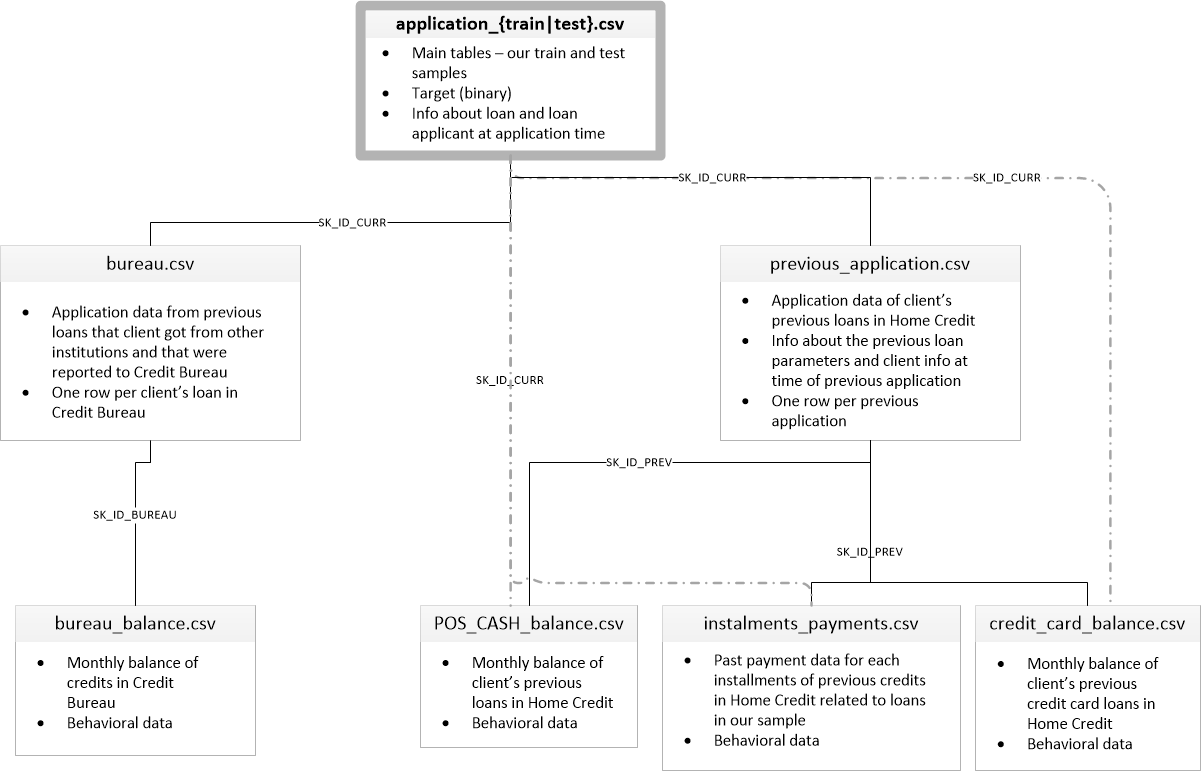

### Dropping all loaded dataframes for memory management

In [33]:
del df_application_train
del df_application_test
del df_bureau
del df_bureau_balance
del df_credit_card_balance
del df_installments_payments
del df_POS_CASH_balance
del df_previous_application

## 3. Data Preprocessing and Feature Engineering

### Data Preprocessing and Feature Engineering `buerau.csv`, `buerau_balance.csv`

Brief description of dataframes (from Kaggle):

`buerau.csv`
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

`buerau_balance.csv`
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

| File                | Column Name           | Description                                                                                                                                              | Notes                                 |
|---------------------|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------|
| `bureau.csv`        | `SK_ID_CURR`           | ID of loan in our sample – one loan in our sample can have 0, 1, 2 or more related previous credits in credit bureau                                     | hashed                                |
| `bureau.csv`        | `SK_BUREAU_ID`         | Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)                                               | hashed                                |
| `bureau.csv`        | `CREDIT_ACTIVE`        | Status of the Credit Bureau (CB) reported credits                                                                                                        |                                       |
| `bureau.csv`        | `CREDIT_CURRENCY`      | Recoded currency of the Credit Bureau credit                                                                                                             | recoded                               |
| `bureau.csv`        | `DAYS_CREDIT`          | How many days before current application did client apply for Credit Bureau credit                                                                      | time only relative to the application |
| `bureau.csv`        | `CREDIT_DAY_OVERDUE`   | Number of days past due on CB credit at the time of application for related loan in our sample                                                          |                                       |
| `bureau.csv`        | `DAYS_CREDIT_ENDDATE`  | Remaining duration of CB credit (in days) at the time of application in Home Credit                                                                      | time only relative to the application |
| `bureau.csv`        | `DAYS_ENDDATE_FACT`    | Days since CB credit ended at the time of application in Home Credit (only for closed credit)                                                            | time only relative to the application |
| `bureau.csv`        | `AMT_CREDIT_MAX_OVERDUE` | Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)                                                   |                                       |
| `bureau.csv`        | `CNT_CREDIT_PROLONG`   | How many times was the Credit Bureau credit prolonged                                                                                                    |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM`       | Current credit amount for the Credit Bureau credit                                                                                                       |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM_DEBT`  | Current debt on Credit Bureau credit                                                                                                                     |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM_LIMIT` | Current credit limit of credit card reported in Credit Bureau                                                                                            |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM_OVERDUE` | Current amount overdue on Credit Bureau credit                                                                                                           |                                       |
| `bureau.csv`        | `CREDIT_TYPE`          | Type of Credit Bureau credit (Car, cash,...)                                                                                                             |                                       |
| `bureau.csv`        | `DAYS_CREDIT_UPDATE`   | How many days before loan application did last information about the Credit Bureau credit come                                                           | time only relative to the application |
| `bureau.csv`        | `AMT_ANNUITY`          | Annuity of the Credit Bureau credit                                                                                                                      |                                       |
| `bureau_balance.csv` | `SK_BUREAU_ID`        | Recoded ID of Credit Bureau credit (unique coding for each application) – use this to join to CREDIT_BUREAU table                                       | hashed                                |
| `bureau_balance.csv` | `MONTHS_BALANCE`      | Month of balance relative to application date (-1 means the freshest balance date)                                                                      | time only relative to the application |
| `bureau_balance.csv` | `STATUS`              | Status of Credit Bureau loan during the month (`C` = closed, `X` = unknown, `0` = no DPD, `1-5` = days past due ranges)                                 |                                       |


In [34]:
# load dataframes
df_bureau = pd.read_csv(os.path.join(data_dir, 'bureau.csv'), encoding='latin1')
df_bureau_balance = pd.read_csv(os.path.join(data_dir, 'bureau_balance.csv'), encoding='latin1')

Missing Values in bureau.csv:
AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_DAY_OVERDUE        0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
dtype: float64


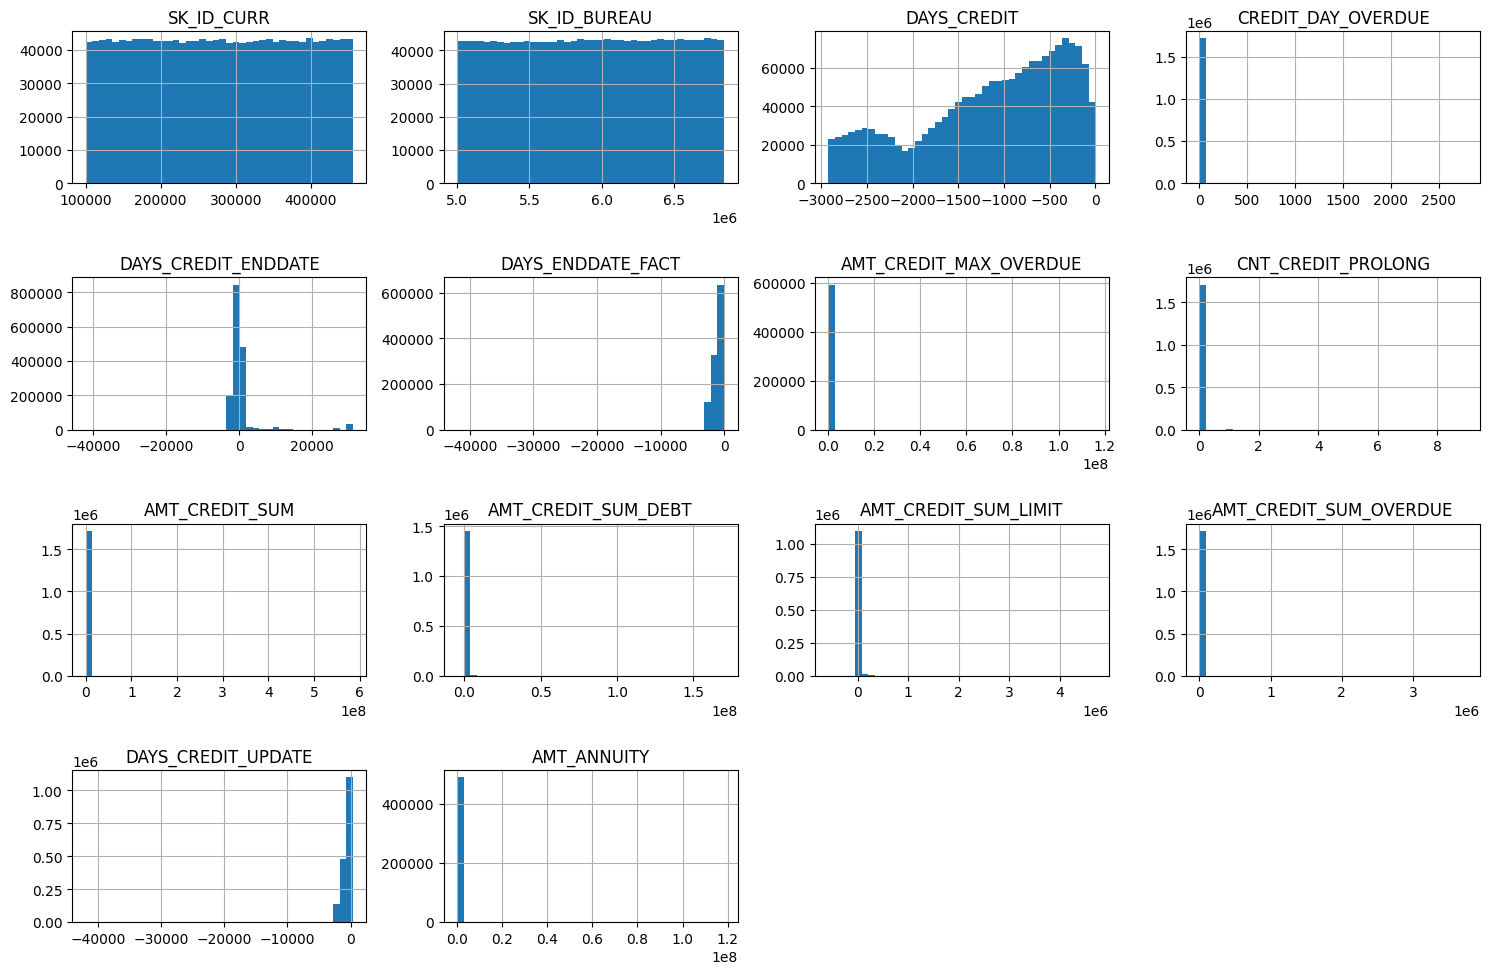

Unique values in categorical columns:

Value counts for CREDIT_ACTIVE:
CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64


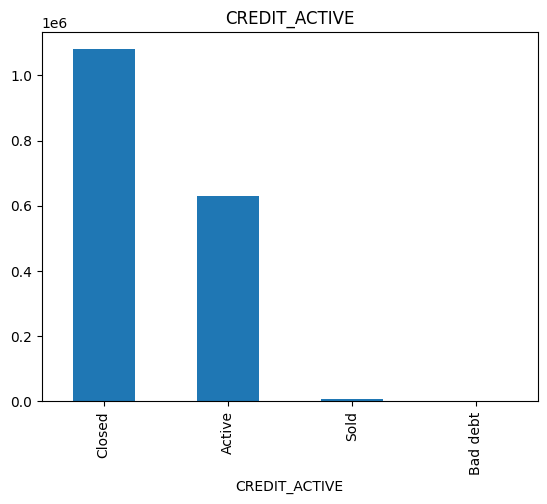


Value counts for CREDIT_CURRENCY:
CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64


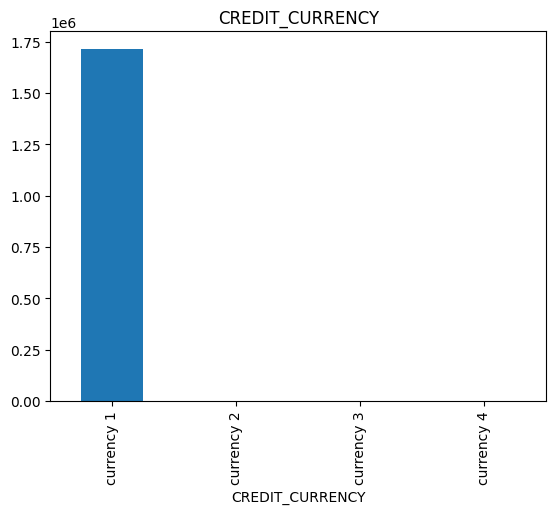


Value counts for CREDIT_TYPE:
CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64


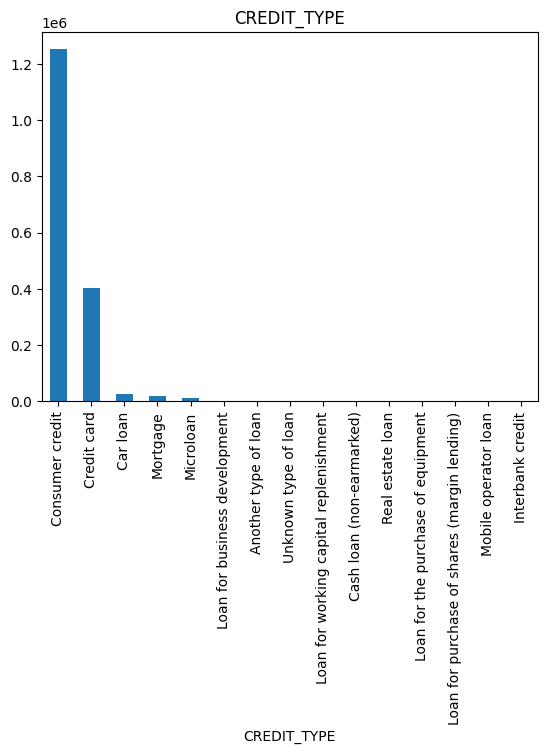

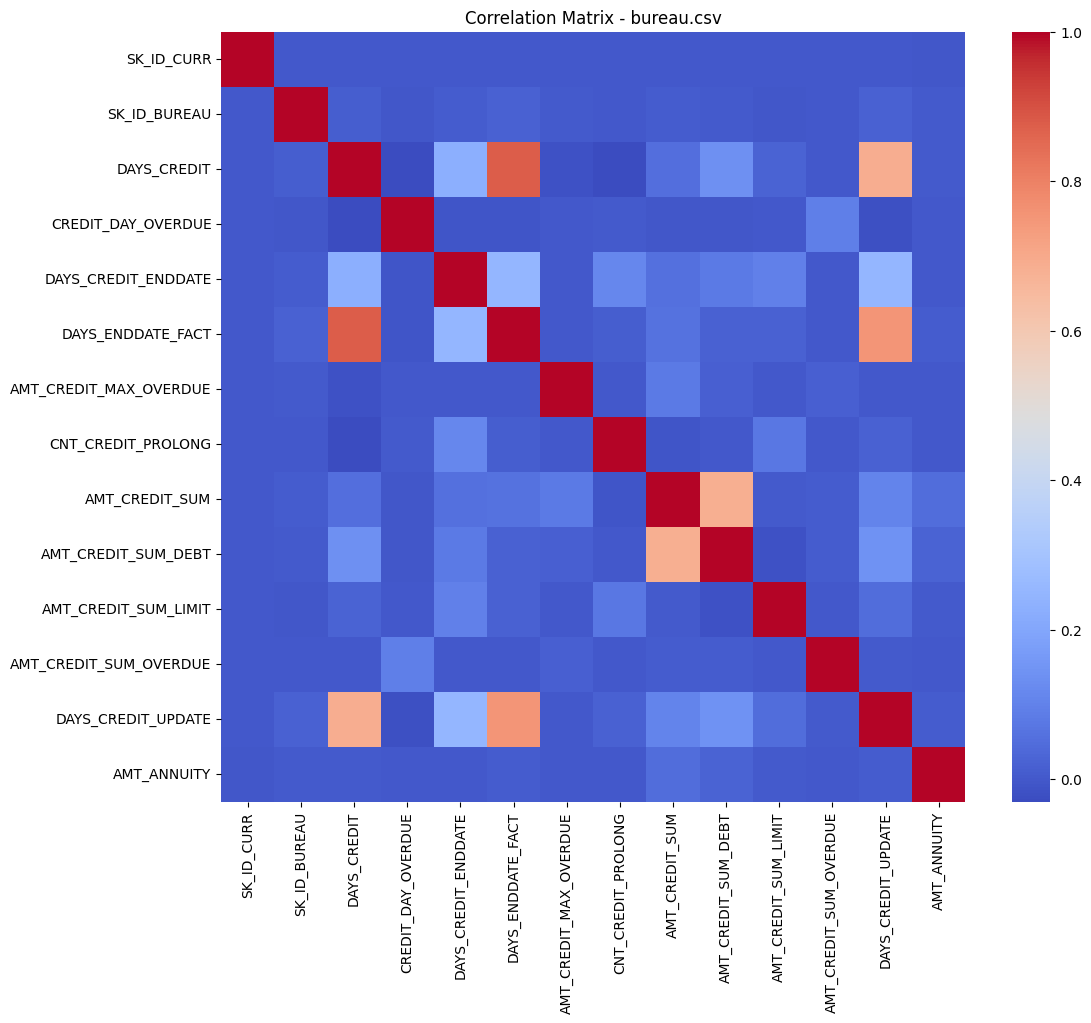

In [35]:
# ===========================
# EDA for `bureau.csv`
# ===========================
# Missing values
missing_bureau = df_bureau.isnull().mean().sort_values(ascending=False)
print("Missing Values in bureau.csv:")
print(missing_bureau)

# Numerical distributions
numerical_cols_bureau = df_bureau.select_dtypes(include='number').columns
df_bureau[numerical_cols_bureau].hist(bins=40, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Categorical columns
categorical_cols_bureau = df_bureau.columns.difference(numerical_cols_bureau)
print("Unique values in categorical columns:")
for col in categorical_cols_bureau:
    print(f"\nValue counts for {col}:")
    print(df_bureau[col].value_counts())
    df_bureau[col].value_counts().plot(kind='bar', title=col)
    plt.show()


# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_bureau[numerical_cols_bureau].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix - bureau.csv")
plt.show()

### Data Cleaning in `bureau.csv`

**Missing values**

`AMT_ANNUITY` (71% missing): Many credit records may not have fixed annuities.

`AMT_CREDIT_MAX_OVERDUE` (66% missing): Only available if there was ever an overdue event.

`DAYS_ENDDATE_FACT` (37% missing): Applies only to closed loans.

`AMT_CREDIT_SUM_LIMIT` (34% missing): Applies only to credit card accounts.

`AMT_CREDIT_SUM_DEBT` (15% missing): Available when there's an active debt.

`DAYS_CREDIT_ENDDATE` (6% missing): Open-ended credit or unknown date.

**Solution**

Add binary flag columns and impute with zeros or median values.

**Additional cleaning**
Consolidate various types of loans.

In [36]:
# Add active credit flag
df_bureau['HAS_ACTIVE_CREDIT'] = (df_bureau['CREDIT_ACTIVE'] != 'Closed').astype(int)

# Missing values
# Replace missing  annuity with median, add flag
df_bureau['HAS_AMT_ANNUITY'] = df_bureau['AMT_ANNUITY'].notna().astype(int)
df_bureau['AMT_ANNUITY'] = df_bureau['AMT_ANNUITY'].fillna(df_bureau['AMT_ANNUITY'].median())

# Replace missing max overdue with 0, add flag
df_bureau['HAS_MAX_OVERDUE'] = df_bureau['AMT_CREDIT_MAX_OVERDUE'].notna().astype(int)
df_bureau['AMT_CREDIT_MAX_OVERDUE'] = df_bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(0)

# Replace missing enddate with min (loan was closed in the past), add flag
df_bureau['HAS_ENDDATE_FACT'] = df_bureau['DAYS_ENDDATE_FACT'].notna().astype(int)
df_bureau['DAYS_ENDDATE_FACT'] = df_bureau['DAYS_ENDDATE_FACT'].fillna(df_bureau['DAYS_ENDDATE_FACT'].min())

# Replace missing credit sum limit with 0, addd flag
df_bureau['HAS_CREDIT_LIMIT'] = df_bureau['AMT_CREDIT_SUM_LIMIT'].notna().astype(int)
df_bureau['AMT_CREDIT_SUM_LIMIT'] = df_bureau['AMT_CREDIT_SUM_LIMIT'].fillna(0)

# Replace missing debt with 0
df_bureau['AMT_CREDIT_SUM_DEBT'] = df_bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

# Replace missing end date with min/max
# Compute conditional values
max_val = df_bureau['DAYS_CREDIT_ENDDATE'].max()
min_val = df_bureau['DAYS_CREDIT_ENDDATE'].min()

# Create a mask for missing values
missing_mask = df_bureau['DAYS_CREDIT_ENDDATE'].isna()

# Fill based on HAS_ACTIVE_CREDIT
df_bureau.loc[missing_mask & (df_bureau['HAS_ACTIVE_CREDIT'] == 1), 'DAYS_CREDIT_ENDDATE'] = max_val
df_bureau.loc[missing_mask & (df_bureau['HAS_ACTIVE_CREDIT'] != 1), 'DAYS_CREDIT_ENDDATE'] = np.abs(min_val)

In [37]:
# Consolidate similar types of loans

credit_type_mapping = {
    'Consumer credit': 'Consumer',
    'Credit card': 'Credit card',
    'Car loan': 'Vehicle',
    'Mortgage': 'Mortgage',
    'Microloan': 'Small loan',
    'Loan for business development': 'Business',
    'Loan for working capital replenishment': 'Business',
    'Loan for the purchase of equipment': 'Business',
    'Loan for purchase of shares (margin lending)': 'Investment',
    'Cash loan (non-earmarked)': 'Consumer',
    'Another type of loan': 'Other',
    'Unknown type of loan': 'Other',
    'Real estate loan': 'Mortgage',
    'Mobile operator loan': 'Other',
    'Interbank credit': 'Other',
}

df_bureau['CREDIT_TYPE_GROUPED'] = df_bureau['CREDIT_TYPE'].map(credit_type_mapping).fillna('Other')

In [38]:
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0           -42023.0   
2                   0                528.0           -42023.0   
3                   0              31199.0           -42023.0   
4                   0               1197.0           -42023.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     0.0                   0         91323.0   
1                     0.0                   0        225000.0   
2                     0.0                   0        464323.5   
3                     0.0                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   0.0                     0.0   
1             171342.0                   0.0                     0.0   
2                  0.0                   0.0                     0.0   
3                  0.0                   0.0                     0.0   
4                  0.0                   0.0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  HAS_ACTIVE_CREDIT  \
0  Consumer credit                -131          0.0                  0   
1      Credit card                 -20          0.0                  1   
2  Consumer credit                 -16          0.0                  1   
3      Credit card                 -16          0.0                  1   
4  Consumer credit                 -21          0.0                  1   

   HAS_AMT_ANNUITY  HAS_MAX_OVERDUE  HAS_ENDDATE_FACT  HAS_CREDIT_LIMIT  \
0                0                0                 1                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                0                1                 0                 0   

  CREDIT_TYPE_GROUPED  
0            Consumer  
1         Credit card  
2            Consumer  
3         Credit card  
4            Consumer

Missing Values in bureau_balance.csv:
SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64
Unique SK_ID_BUREAU in bureau_balance: 817395
Value counts for STATUS:
STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64


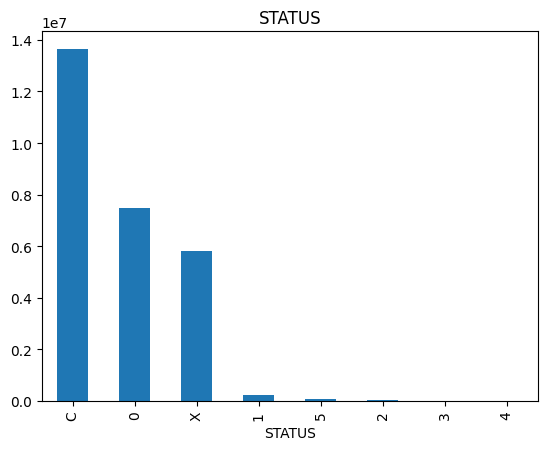

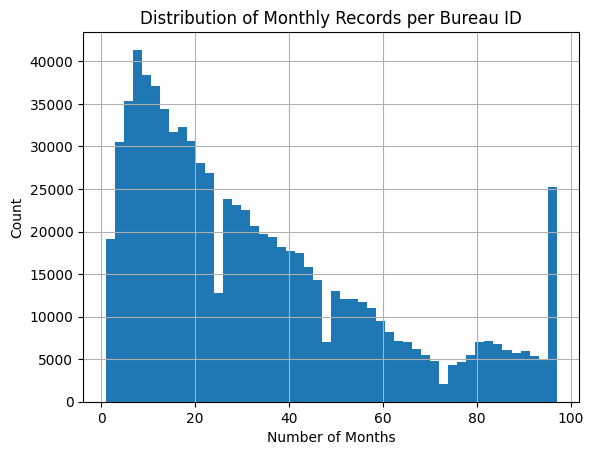

In [39]:
# ===========================
# EDA for `bureau_balance.csv`
# ===========================

# Missing values
missing_bureau_balance = df_bureau_balance.isnull().mean().sort_values(ascending=False)
print("Missing Values in bureau_balance.csv:")
print(missing_bureau_balance)

# Unique counts
print("Unique SK_ID_BUREAU in bureau_balance:", df_bureau_balance['SK_ID_BUREAU'].nunique())
print("Value counts for STATUS:")
print(df_bureau_balance['STATUS'].value_counts())
df_bureau_balance['STATUS'].value_counts().plot(kind='bar', title='STATUS')
plt.show()

# Monthly history lengths
history_lengths = df_bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].count()
history_lengths.hist(bins=50)
plt.title("Distribution of Monthly Records per Bureau ID")
plt.xlabel("Number of Months")
plt.ylabel("Count")
plt.show()

### Data cleaning `bureau_balance.csv`

No missing values.
`MONTHS_BALANCE`  = 99 inducates earliest record available.


### Merging `bureau.csv` with `bureau_balance.csv`

Using inner merge: individual `SK_ID_BUREAU` buerau balance data won't enhance dataset if there's no matching `SK_ID_CURR`.


In [40]:
df_bureau_full = df_bureau.merge(df_bureau_balance, on='SK_ID_BUREAU', how='inner')

In [41]:
# delete old dataframes
del df_bureau
del df_bureau_balance

In [42]:
df_bureau_full.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      380361       5715448        Active      currency 1         -820   
1      380361       5715448        Active      currency 1         -820   
2      380361       5715448        Active      currency 1         -820   
3      380361       5715448        Active      currency 1         -820   
4      380361       5715448        Active      currency 1         -820   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0              31069.0           -42023.0   
1                   0              31069.0           -42023.0   
2                   0              31069.0           -42023.0   
3                   0              31069.0           -42023.0   
4                   0              31069.0           -42023.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     0.0                   0         67500.0   
1                     0.0                   0         67500.0   
2                     0.0                   0         67500.0   
3                     0.0                   0         67500.0   
4                     0.0                   0         67500.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0               67500.0                     0.0   
1                  0.0               67500.0                     0.0   
2                  0.0               67500.0                     0.0   
3                  0.0               67500.0                     0.0   
4                  0.0               67500.0                     0.0   

   CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  HAS_ACTIVE_CREDIT  \
0  Credit card                -183          0.0                  1   
1  Credit card                -183          0.0                  1   
2  Credit card                -183          0.0                  1   
3  Credit card                -183          0.0                  1   
4  Credit card                -183          0.0                  1   

   HAS_AMT_ANNUITY  HAS_MAX_OVERDUE  HAS_ENDDATE_FACT  HAS_CREDIT_LIMIT  \
0                1                0                 0                 1   
1                1                0                 0                 1   
2                1                0                 0                 1   
3                1                0                 0                 1   
4                1                0                 0                 1   

  CREDIT_TYPE_GROUPED  MONTHS_BALANCE STATUS  
0         Credit card               0      C  
1         Credit card              -1      C  
2         Credit card              -2      C  
3         Credit card              -3      C  
4         Credit card              -4      C

### Feature Engineering: Bureau-level for `df_bureau_full`

Adding columns:

`BUREAU_MONTHS_ACTIVE` -- Age of credit account for bureau.

`BUREAU_LATEST_STATUS` -- Most recent account status with the bureau.

`BUREAU_NUM_LATE_MONTHS` -- Count of late payments per bureau.

`BUREAU_LAST_LATE_MONTH` -- Last month of delinquency per bureau.

`BUREAU_STATUS_RATIO` -- Status distribution ratios per bureau.

In [43]:
# ======================================
# Feature Engineering for df_bureau_full
# ======================================

# Number of months in credit history per client per bureau
bureau_months_active = (
    df_bureau_full
    .groupby(['SK_ID_CURR', 'SK_ID_BUREAU'])['MONTHS_BALANCE']
    .nunique()
    .rename('BUREAU_MONTHS_ACTIVE')
    .reset_index()
)

# Most recent status (month 0)
bureau_latest_status = (
    df_bureau_full[df_bureau_full['MONTHS_BALANCE'] == 0]
    .set_index(['SK_ID_CURR', 'SK_ID_BUREAU'])['STATUS']
    .rename('BUREAU_LATEST_STATUS')
)

# Count of late payments (STATUS in '1'-'5')
late_mask = df_bureau_full['STATUS'].isin(['1', '2', '3', '4', '5'])
bureau_num_late_months = (
    df_bureau_full[late_mask]
    .groupby(['SK_ID_CURR', 'SK_ID_BUREAU'])['STATUS']
    .count()
    .rename('BUREAU_NUM_LATE_MONTHS')
)
# Last month with late payment
bureau_last_late_month = (
    df_bureau_full[late_mask]
    .groupby(['SK_ID_CURR', 'SK_ID_BUREAU'])['MONTHS_BALANCE']
    .max()
    .rename('BUREAU_LAST_LATE_MONTH')
)
# Status distribution ratios
status_counts = (
    df_bureau_full
    .pivot_table(index=['SK_ID_CURR', 'SK_ID_BUREAU'],
                  columns='STATUS',
                  aggfunc='size',
                  fill_value=0)
)
status_counts['TOTAL'] = status_counts.sum(axis=1)
bureau_status_ratio = (
    status_counts
    .div(status_counts['TOTAL'], axis=0)
    .add_prefix('BUREAU_STATUS_RATIO_')
)
# Combine all features
# Start with months_active as the base
bureau_features = bureau_months_active.copy()
bureau_features = bureau_features.set_index(['SK_ID_CURR', 'SK_ID_BUREAU'])

# Join the other features
bureau_features = bureau_features.join(bureau_latest_status, how='left')
bureau_features = bureau_features.join(bureau_num_late_months, how='left')
bureau_features = bureau_features.join(bureau_last_late_month, how='left')
bureau_features = bureau_features.join(bureau_status_ratio, how='left')

# Fill missing late counts with 0
bureau_features['BUREAU_NUM_LATE_MONTHS'] = bureau_features['BUREAU_NUM_LATE_MONTHS'].fillna(0)
bureau_features['BUREAU_LAST_LATE_MONTH'] = bureau_features['BUREAU_LAST_LATE_MONTH'].fillna(0)

# Reset index to have SK_ID_CURR and SK_ID_BUREAU as columns
bureau_features = bureau_features.reset_index()

# If a bureau account has only on-time or closed months, delinquent_counts will not include that and left-joint will
# fill corresponding SK_ID_BUREAU values with NaN. It's safe to impute them with 0.

bureau_features['BUREAU_NUM_LATE_MONTHS'] = bureau_features['BUREAU_NUM_LATE_MONTHS'].fillna(0)
bureau_features['BUREAU_LAST_LATE_MONTH'] = bureau_features['BUREAU_LAST_LATE_MONTH'].fillna(0)

In [44]:
bureau_features.head()

SK_ID_CURR  SK_ID_BUREAU  BUREAU_MONTHS_ACTIVE BUREAU_LATEST_STATUS  \
0      100001       5896630                    29                    C   
1      100001       5896631                    30                    C   
2      100001       5896632                    29                    C   
3      100001       5896633                    52                    C   
4      100001       5896634                    19                    1   

   BUREAU_NUM_LATE_MONTHS  BUREAU_LAST_LATE_MONTH  BUREAU_STATUS_RATIO_0  \
0                     0.0                     0.0               0.103448   
1                     0.0                     0.0               0.033333   
2                     0.0                     0.0               0.068966   
3                     0.0                     0.0               0.019231   
4                     1.0                     0.0               0.631579   

   BUREAU_STATUS_RATIO_1  BUREAU_STATUS_RATIO_2  BUREAU_STATUS_RATIO_3  \
0               0.000000                    0.0                    0.0   
1               0.000000                    0.0                    0.0   
2               0.000000                    0.0                    0.0   
3               0.000000                    0.0                    0.0   
4               0.052632                    0.0                    0.0   

   BUREAU_STATUS_RATIO_4  BUREAU_STATUS_RATIO_5  BUREAU_STATUS_RATIO_C  \
0                    0.0                    0.0               0.655172   
1                    0.0                    0.0               0.966667   
2                    0.0                    0.0               0.620690   
3                    0.0                    0.0               0.846154   
4                    0.0                    0.0               0.000000   

   BUREAU_STATUS_RATIO_X  BUREAU_STATUS_RATIO_TOTAL  
0               0.241379                        1.0  
1               0.000000                        1.0  
2               0.310345                        1.0  
3               0.134615                        1.0  
4               0.315789                        1.0

### Merge with the main dataframe and clear

In [45]:
df_bureau_full = df_bureau_full.merge(bureau_features, on='SK_ID_BUREAU', how='left')

In [46]:
del bureau_features

In [48]:
df_bureau_full.head()

SK_ID_CURR_x  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0        380361       5715448        Active      currency 1         -820   
1        380361       5715448        Active      currency 1         -820   
2        380361       5715448        Active      currency 1         -820   
3        380361       5715448        Active      currency 1         -820   
4        380361       5715448        Active      currency 1         -820   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0              31069.0           -42023.0   
1                   0              31069.0           -42023.0   
2                   0              31069.0           -42023.0   
3                   0              31069.0           -42023.0   
4                   0              31069.0           -42023.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     0.0                   0         67500.0   
1                     0.0                   0         67500.0   
2                     0.0                   0         67500.0   
3                     0.0                   0         67500.0   
4                     0.0                   0         67500.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0               67500.0                     0.0   
1                  0.0               67500.0                     0.0   
2                  0.0               67500.0                     0.0   
3                  0.0               67500.0                     0.0   
4                  0.0               67500.0                     0.0   

   CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  HAS_ACTIVE_CREDIT  \
0  Credit card                -183          0.0                  1   
1  Credit card                -183          0.0                  1   
2  Credit card                -183          0.0                  1   
3  Credit card                -183          0.0                  1   
4  Credit card                -183          0.0                  1   

   HAS_AMT_ANNUITY  HAS_MAX_OVERDUE  HAS_ENDDATE_FACT  HAS_CREDIT_LIMIT  \
0                1                0                 0                 1   
1                1                0                 0                 1   
2                1                0                 0                 1   
3                1                0                 0                 1   
4                1                0                 0                 1   

  CREDIT_TYPE_GROUPED  MONTHS_BALANCE STATUS  SK_ID_CURR_y  \
0         Credit card               0      C        380361   
1         Credit card              -1      C        380361   
2         Credit card              -2      C        380361   
3         Credit card              -3      C        380361   
4         Credit card              -4      C        380361   

   BUREAU_MONTHS_ACTIVE BUREAU_LATEST_STATUS  BUREAU_NUM_LATE_MONTHS  \
0                    27                    C                     0.0   
1                    27                    C                     0.0   
2                    27                    C                     0.0   
3                    27                    C                     0.0   
4                    27                    C                     0.0   

   BUREAU_LAST_LATE_MONTH  BUREAU_STATUS_RATIO_0  BUREAU_STATUS_RATIO_1  \
0                     0.0               0.296296                    0.0   
1                     0.0               0.296296                    0.0   
2                     0.0               0.296296                    0.0   
3                     0.0               0.296296                    0.0   
4                     0.0               0.296296                    0.0   

   BUREAU_STATUS_RATIO_2  BUREAU_STATUS_RATIO_3  BUREAU_STATUS_RATIO_4  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0       

In [49]:
# Rename SK_ID_CURR_x to SK_ID_CURR
df_bureau_full.rename(columns={'SK_ID_CURR_x': 'SK_ID_CURR'}, inplace=True)

### Feature Engineering: Client-Level Features with Aggregation

Each row in bureau.csv represents a past credit report tied to a customer (SK_ID_CURR). A customer may have multiple past credits and we need to aggregate the past credit history to summarize each client's risk profile with a fixed set of features.

In [50]:
# =======================================
# Feature Engineering for `df_bureau_full`
# =======================================

# Define the aggregations
agg_specs = {
    'AMT_ANNUITY': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM_DEBT': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean', 'min', 'max', 'sum', 'var'],
    'CNT_CREDIT_PROLONG': ['mean', 'min', 'max', 'sum', 'var'],
    'CREDIT_DAY_OVERDUE': ['mean', 'min', 'max', 'sum', 'var'],
    'DAYS_CREDIT': ['mean', 'min', 'max', 'sum', 'var'],
    'DAYS_CREDIT_ENDDATE': ['mean', 'min', 'max', 'sum', 'var'],
    'DAYS_CREDIT_UPDATE': ['mean', 'min', 'max', 'sum', 'var'],
}

# Perform the aggregation
df_agg = df_bureau_full.groupby('SK_ID_CURR').agg(agg_specs)

# Flatten MultiIndex columns
df_agg.columns = [
    f"SK_ID_CURR_{col[0].upper()}_{col[1].upper()}" for col in df_agg.columns
]

# Reset index to merge back to df_bureau if needed
df_agg = df_agg.reset_index()

# Merge the aggregated features back to df_bureau_full
df_bureau_full = df_bureau_full.merge(df_agg, on='SK_ID_CURR', how='left')

In [51]:
# delete df_agg
del df_agg

### Engineering Features: Summary per Client

Separate active and closed loans, for each closed/active loan create aggregated columns, where * in column name is `ACTIVE` or `CLOSED`.

| Feature Name                            | Meaning                           |
| --------------------------------------- | --------------------------------- |
| `*_AMT_PAST_LOANS`           | Total past loans from bureau data |
| `*_AMT_LOAN_TYPES`           | Number of distinct loan types     |
| `*_AVG_LOANS_PER_TYPE` | Loan count / type count ratio     |
| `*_RAT_DEBT_CREDIT`              | Total debt / total credit         |
| `*_RAT_OVERDUE_DEBT`             | Overdue / debt                    |
| `*_PCT_CREDIT_ENDDATE`      | Fraction of active (future) loans |
| `*_LOANS_LAST_6_MONTHS`      |  Number of loans in last 6 Months |
| `*_LOANS_LAST_YEAR`      | Number od loans in the last 12 months |
| `*_LOANS_LAST_5_YEARS`      |  Number of loans in the last 5 years |

In [52]:
# Separate active and closed loans
active_loans = df_bureau_full[df_bureau_full['CREDIT_ACTIVE'] == 'Active']
closed_loans = df_bureau_full[df_bureau_full['CREDIT_ACTIVE'] == 'Closed']

In [53]:
# Clear df_bureau_full
del df_bureau_full

In [54]:
# ==================================================
# Feature Engineering Closed Loans or df_bureau_full
# ==================================================

# Total past loans for closed loans
closed_amt_past_loans = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().rename('CLOSED_AMT_PAST_LOANS')

# Number of distinct loan types
closed_loan_types = closed_loans.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().rename('CLOSED_AMT_LOAN_TYPES')

# Loan count / type count ratio
closed_loan_count = closed_loans.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count().rename('CLOSED_LOAN_COUNT')
closed_avg_loans_per_type = (closed_loan_count / closed_loan_types).rename('CLOSED_AVG_LOANS_PER_TYPE')

# Debt / credit ratio
closed_total_debt = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
closed_total_credit = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
closed_rat_debt_credit = (closed_total_debt / closed_total_credit).replace([np.inf, -np.inf], np.nan).fillna(0).rename('CLOSED_RAT_DEBT_CREDIT')

# Overdue / debt ratio
closed_total_overdue = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum()
closed_rat_overdue_debt = (closed_total_overdue / closed_total_debt).replace([np.inf, -np.inf], np.nan).fillna(0).rename('CLOSED_RAT_OVERDUE_DEBT')

# Fraction of active (future) loans (should be 0 for closed loans)
closed_pct_credit_enddate = closed_loans.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].apply(lambda x: (x > 0).mean()).rename('CLOSED_PCT_CREDIT_ENDDATE')

# Closed loans in last 6 months, year, 5 years
closed_loans_last_year = closed_loans[closed_loans['DAYS_CREDIT'] >= -365].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('CLOSED_LOANS_LAST_YEAR')
closed_loans_last_6_months = closed_loans[closed_loans['DAYS_CREDIT'] >= -180].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('CLOSED_LOANS_LAST_6_MONTHS')
closed_loans_last_5_years = closed_loans[closed_loans['DAYS_CREDIT'] >= -1825].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('CLOSED_LOANS_LAST_5_YEARS')

In [55]:
# ==================================================
# Feature Engineering Active Loans or df_bureau_full
# ==================================================

# Total past loans for active loans
active_amt_past_loans = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().rename('ACTIVE_AMT_PAST_LOANS')

# Number of distinct loan types
active_loan_types = active_loans.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().rename('ACTIVE_AMT_LOAN_TYPES')

# Loan count / type count ratio
active_loan_count = active_loans.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count().rename('ACTIVE_LOAN_COUNT')
active_avg_loans_per_type = (active_loan_count / active_loan_types).rename('ACTIVE_AVG_LOANS_PER_TYPE')

# Debt / credit ratio
active_total_debt = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
active_total_credit = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
active_rat_debt_credit = (active_total_debt / active_total_credit).replace([np.inf, -np.inf], np.nan).fillna(0).rename('ACTIVE_RAT_DEBT_CREDIT')

# Overdue / debt ratio
active_total_overdue = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum()
active_rat_overdue_debt = (active_total_overdue / active_total_debt).replace([np.inf, -np.inf], np.nan).fillna(0).rename('ACTIVE_RAT_OVERDUE_DEBT')

# Fraction of active loans (should be 1 for active loans only)
active_pct_credit_enddate = active_loans.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].apply(lambda x: (x > 0).mean()).rename('ACTIVE_PCT_CREDIT_ENDDATE')

# Active loans during last 6 months, 12 months, 5 years:

active_loans_last_year = active_loans[active_loans['DAYS_CREDIT'] >= -365].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('ACTIVE_LOANS_LAST_YEAR')
active_loans_last_6_months = active_loans[active_loans['DAYS_CREDIT'] >= -180].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('ACTIVE_LOANS_LAST_6_MONTHS')
active_loans_last_5_years = active_loans[active_loans['DAYS_CREDIT'] >= -1825].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('ACTIVE_LOANS_LAST_5_YEARS')

In [56]:
closed_features = pd.concat([
    closed_amt_past_loans,
    closed_loan_types,
    closed_avg_loans_per_type,
    closed_rat_debt_credit,
    closed_rat_overdue_debt,
    closed_pct_credit_enddate,
    closed_loans_last_year,
    closed_loans_last_6_months,
    closed_loans_last_5_years
], axis=1).reset_index()  # reset_index to have SK_ID_CURR as a column

In [57]:
active_features = pd.concat([
    active_amt_past_loans,
    active_loan_types,
    active_avg_loans_per_type,
    active_rat_debt_credit,
    active_rat_overdue_debt,
    active_pct_credit_enddate,
    active_loans_last_year,
    active_loans_last_6_months,
    active_loans_last_5_years
], axis=1).reset_index()  # reset_index to have SK_ID_CURR as a column

In [58]:
# Cear closed loans
del closed_loans

In [59]:
# Merge active_loans with active_features
active_loans_with_features = active_loans.merge(active_features, on='SK_ID_CURR', how='inner')

# Merge active_loans with closed_features
active_loans_with_features = active_loans_with_features.merge(closed_features, on='SK_ID_CURR', how='inner')

In [60]:
# Clear dataframes
del active_features
del closed_features

In [61]:
active_loans_with_features.head(20)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       380361       5715448        Active      currency 1         -820   
1       380361       5715448        Active      currency 1         -820   
2       380361       5715448        Active      currency 1         -820   
3       380361       5715448        Active      currency 1         -820   
4       380361       5715448        Active      currency 1         -820   
5       380361       5715448        Active      currency 1         -820   
6       380361       5715448        Active      currency 1         -820   
7       380361       5715448        Active      currency 1         -820   
8       380361       5715448        Active      currency 1         -820   
9       380361       5715448        Active      currency 1         -820   
10      380361       5715448        Active      currency 1         -820   
11      380361       5715448        Active      currency 1         -820   
12      380361       5715448        Active      currency 1         -820   
13      380361       5715448        Active      currency 1         -820   
14      380361       5715448        Active      currency 1         -820   
15      380361       5715448        Active      currency 1         -820   
16      380361       5715448        Active      currency 1         -820   
17      380361       5715448        Active      currency 1         -820   
18      380361       5715448        Active      currency 1         -820   
19      380361       5715448        Active      currency 1         -820   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                    0              31069.0           -42023.0   
1                    0              31069.0           -42023.0   
2                    0              31069.0           -42023.0   
3                    0              31069.0           -42023.0   
4                    0              31069.0           -42023.0   
5                    0              31069.0           -42023.0   
6                    0              31069.0           -42023.0   
7                    0              31069.0           -42023.0   
8                    0              31069.0           -42023.0   
9                    0              31069.0           -42023.0   
10                   0              31069.0           -42023.0   
11                   0              31069.0           -42023.0   
12                   0              31069.0           -42023.0   
13                   0              31069.0           -42023.0   
14                   0              31069.0           -42023.0   
15                   0              31069.0           -42023.0   
16                   0              31069.0           -42023.0   
17                   0              31069.0           -42023.0   
18                   0              31069.0           -42023.0   
19                   0              31069.0           -42023.0   

    AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                      0.0                   0         67500.0   
1                      0.0                   0         67500.0   
2                      0.0                   0         67500.0   
3                      0.0                   0         67500.0   
4                      0.0                   0         67500.0   
5                      0.0                   0         67500.0   
6                      0.0                   0         67500.0   
7                      0.0                   0         67500.0   
8                      0.0                   0         67500.0   
9                      0.0                   0         67500.0   
10                     0.0                   0         67500.0   
11                     0.0                   0         67500.0   
12                     0.0                   0         67500.0   
13                     0.0                   0         67500.0   
14                     0.0                   0     

### Active Loans with Features EDA

In [63]:
print("Basic Info:")
print(active_loans_with_features.info())

print("\nBasic Statistics:")
print(active_loans_with_features.describe(include='all'))

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080156 entries, 0 to 5080155
Columns: 112 entries, SK_ID_CURR to CLOSED_LOANS_LAST_5_YEARS
dtypes: float64(78), int64(28), object(6)
memory usage: 4.2+ GB
None

Basic Statistics:
          SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   5.080156e+06  5.080156e+06       5080156         5080156   
unique           NaN           NaN             1               3   
top              NaN           NaN        Active      currency 1   
freq             NaN           NaN       5080156         5077981   
mean    2.778226e+05  6.030774e+06           NaN             NaN   
std     1.029626e+05  4.962603e+05           NaN             NaN   
min     1.000010e+05  5.001711e+06           NaN             NaN   
25%     1.883690e+05  5.718660e+06           NaN             NaN   
50%     2.775540e+05  6.063522e+06           NaN             NaN   
75%     3.670660e+05  6.432773e+06           NaN             NaN   
max     4.

In [64]:
print("\nMissing values:")
print(active_loans_with_features.isnull().sum())


Missing values:
SK_ID_CURR                                      0
SK_ID_BUREAU                                    0
CREDIT_ACTIVE                                   0
CREDIT_CURRENCY                                 0
DAYS_CREDIT                                     0
CREDIT_DAY_OVERDUE                              0
DAYS_CREDIT_ENDDATE                             0
DAYS_ENDDATE_FACT                               0
AMT_CREDIT_MAX_OVERDUE                          0
CNT_CREDIT_PROLONG                              0
AMT_CREDIT_SUM                                  0
AMT_CREDIT_SUM_DEBT                             0
AMT_CREDIT_SUM_LIMIT                            0
AMT_CREDIT_SUM_OVERDUE                          0
CREDIT_TYPE                                     0
DAYS_CREDIT_UPDATE                              0
AMT_ANNUITY                                     0
HAS_ACTIVE_CREDIT                               0
HAS_AMT_ANNUITY                                 0
HAS_MAX_OVERDUE                  

In [65]:
# Imputing NaNs
# Replace Unknown BUREAU_LATEST_STATUS with 'C' (Closed)
active_loans_with_features['BUREAU_LATEST_STATUS'] = active_loans_with_features['BUREAU_LATEST_STATUS'].fillna('C')

In [66]:
# Imputing NaNs
# Replace missing loans with 0
loan_count_cols = [
    'ACTIVE_LOANS_LAST_YEAR', 'ACTIVE_LOANS_LAST_6_MONTHS', 'ACTIVE_LOANS_LAST_5_YEARS',
    'CLOSED_LOANS_LAST_YEAR', 'CLOSED_LOANS_LAST_6_MONTHS', 'CLOSED_LOANS_LAST_5_YEARS'
]
active_loans_with_features[loan_count_cols] = active_loans_with_features[loan_count_cols].fillna(0).astype(int)

In [67]:
# Imputing NaNs
# Check
print("\nMissing values after imputing:")
print(active_loans_with_features.isnull().sum())


Missing values after imputing:
SK_ID_CURR                                0
SK_ID_BUREAU                              0
CREDIT_ACTIVE                             0
CREDIT_CURRENCY                           0
DAYS_CREDIT                               0
CREDIT_DAY_OVERDUE                        0
DAYS_CREDIT_ENDDATE                       0
DAYS_ENDDATE_FACT                         0
AMT_CREDIT_MAX_OVERDUE                    0
CNT_CREDIT_PROLONG                        0
AMT_CREDIT_SUM                            0
AMT_CREDIT_SUM_DEBT                       0
AMT_CREDIT_SUM_LIMIT                      0
AMT_CREDIT_SUM_OVERDUE                    0
CREDIT_TYPE                               0
DAYS_CREDIT_UPDATE                        0
AMT_ANNUITY                               0
HAS_ACTIVE_CREDIT                         0
HAS_AMT_ANNUITY                           0
HAS_MAX_OVERDUE                           0
HAS_ENDDATE_FACT                          0
HAS_CREDIT_LIMIT                          0


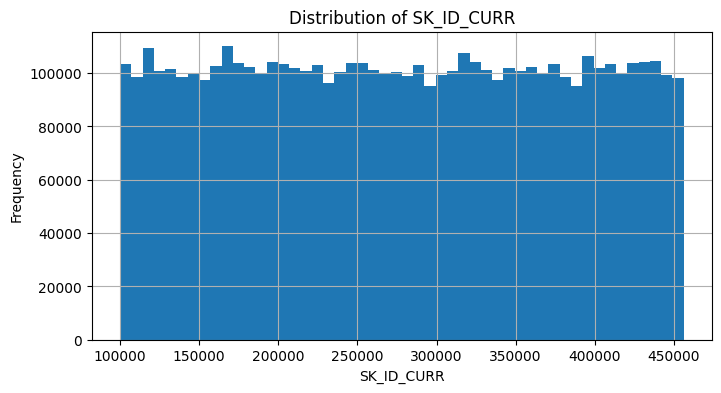

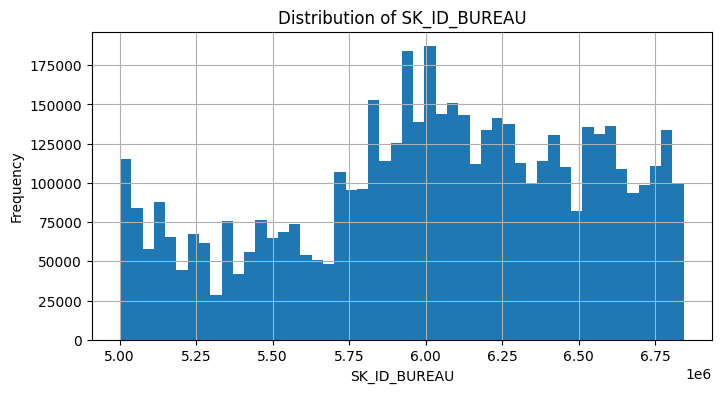

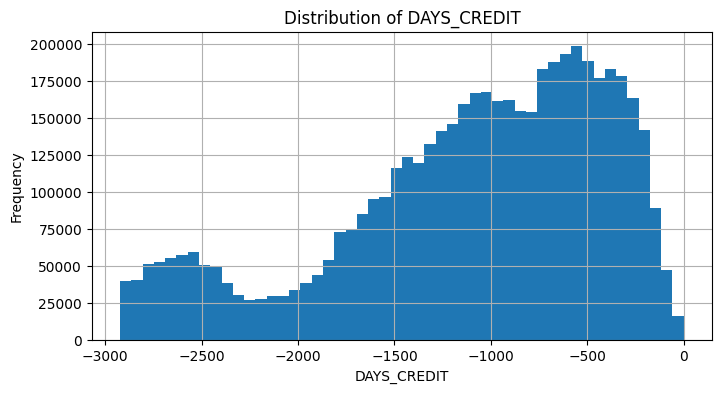

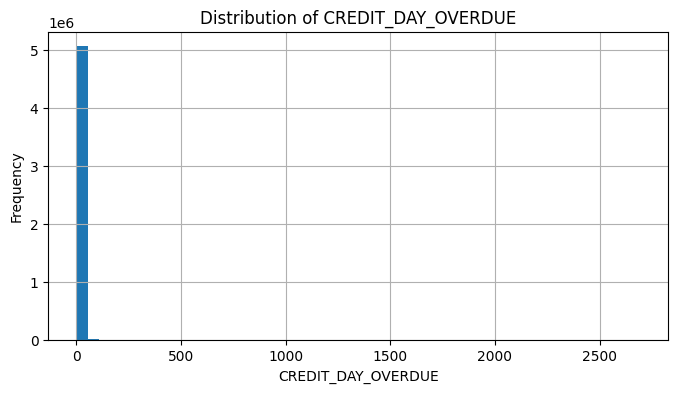

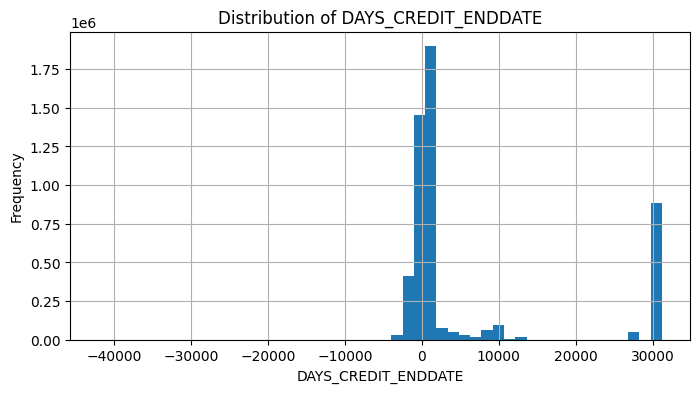

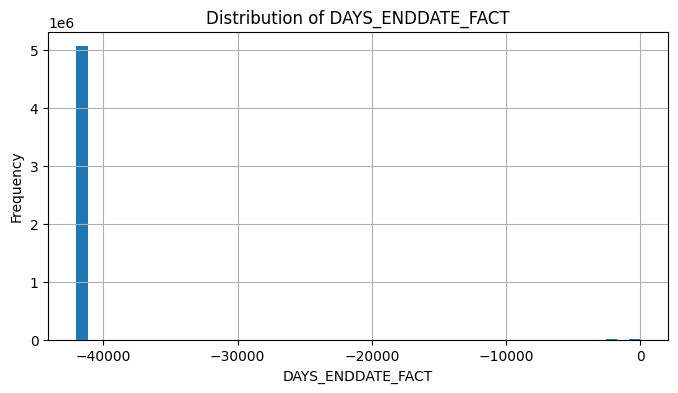

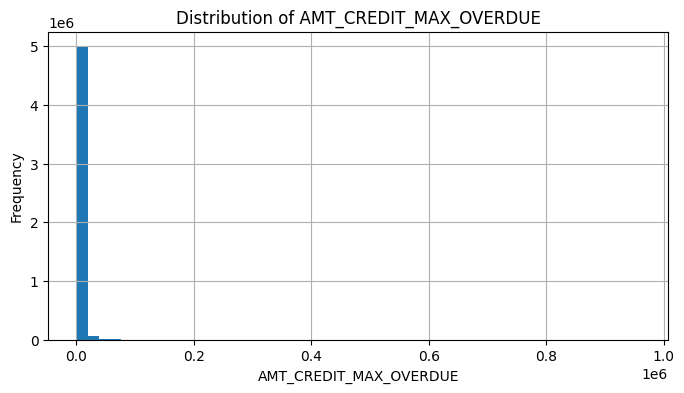

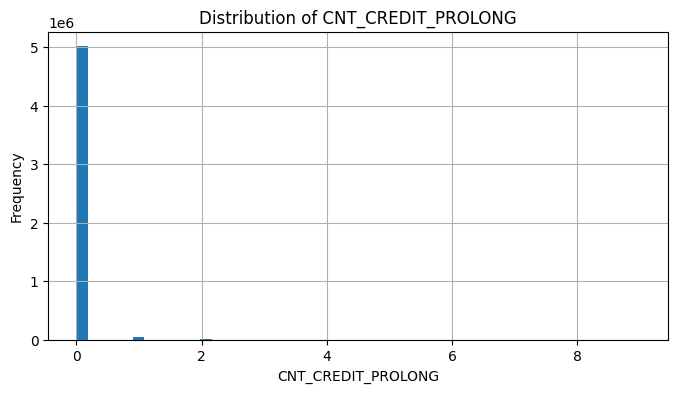

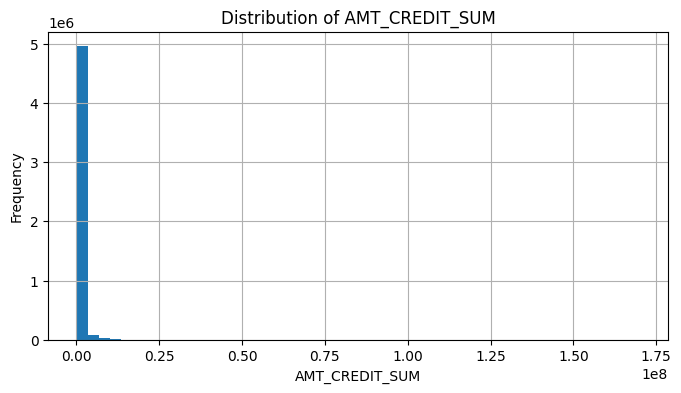

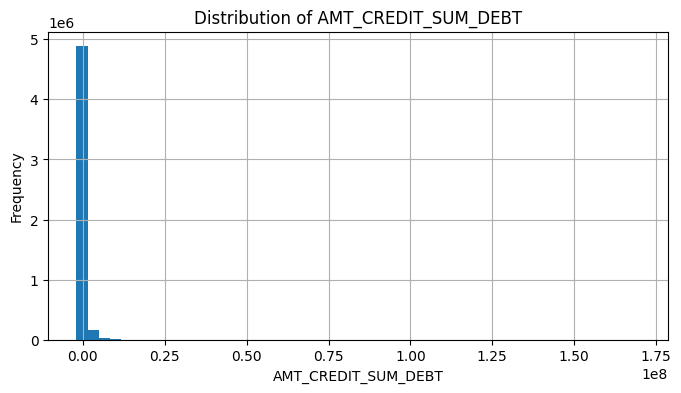

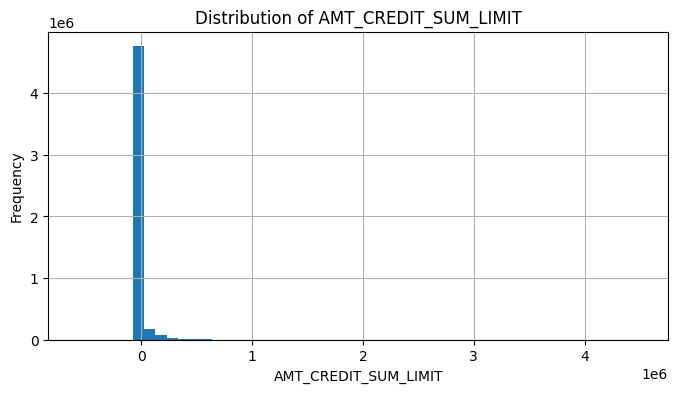

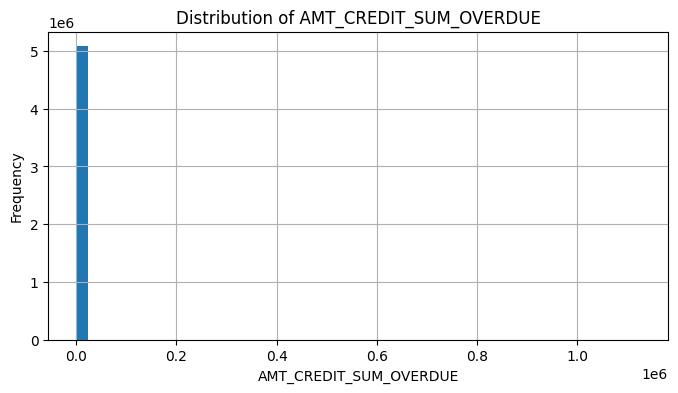

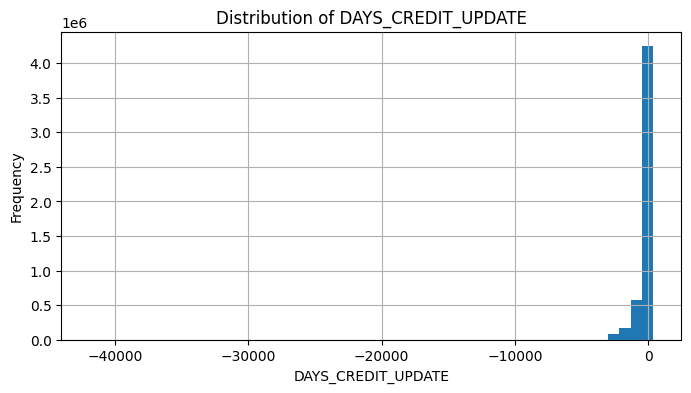

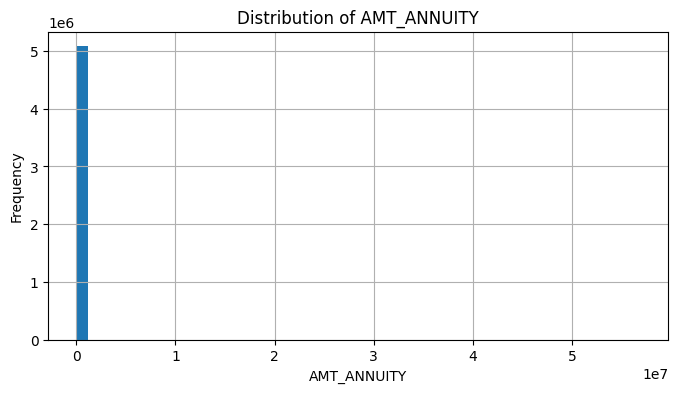

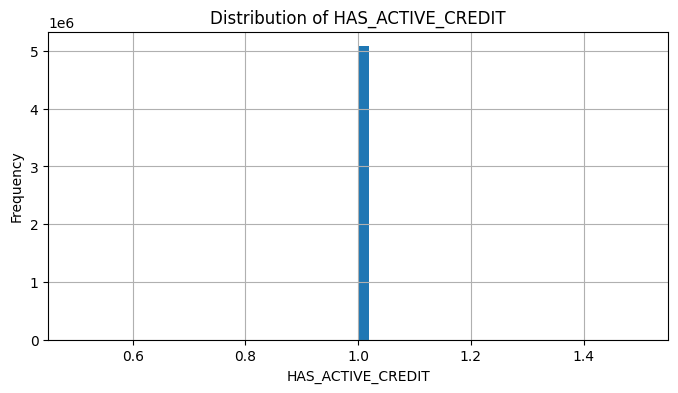

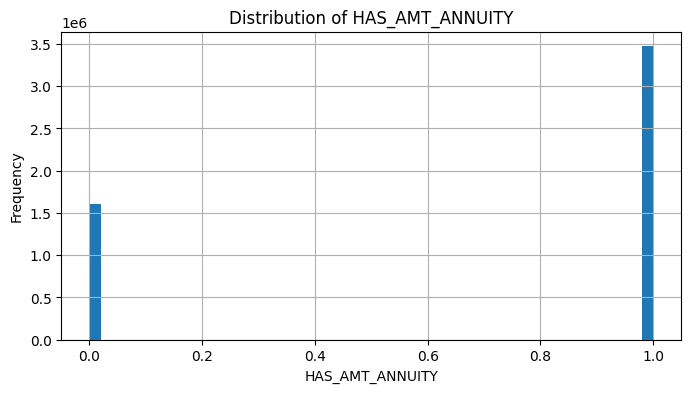

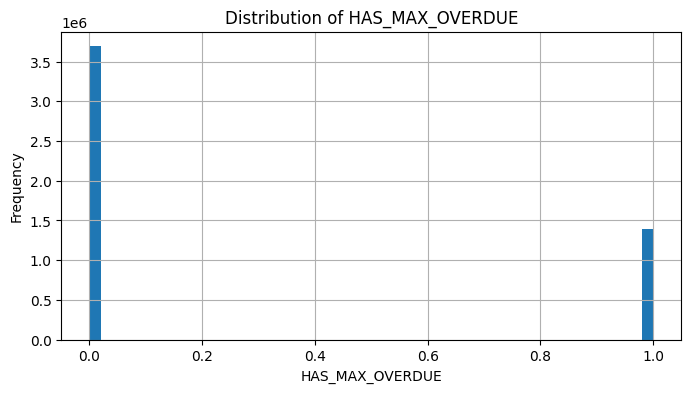

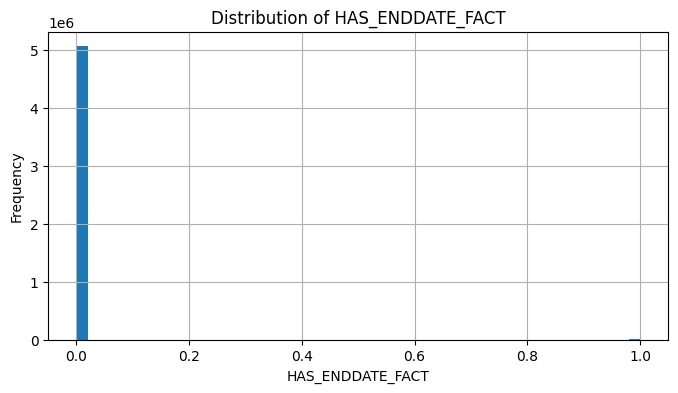

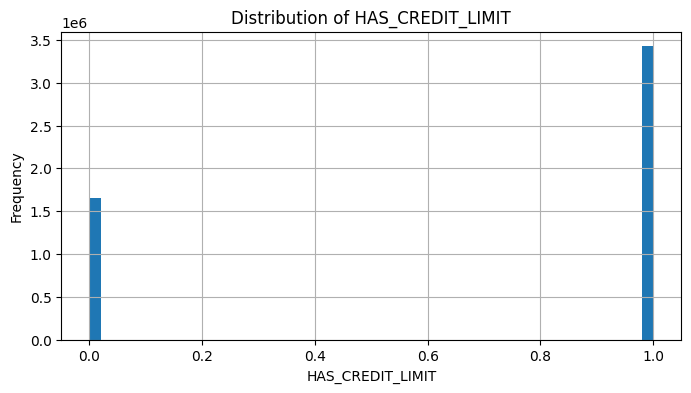

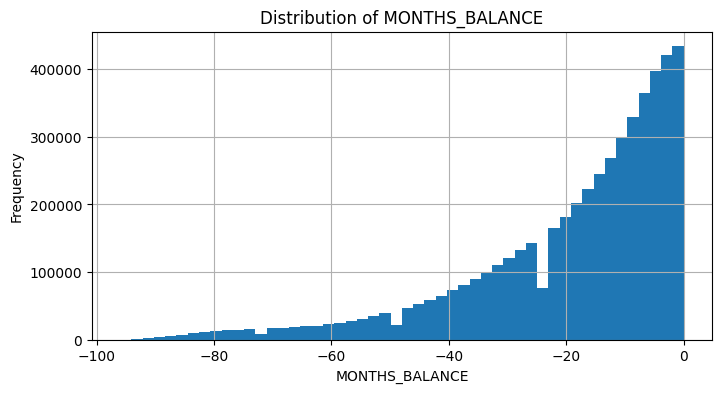

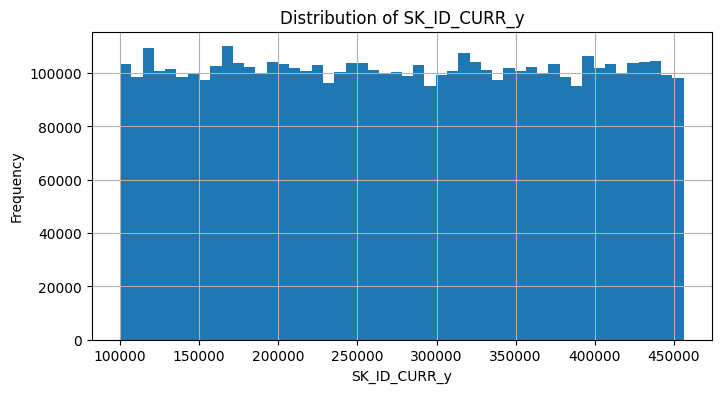

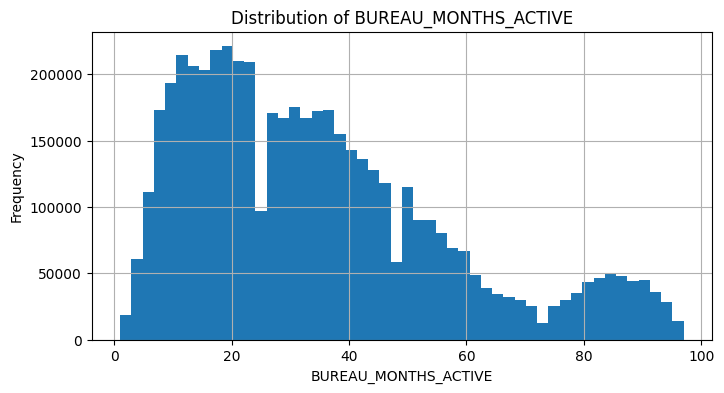

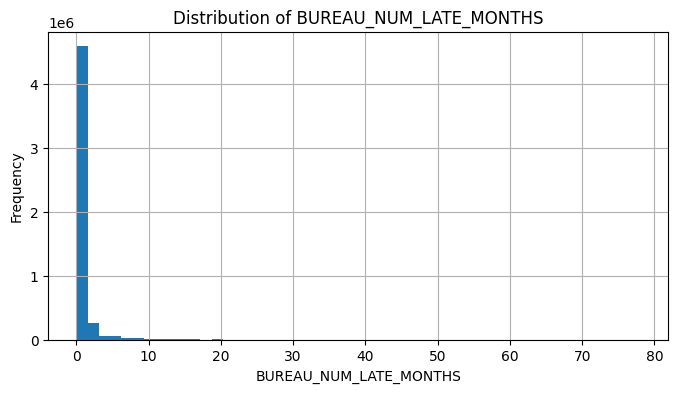

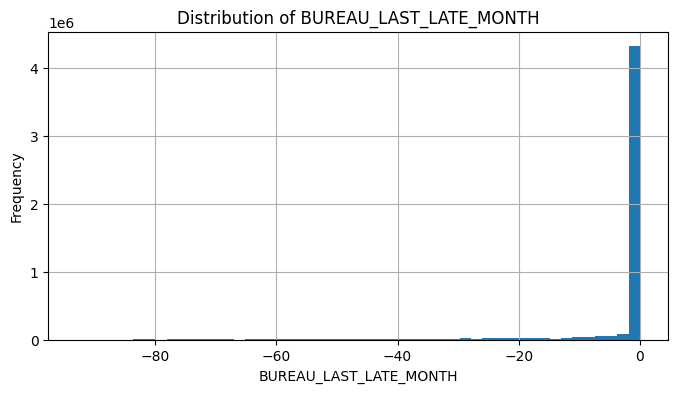

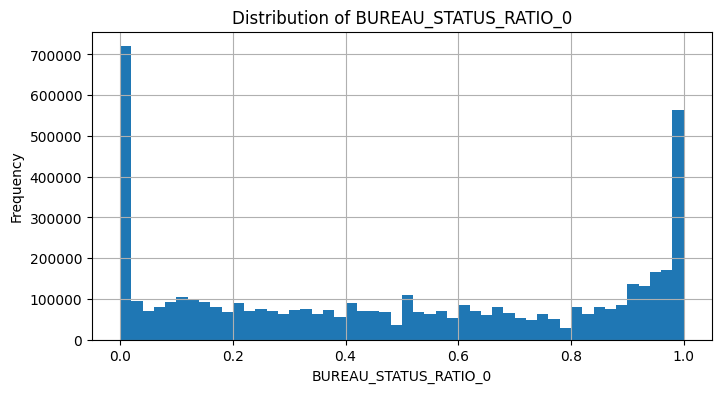

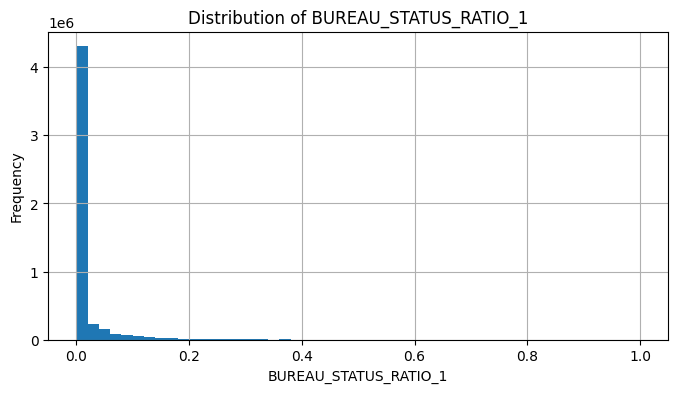

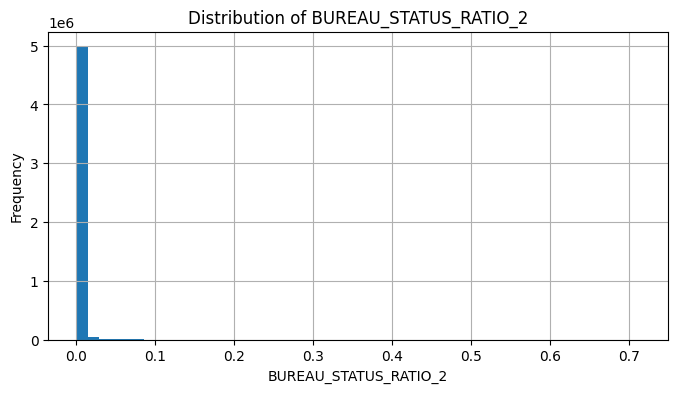

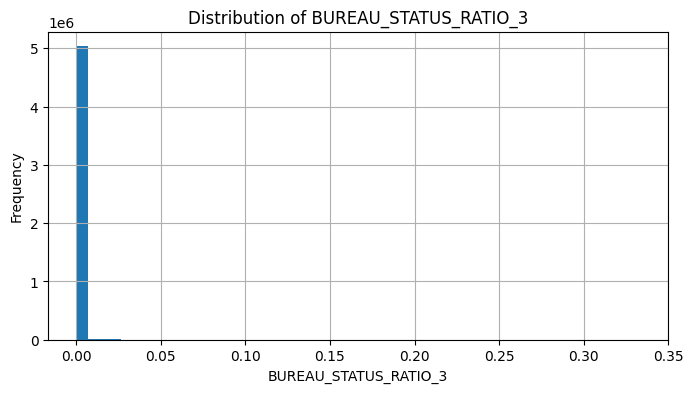

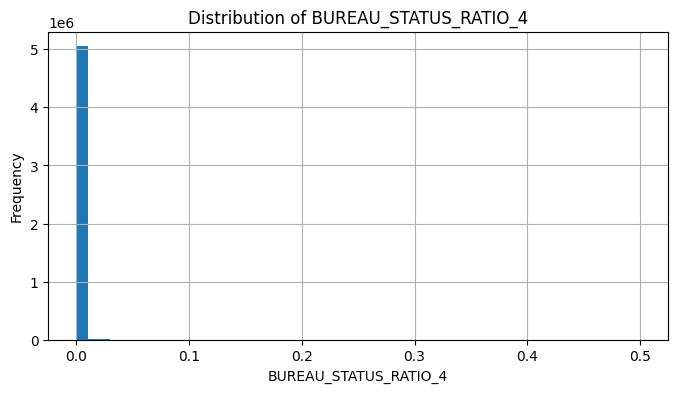

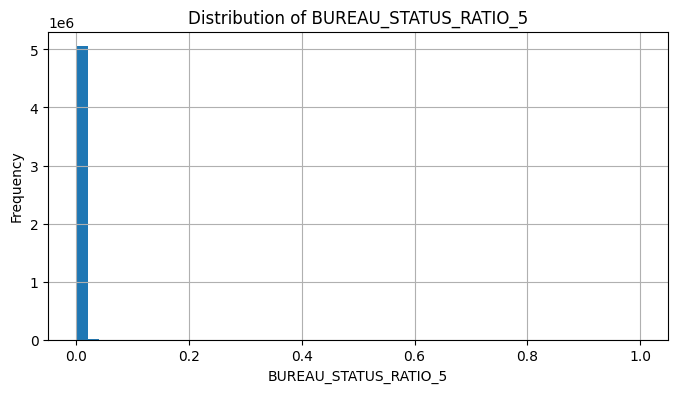

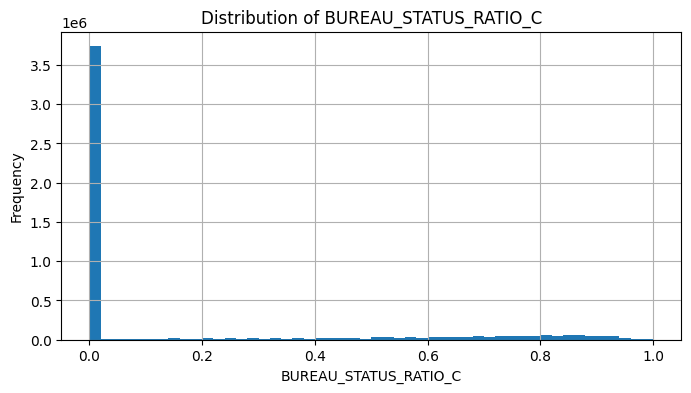

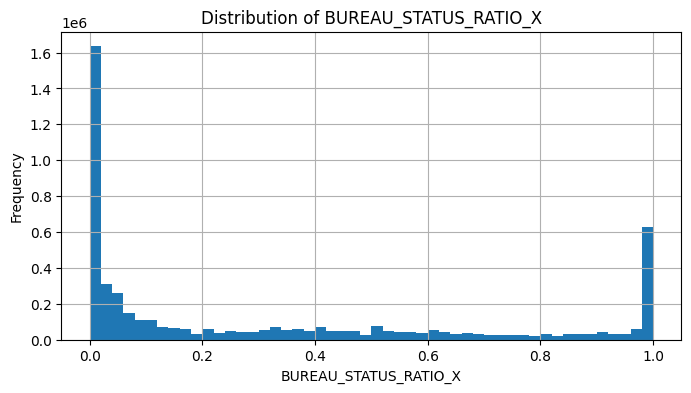

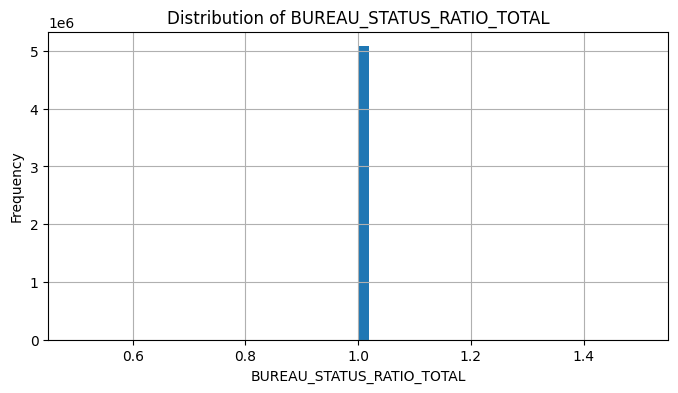

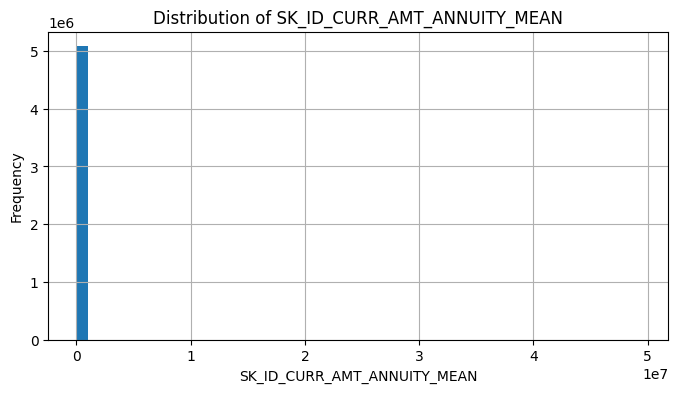

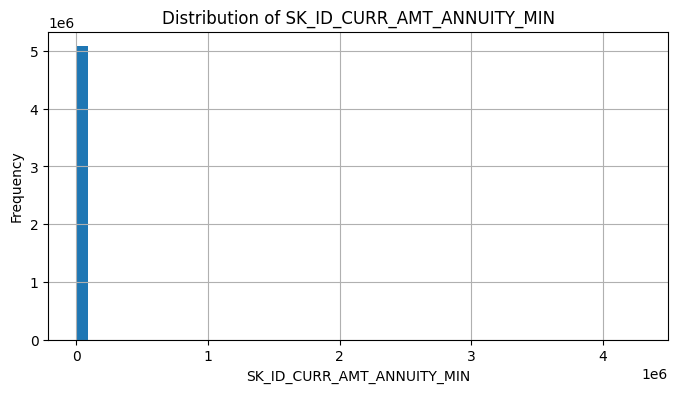

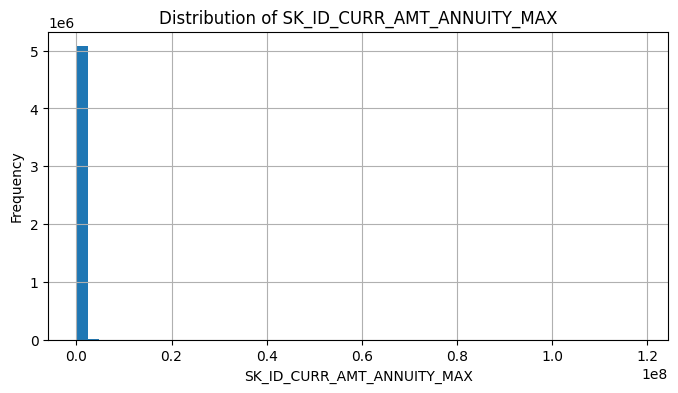

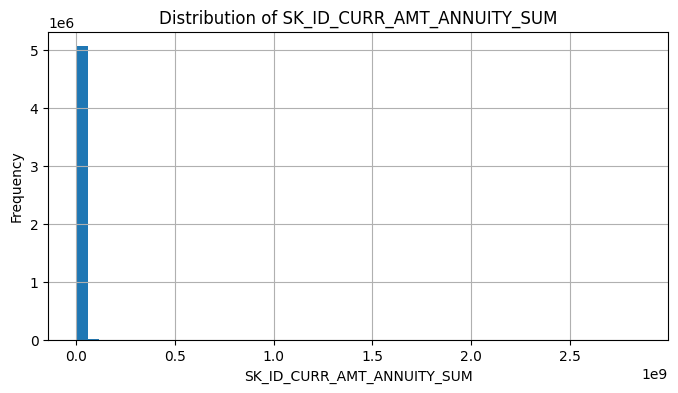

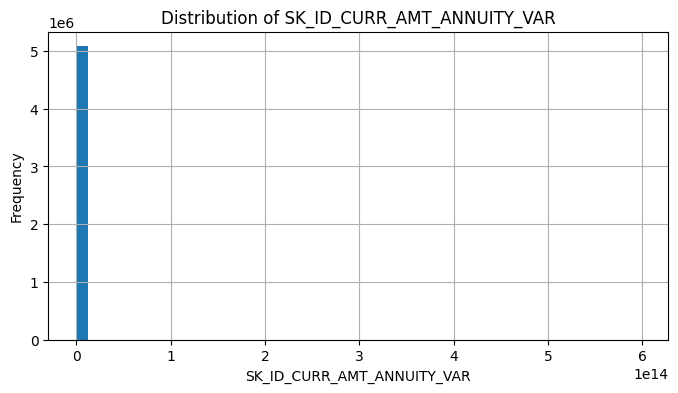

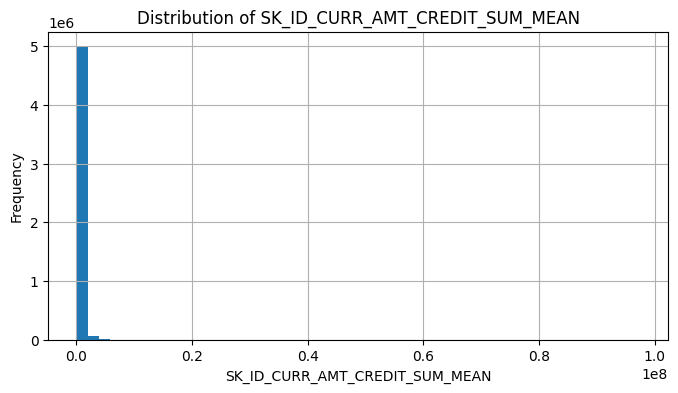

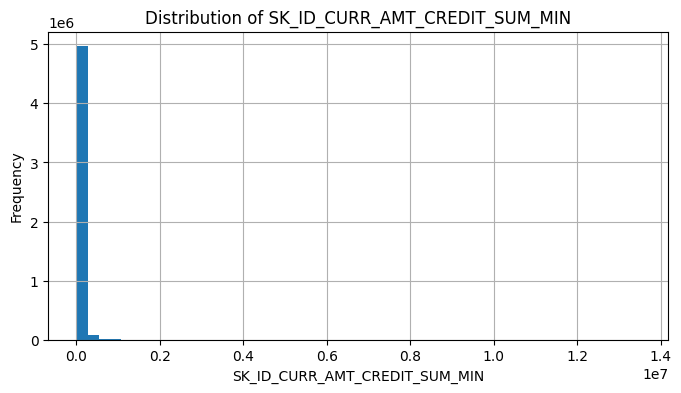

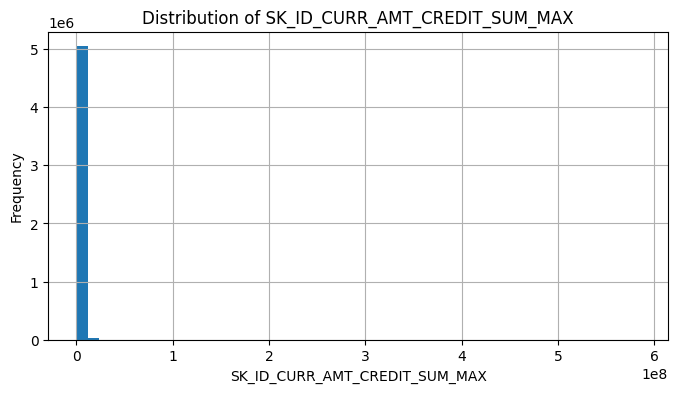

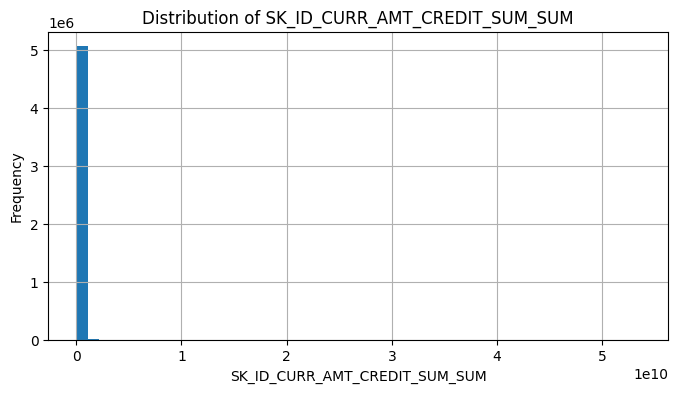

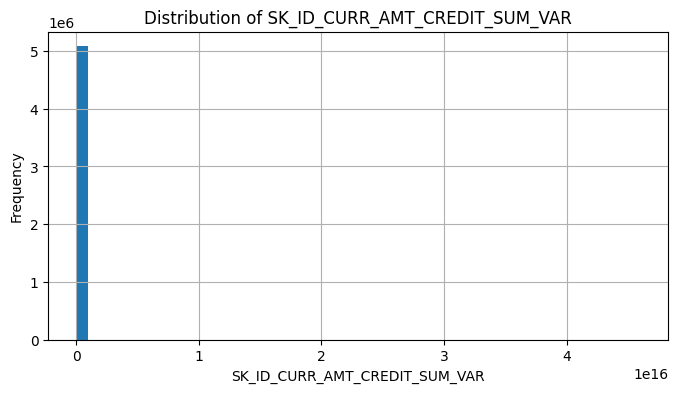

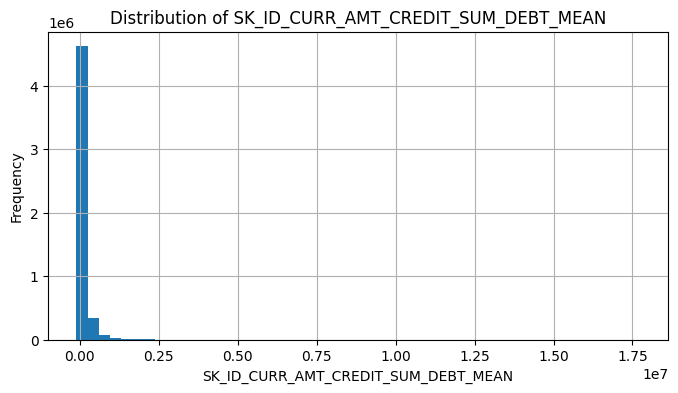

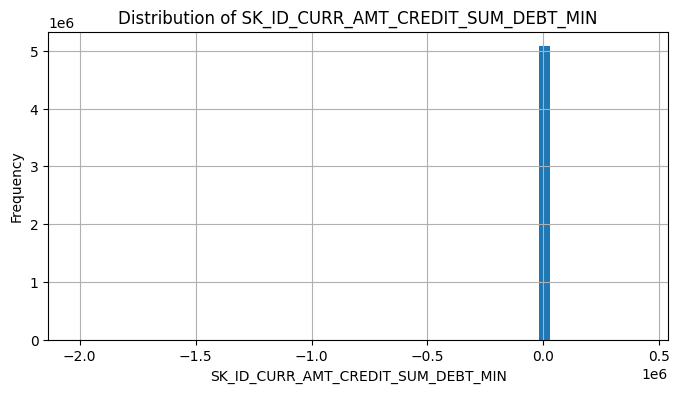

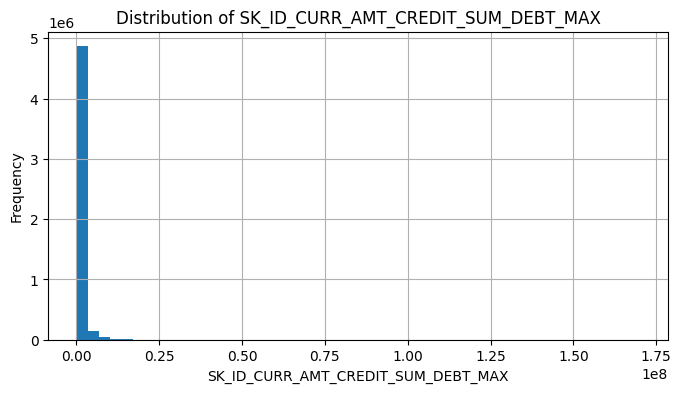

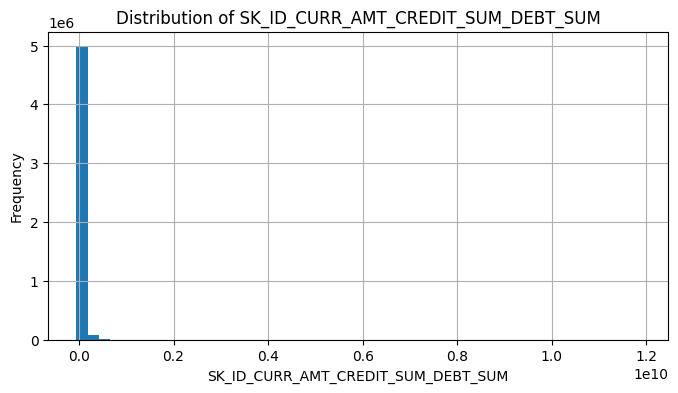

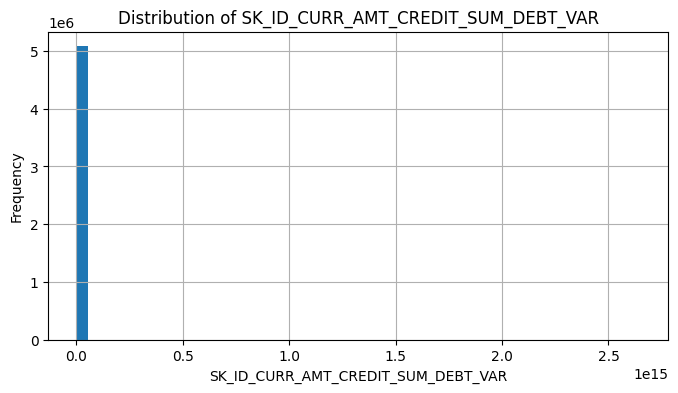

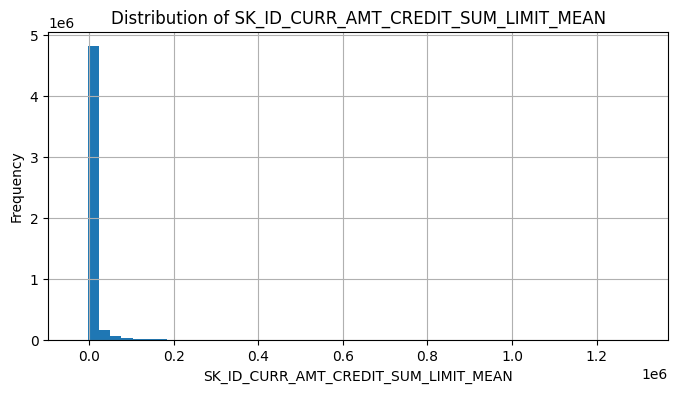

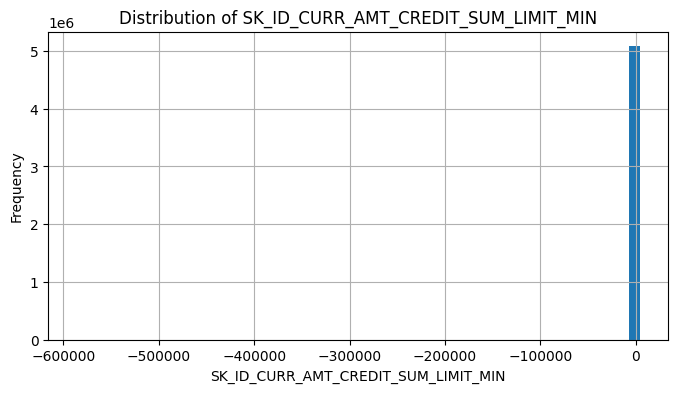

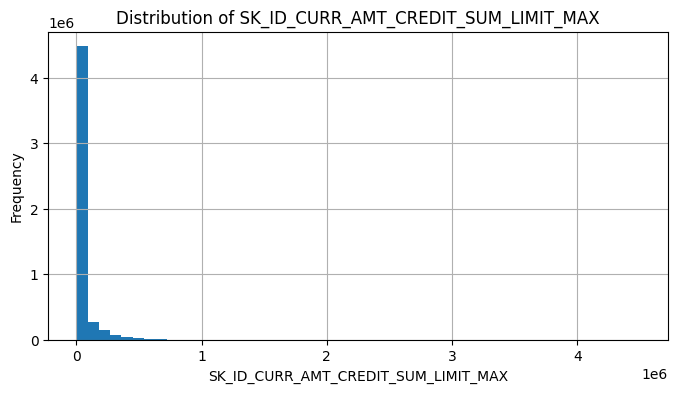

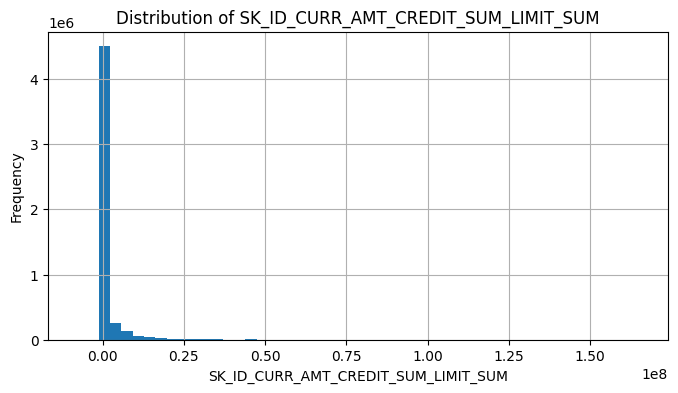

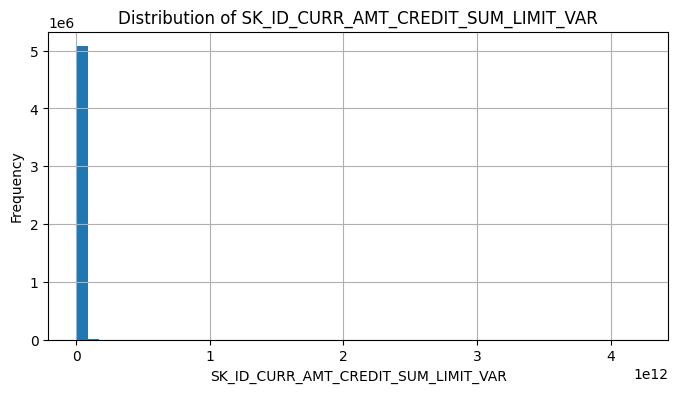

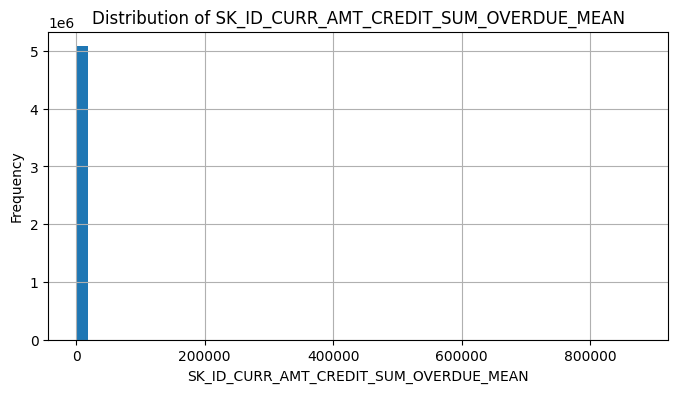

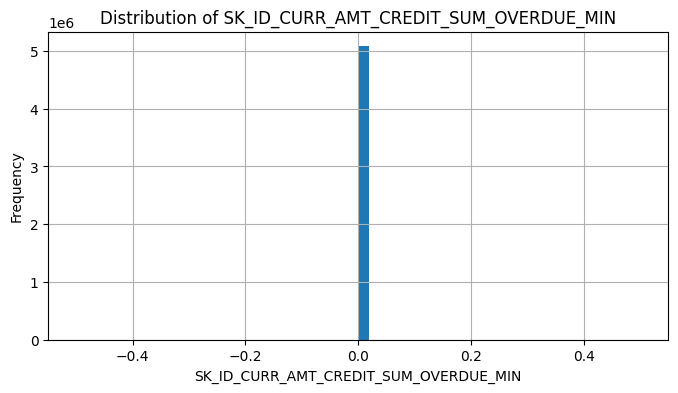

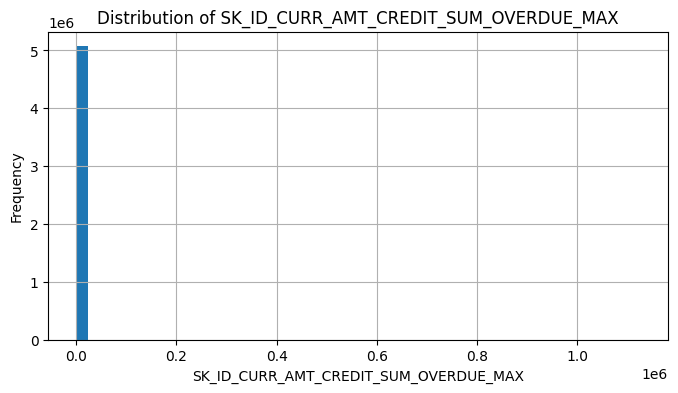

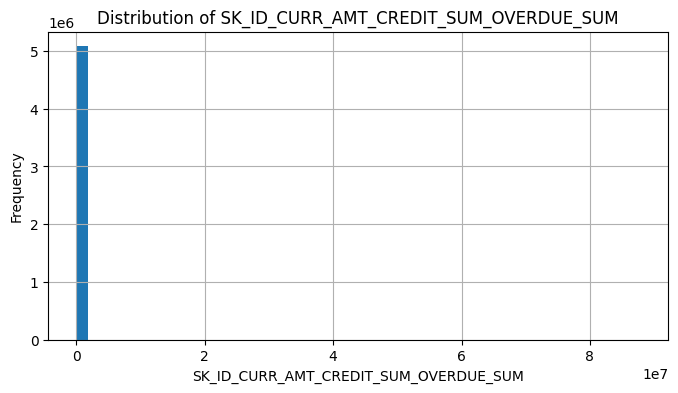

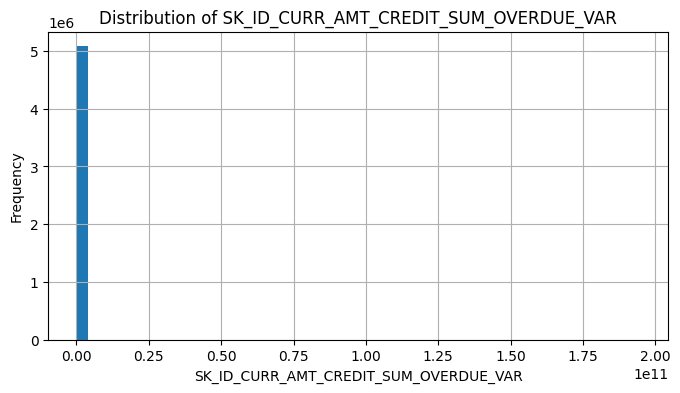

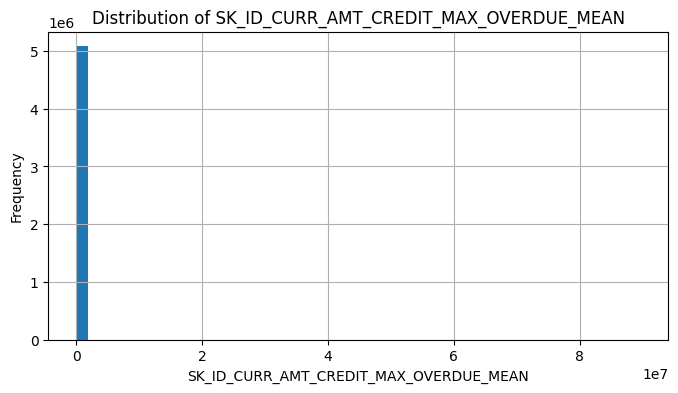

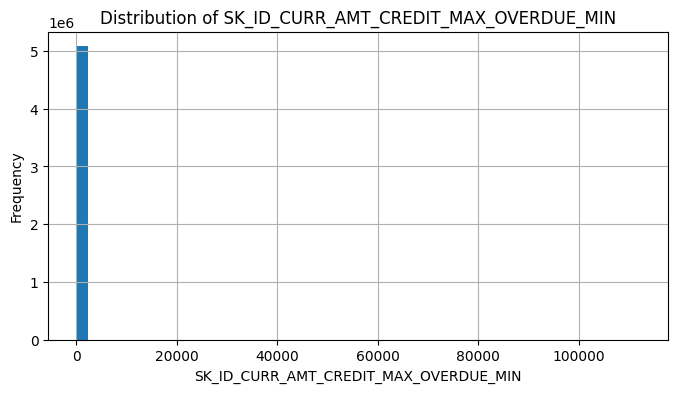

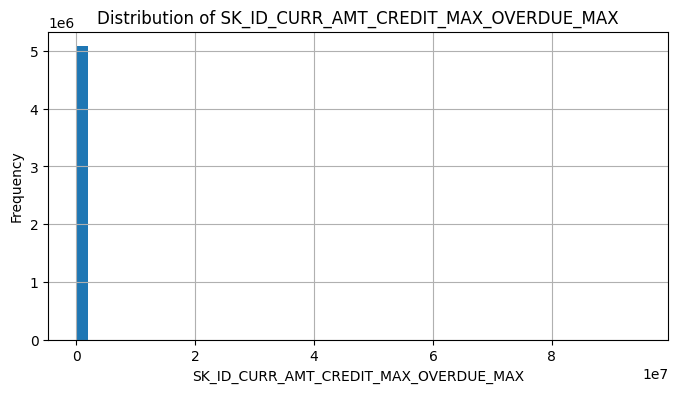

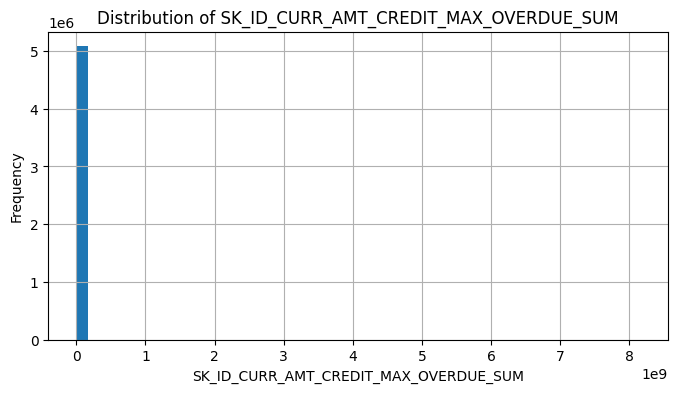

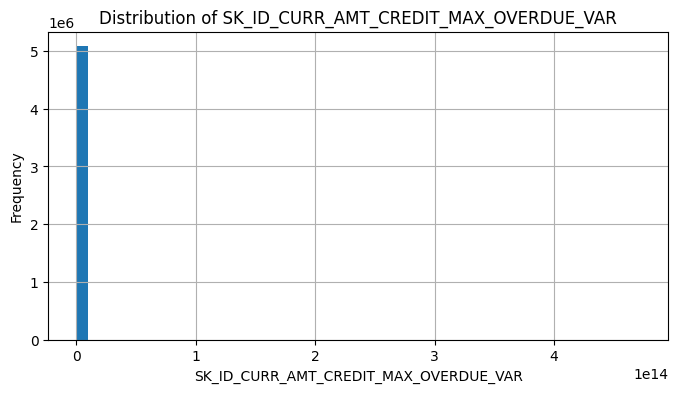

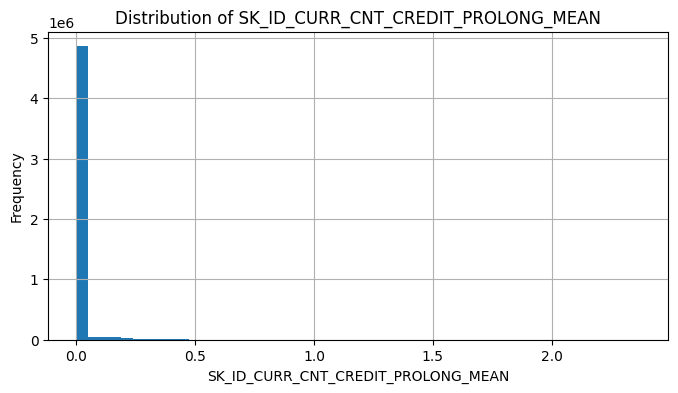

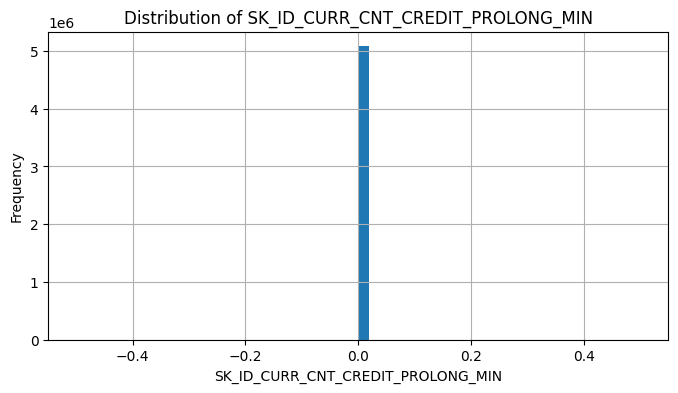

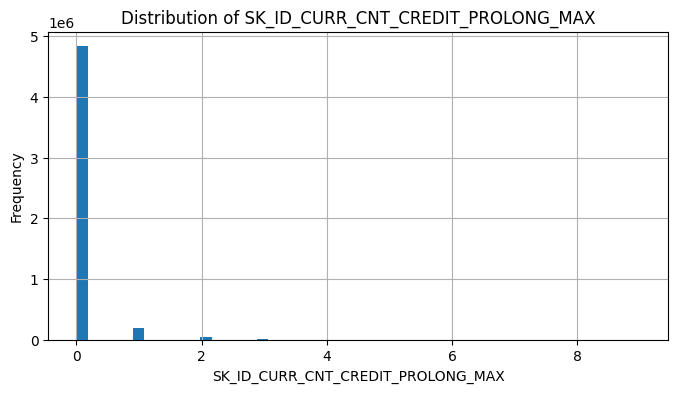

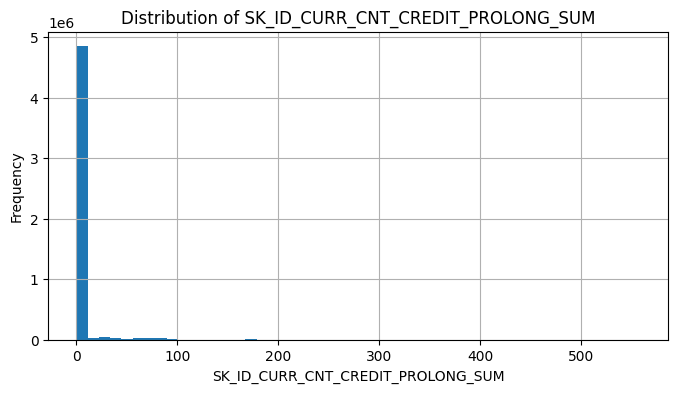

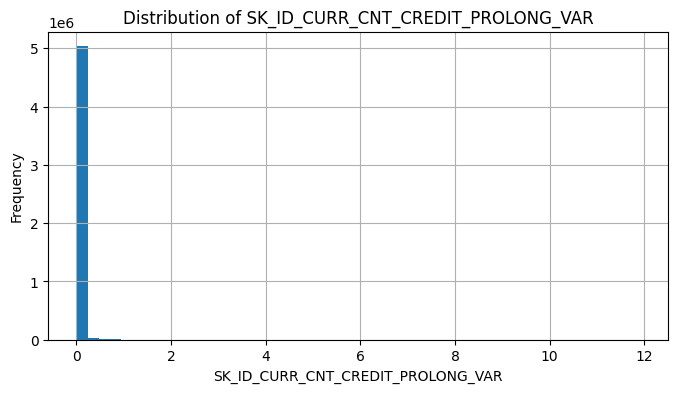

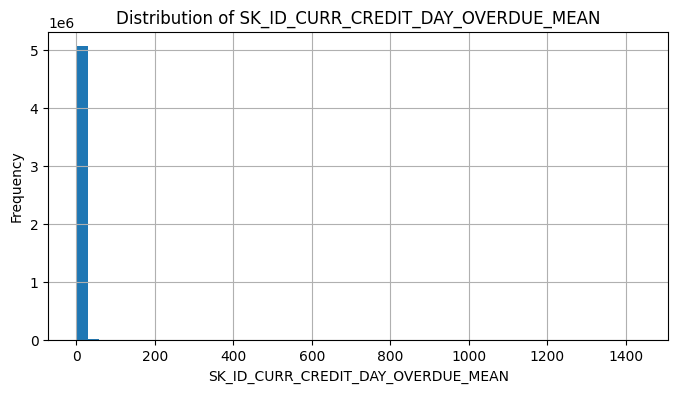

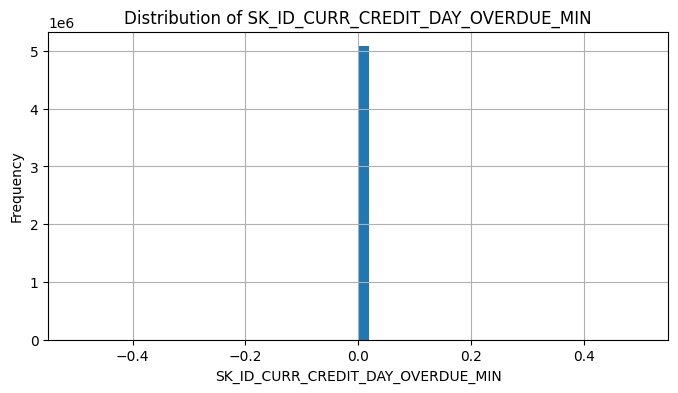

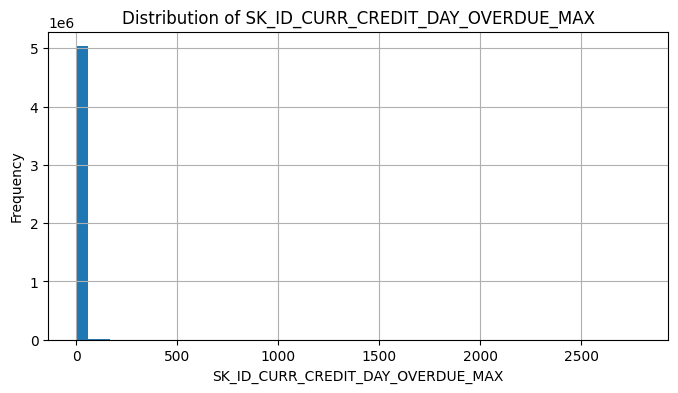

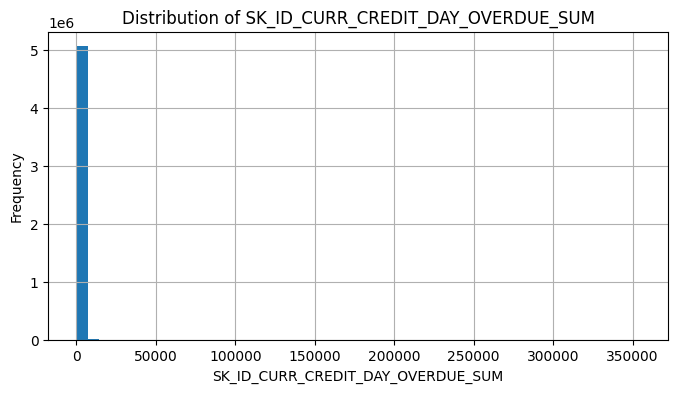

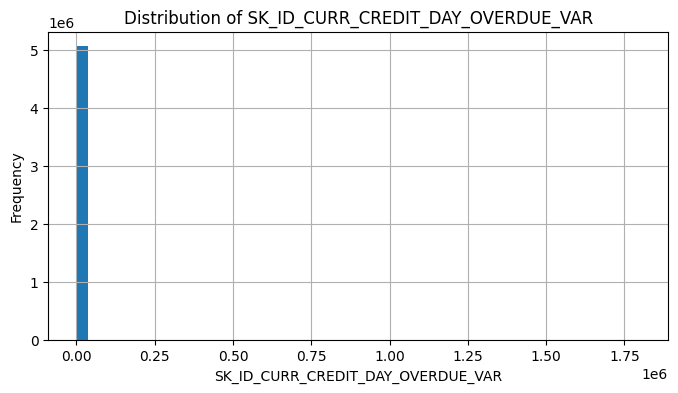

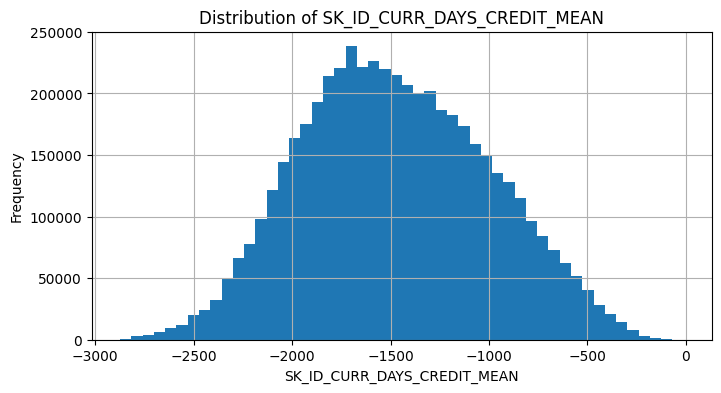

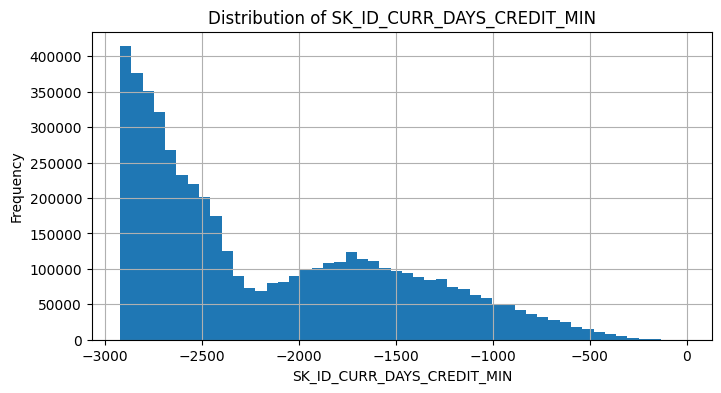

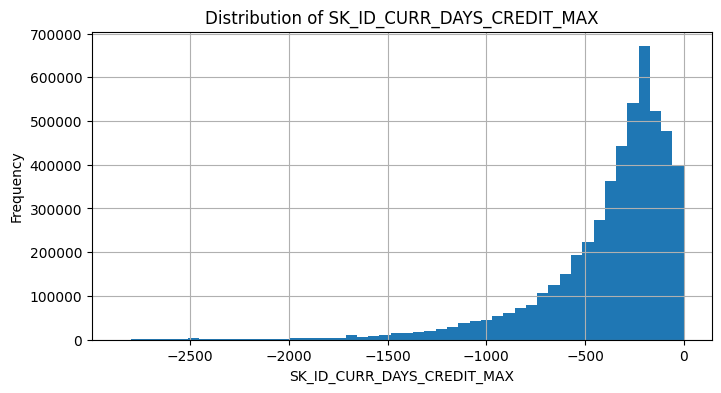

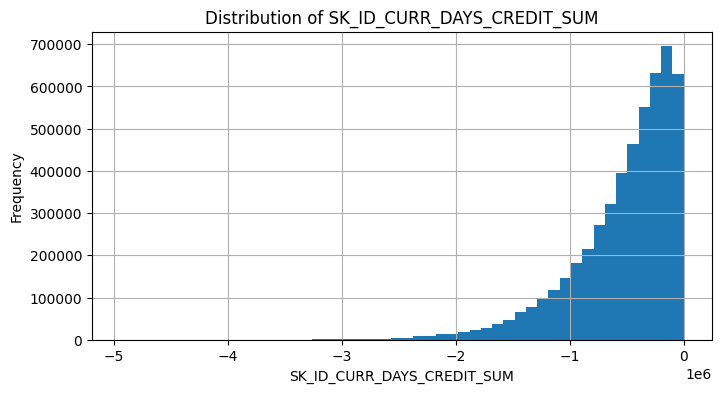

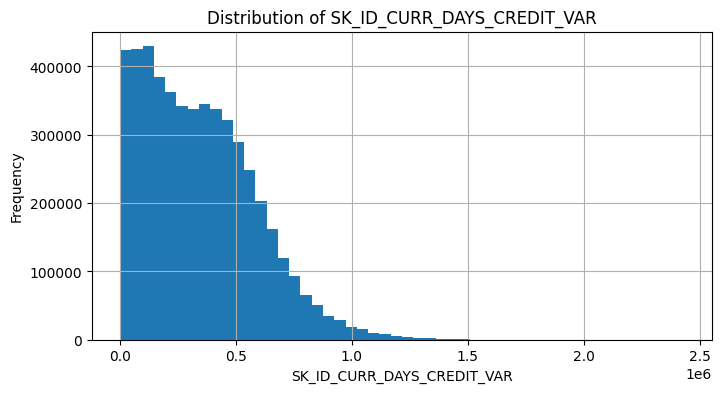

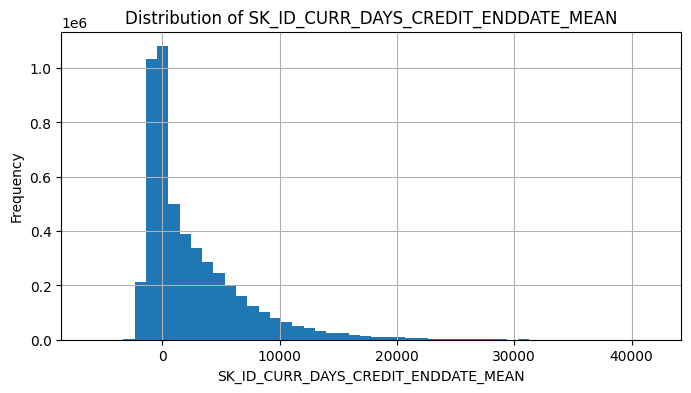

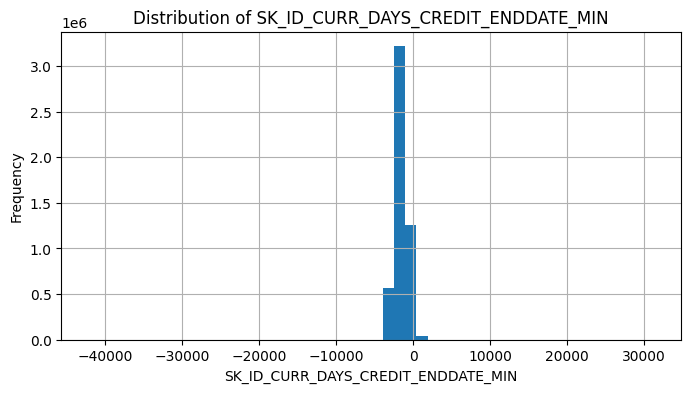

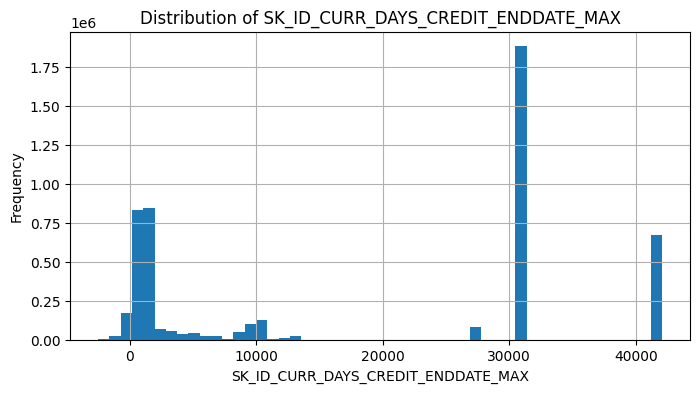

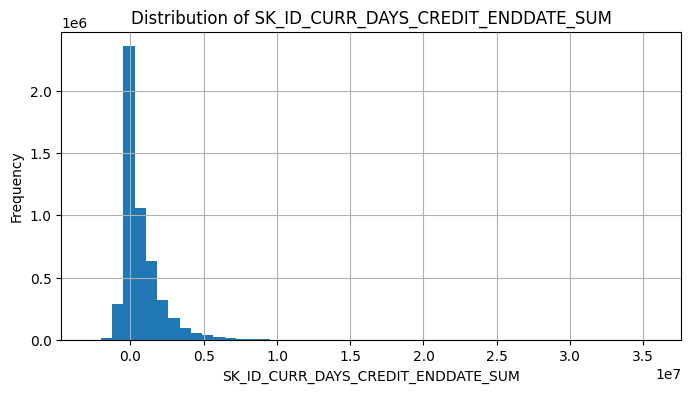

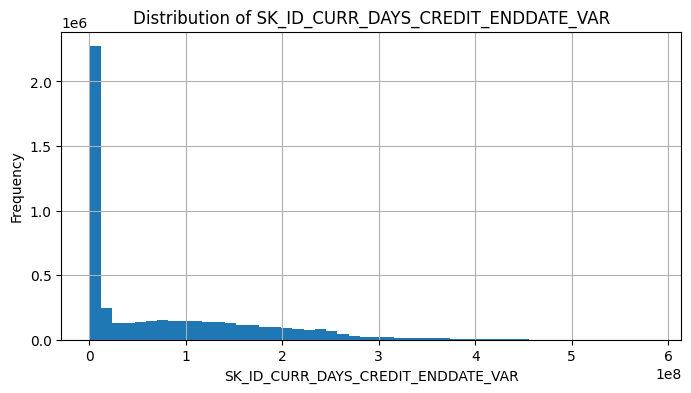

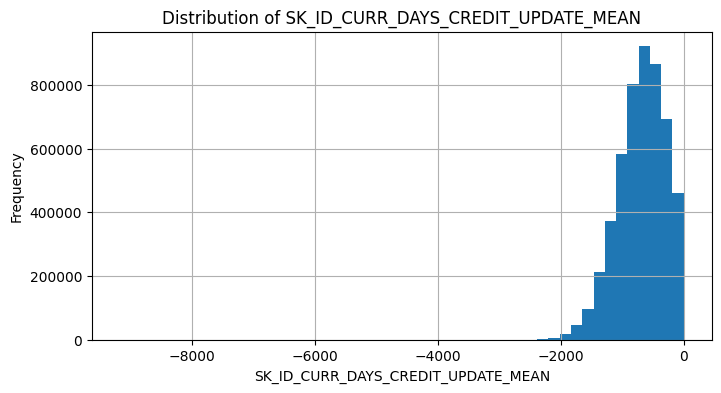

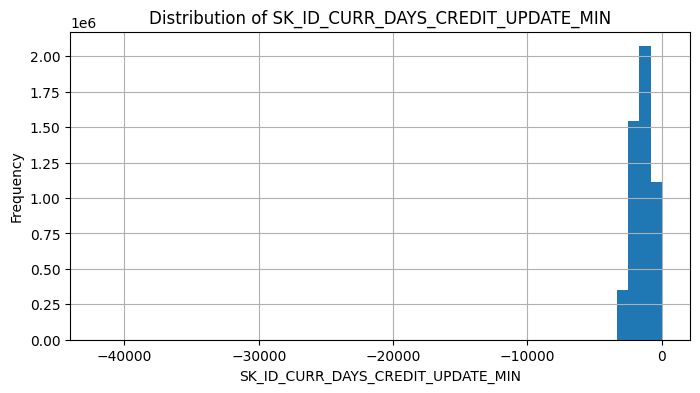

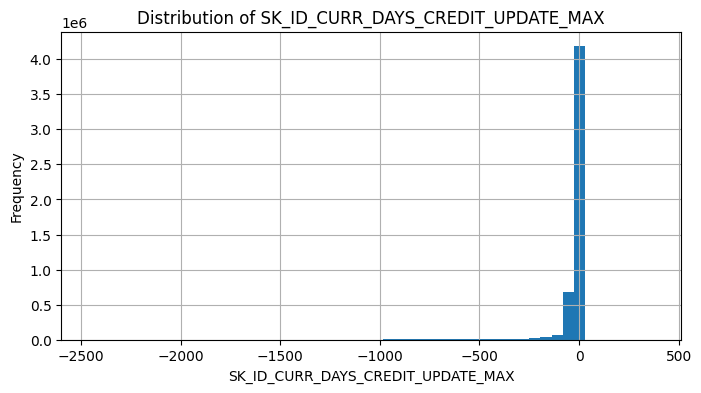

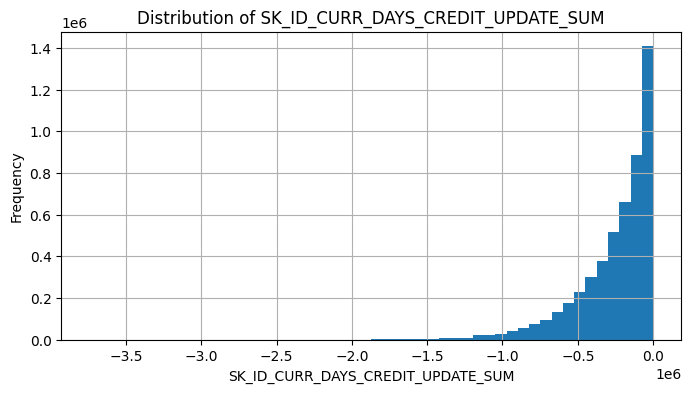

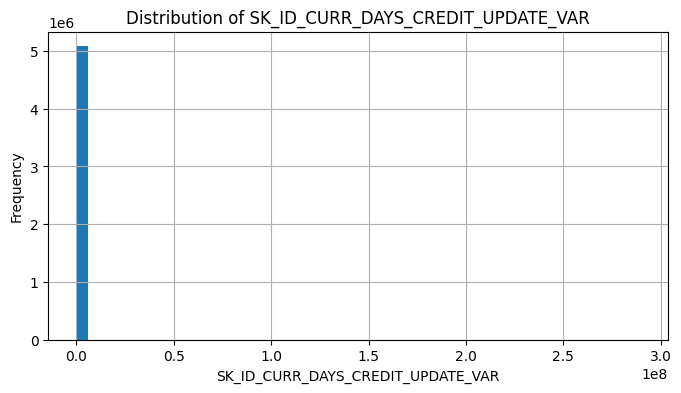

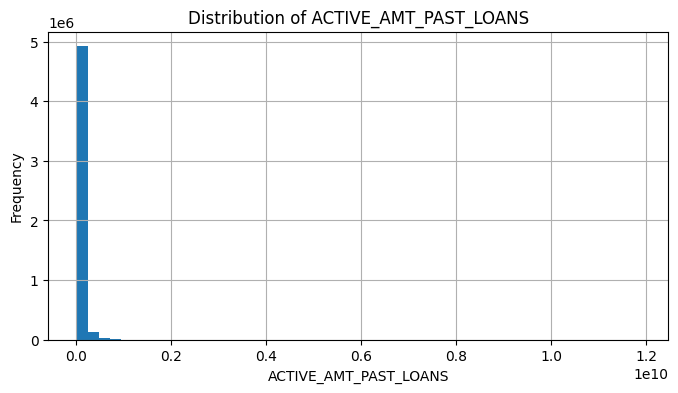

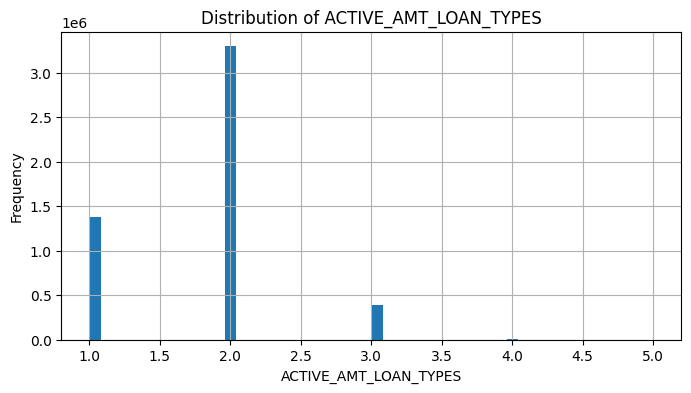

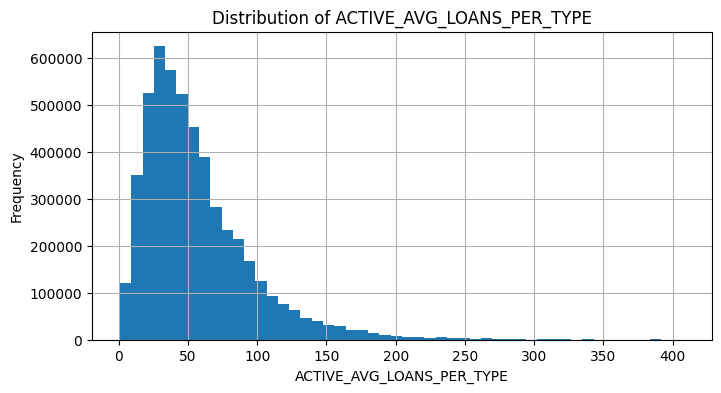

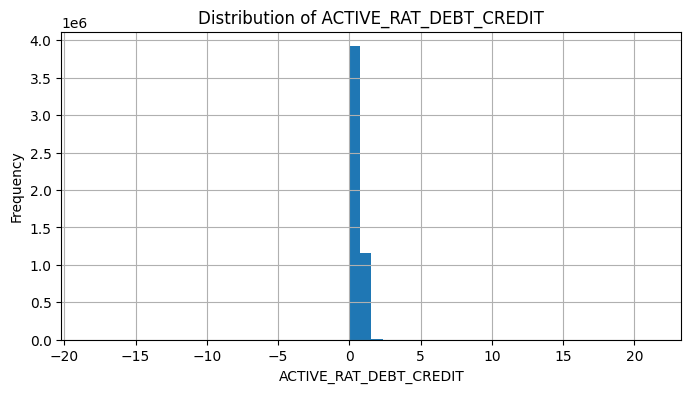

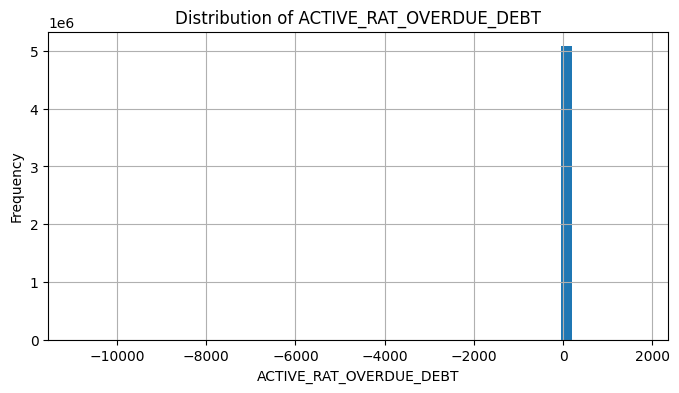

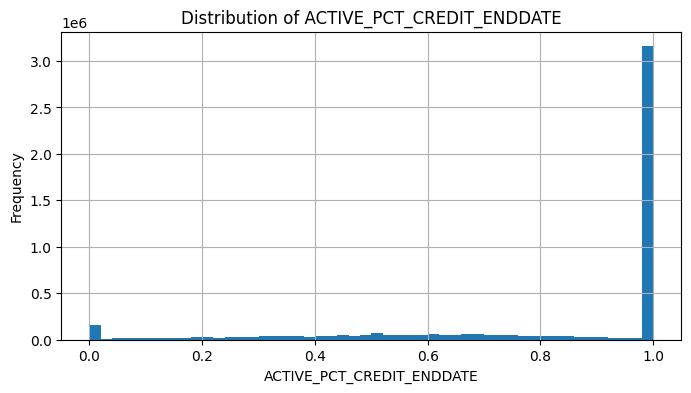

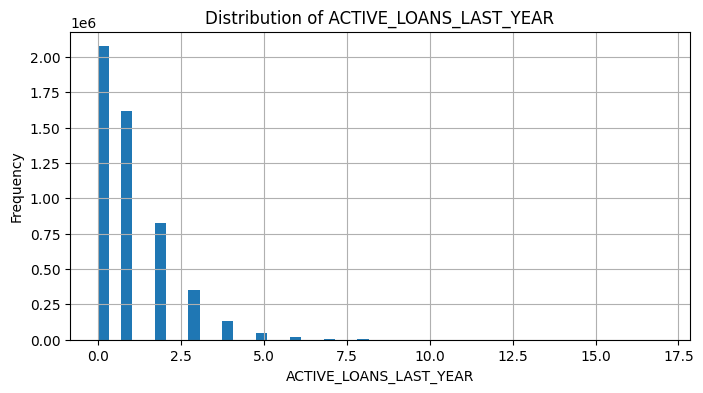

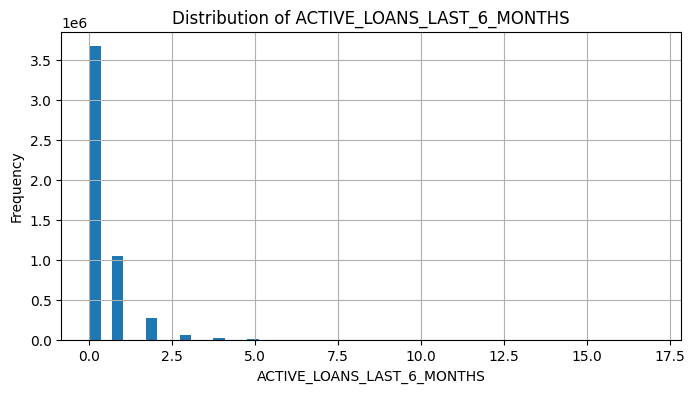

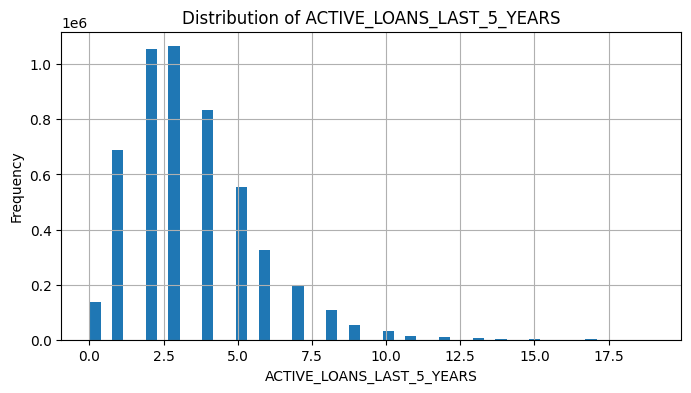

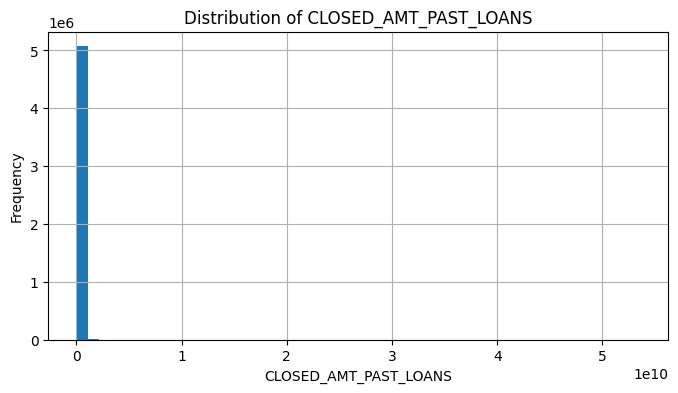

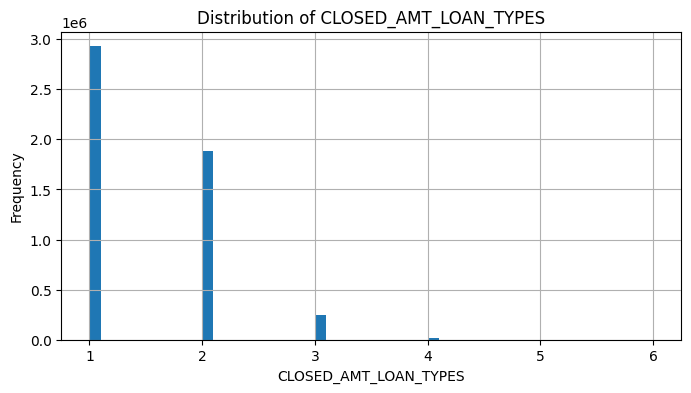

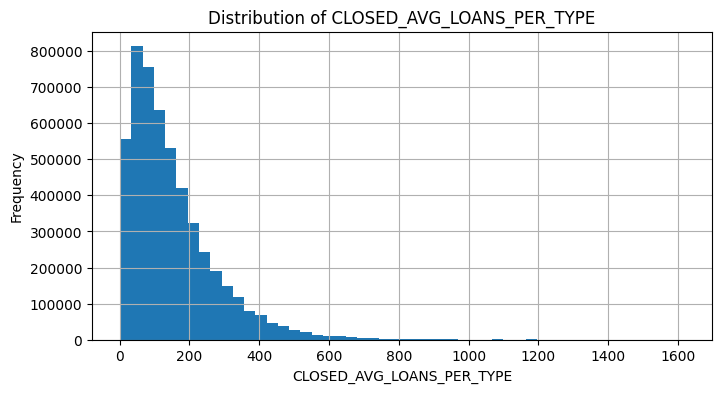

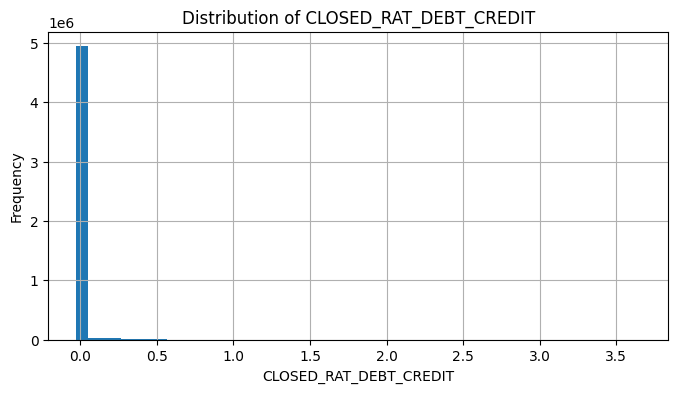

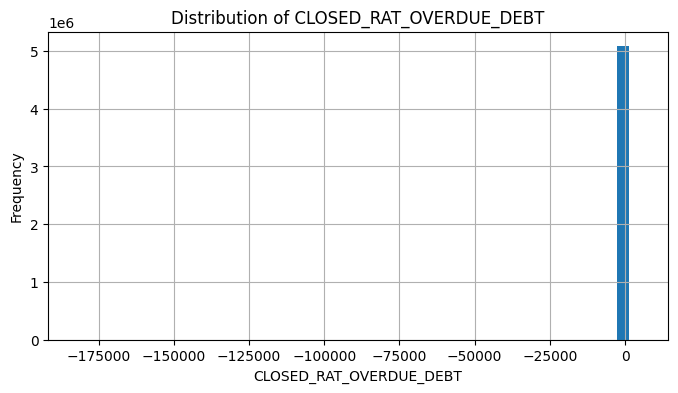

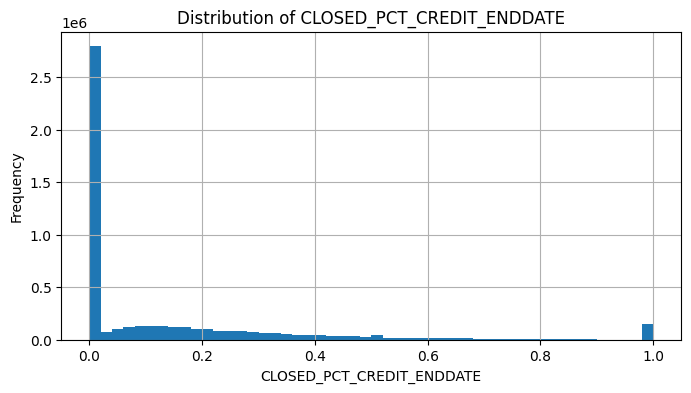

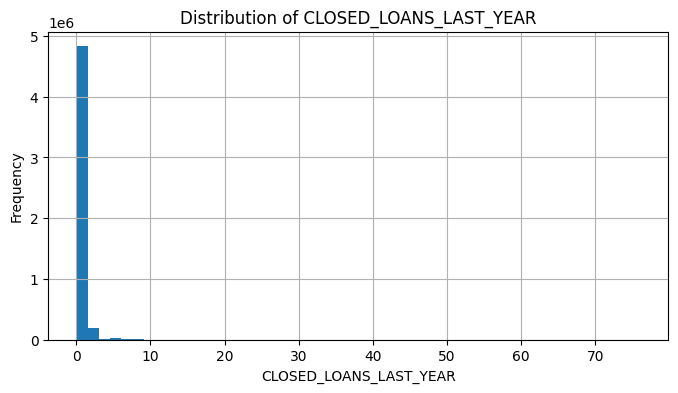

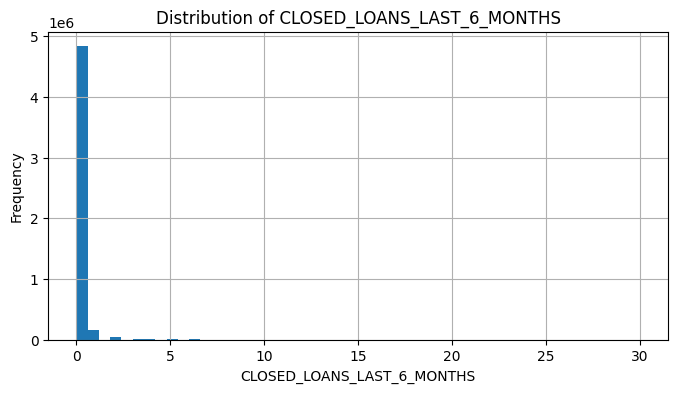

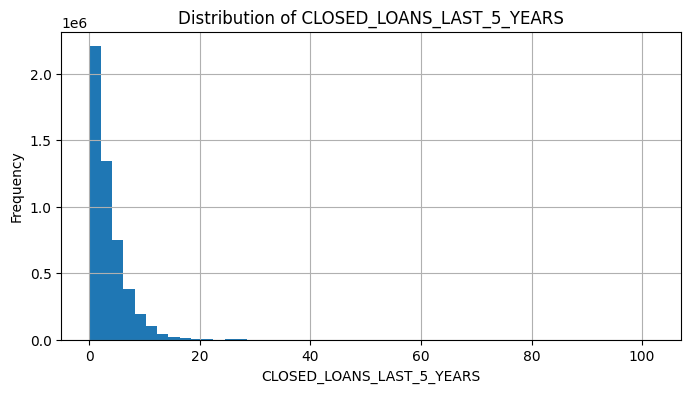

In [68]:
# Distribution of numerical features
numeric_cols = active_loans_with_features.select_dtypes(include=['int', 'float']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    active_loans_with_features[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

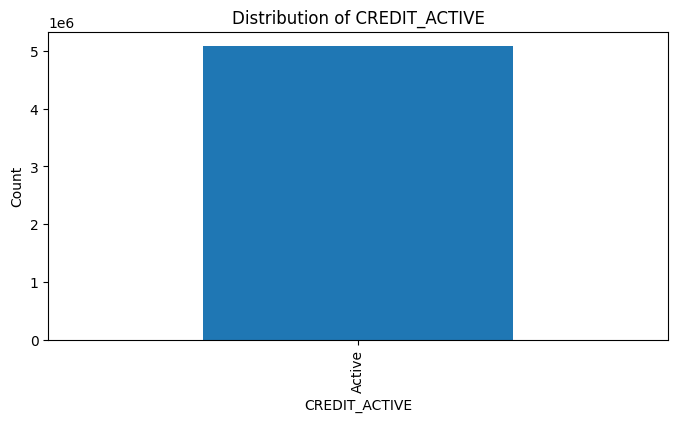

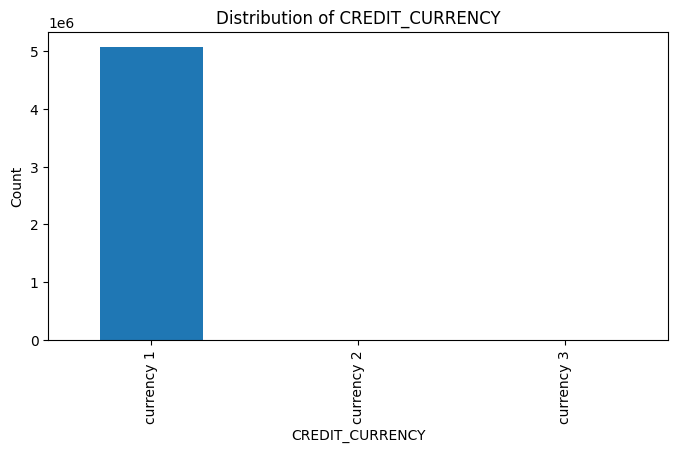

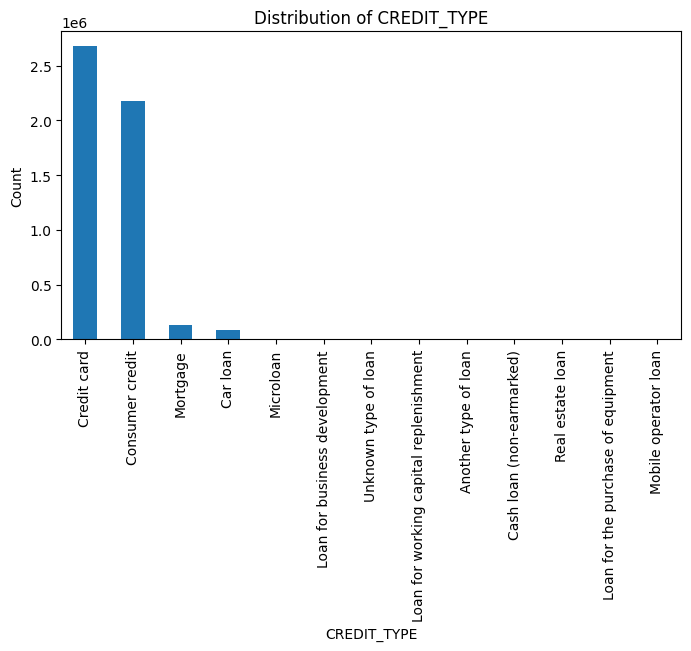

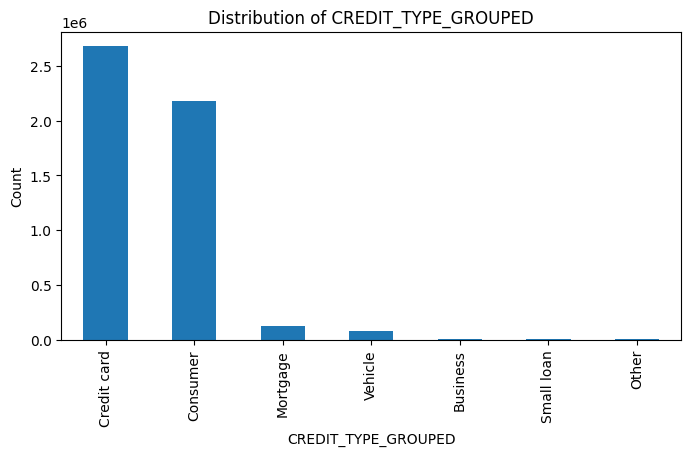

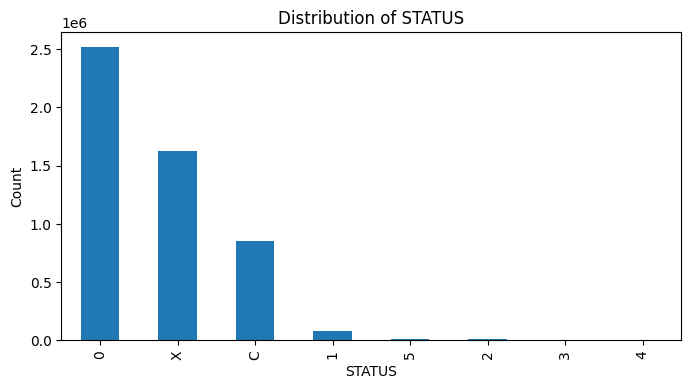

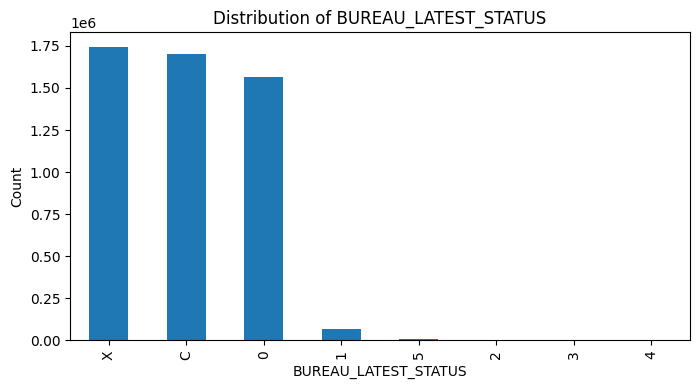

In [69]:
# Distribution of categorical features

categorical_cols = active_loans_with_features.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    active_loans_with_features[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [70]:
# Drop the CREDIT_TYPE column
active_loans_with_features.drop(columns=['CREDIT_TYPE'], inplace=True)

In [71]:
# Drop the CREDIT_ACTIVE column
active_loans_with_features.drop(columns=['CREDIT_ACTIVE'], inplace=True)

In [72]:
# Drop SK_ID_CURR_y
active_loans_with_features.drop(columns=['SK_ID_CURR_y'], inplace=True)

In [73]:
# Save dataframe
active_loans_with_features.to_csv(os.path.join(data_dir, 'active_loans_with_features.csv'), index=False)

In [74]:
# Clear dataframe from memory
del active_loans_with_features

### Data Preprocessing and Feature Engineering `installments_payments.csv`, `credit_card_balance.csv`, `POS_CASH_balance.csv`

Column descriptions:

**`installments_payments.csv`**

| Column Name              | Description                                                                                      |
| ------------------------ | ------------------------------------------------------------------------------------------------ |
| SK\_ID\_PREV             | ID of previous credit in Home credit related to loan in our sample. (One loan can have multiple) |
| SK\_ID\_CURR             | ID of loan in our sample                                                                         |
| NUM\_INSTALMENT\_VERSION | Version of installment calendar (0 is for credit card) of previous credit                        |
| NUM\_INSTALMENT\_NUMBER  | On which installment we observe payment                                                          |
| DAYS\_INSTALMENT         | When the installment was supposed to be paid (relative to application date of current loan)      |
| DAYS\_ENTRY\_PAYMENT     | When the installment was actually paid (relative to application date of current loan)            |
| AMT\_INSTALMENT          | Prescribed installment amount of previous credit                                                 |
| AMT\_PAYMENT             | What the client actually paid on previous credit on this installment                             |

**`credit_card_balance.csv`**

| Column Name                   | Description                                                                                    |
| ----------------------------- | ---------------------------------------------------------------------------------------------- |
| SK\_ID\_PREV                  | ID of previous credit in Home credit related to loan in our sample (can have multiple credits) |
| SK\_ID\_CURR                  | ID of loan in our sample                                                                       |
| MONTHS\_BALANCE               | Month of balance relative to application date (-1 is freshest balance)                         |
| AMT\_BALANCE                  | Balance during the month of previous credit                                                    |
| AMT\_CREDIT\_LIMIT\_ACTUAL    | Credit card limit during the month of the previous credit                                      |
| AMT\_DRAWINGS\_ATM\_CURRENT   | Amount drawing at ATM during the month of the previous credit                                  |
| AMT\_DRAWINGS\_CURRENT        | Amount drawing during the month of the previous credit                                         |
| AMT\_DRAWINGS\_OTHER\_CURRENT | Amount of other drawings during the month of the previous credit                               |
| AMT\_DRAWINGS\_POS\_CURRENT   | Amount drawing or buying goods during the month of the previous credit                         |
| AMT\_INST\_MIN\_REGULARITY    | Minimal installment for this month of the previous credit                                      |
| AMT\_PAYMENT\_CURRENT         | How much did the client pay during the month on the previous credit                            |
| AMT\_PAYMENT\_TOTAL\_CURRENT  | How much did the client pay during the month in total on the previous credit                   |
| AMT\_RECEIVABLE\_PRINCIPAL    | Amount receivable for principal on the previous credit                                         |
| AMT\_RECIVABLE                | Amount receivable on the previous credit                                                       |
| AMT\_TOTAL\_RECEIVABLE        | Total amount receivable on the previous credit                                                 |
| CNT\_DRAWINGS\_ATM\_CURRENT   | Number of drawings at ATM during this month on the previous credit                             |
| CNT\_DRAWINGS\_CURRENT        | Number of drawings during this month on the previous credit                                    |
| CNT\_DRAWINGS\_OTHER\_CURRENT | Number of other drawings during this month on the previous credit                              |
| CNT\_DRAWINGS\_POS\_CURRENT   | Number of drawings for goods during this month on the previous credit                          |
| CNT\_INSTALMENT\_MATURE\_CUM  | Number of paid installments on the previous credit                                             |
| NAME\_CONTRACT\_STATUS        | Contract status (active signed,...) on the previous credit                                     |
| SK\_DPD                       | DPD (Days past due) during the month on the previous credit                                    |
| SK\_DPD\_DEF                  | DPD (Days past due) during the month with tolerance of the previous credit                     |


**`POS_CASH_balance.csv`**

| File Name            | Column Name            | Description |
|----------------------|------------------------|-------------|
| POS_CASH_balance.csv | SK_ID_PREV             | "ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)" |
| POS_CASH_balance.csv | SK_ID_CURR             | ID of loan in our sample |
| POS_CASH_balance.csv | MONTHS_BALANCE         | "Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )", time only relative to the application |
| POS_CASH_balance.csv | CNT_INSTALMENT         | Term of previous credit (can change over time) |
| POS_CASH_balance.csv | CNT_INSTALMENT_FUTURE  | Installments left to pay on the previous credit |
| POS_CASH_balance.csv | NAME_CONTRACT_STATUS   | Contract status during the month |
| POS_CASH_balance.csv | SK_DPD                 | DPD (days past due) during the month of previous credit |
| POS_CASH_balance.csv | SK_DPD_DEF             | DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit |

### EDA for `installments_payments.csv`

=== installments_payments EDA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
         SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00  

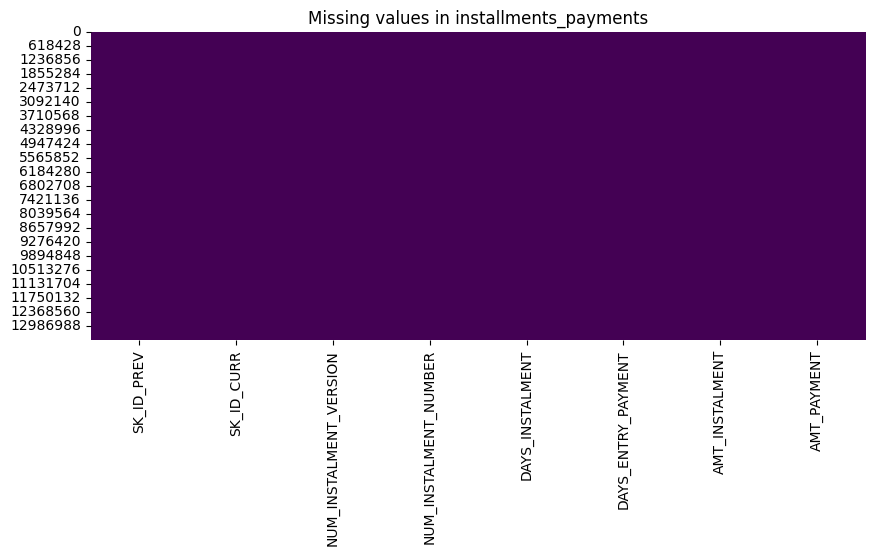

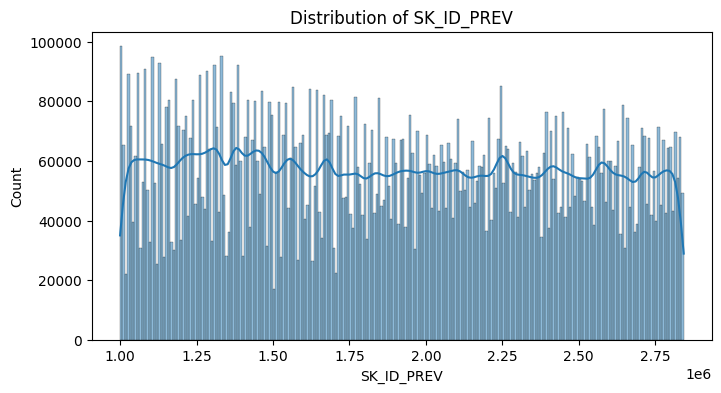

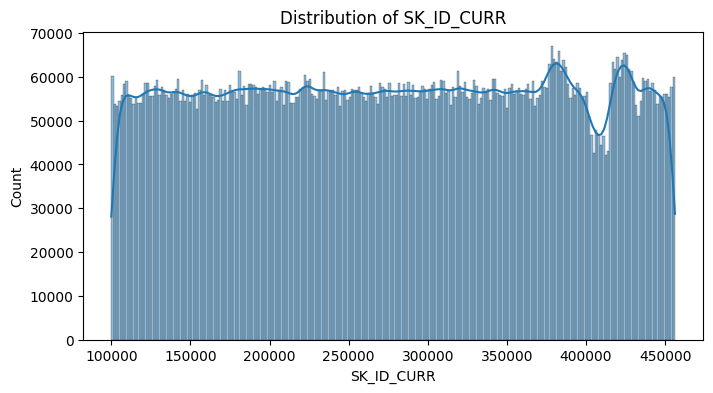

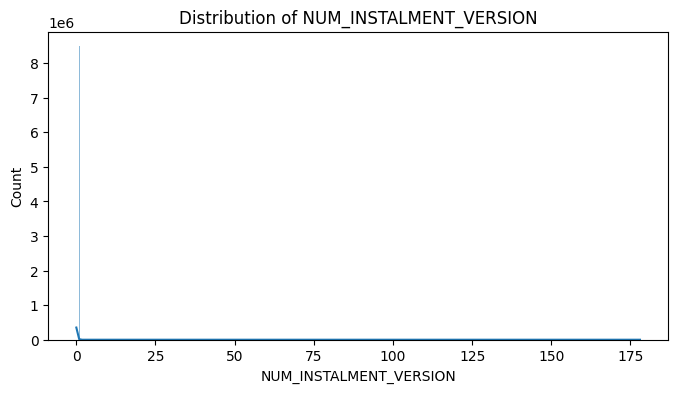

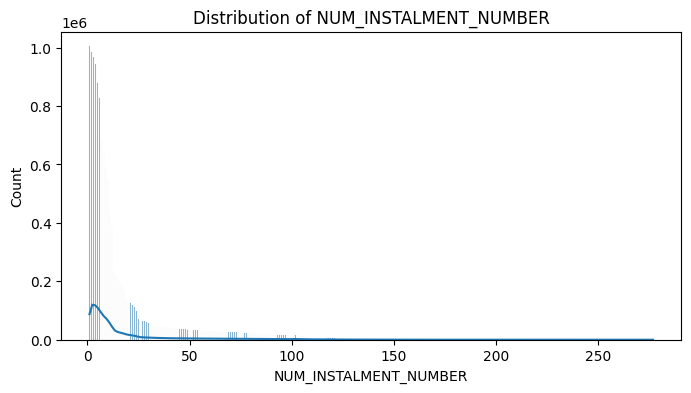

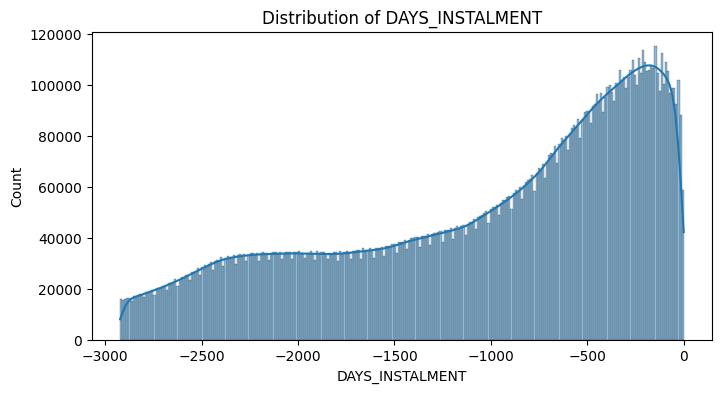

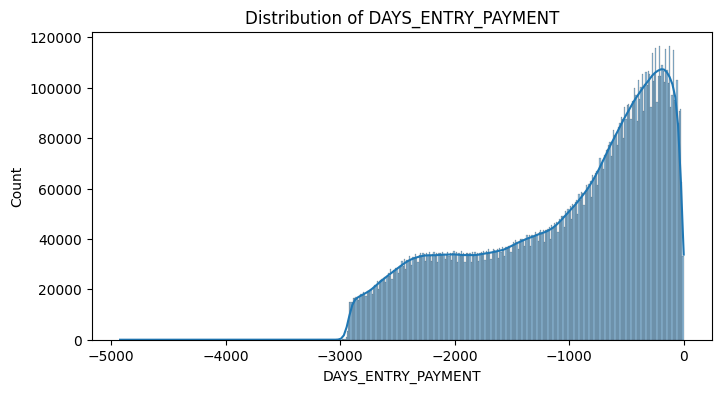

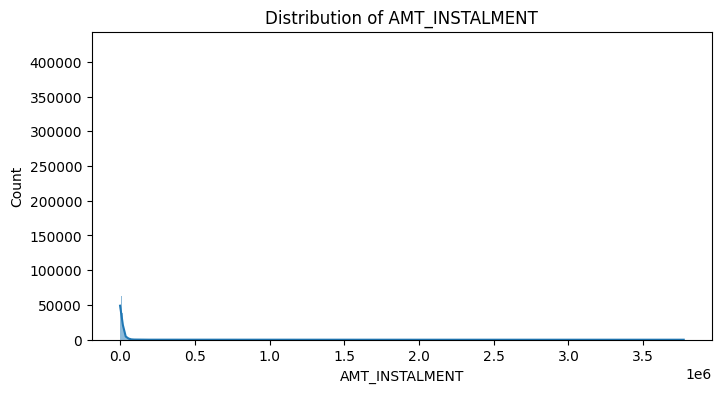

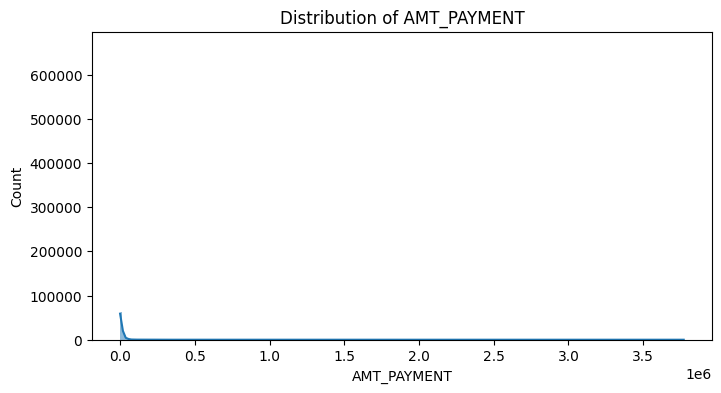

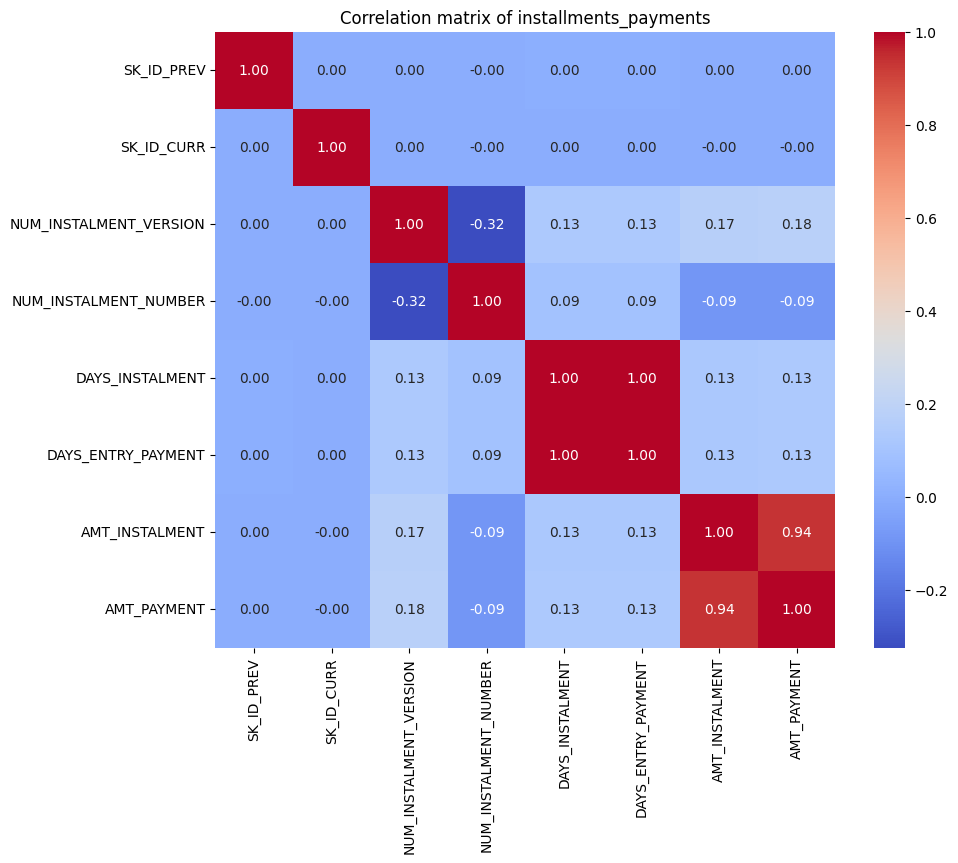

In [77]:
installments_payments = pd.read_csv(os.path.join(data_dir, 'installments_payments.csv'))

print("=== installments_payments EDA ===")

# Basic info
print(installments_payments.info())
print(installments_payments.describe())

# Missing values
print("\nMissing Values:")
print(installments_payments.isnull().sum())

# Distribution of numeric features
numeric_cols = installments_payments.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(installments_payments[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical features
categorical_cols = installments_payments.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    installments_payments[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(installments_payments[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of installments_payments')
plt.show()

### EDA for `credit_card_balance.csv`

=== credit_card_balance EDA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    fl

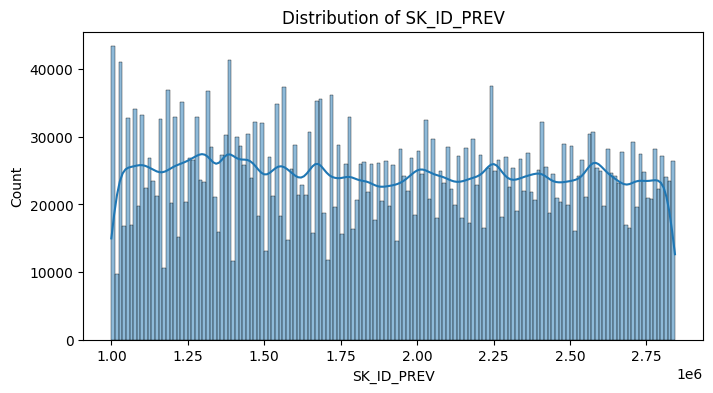

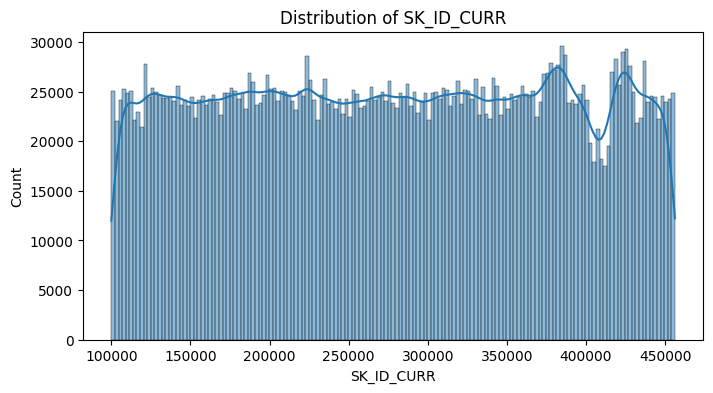

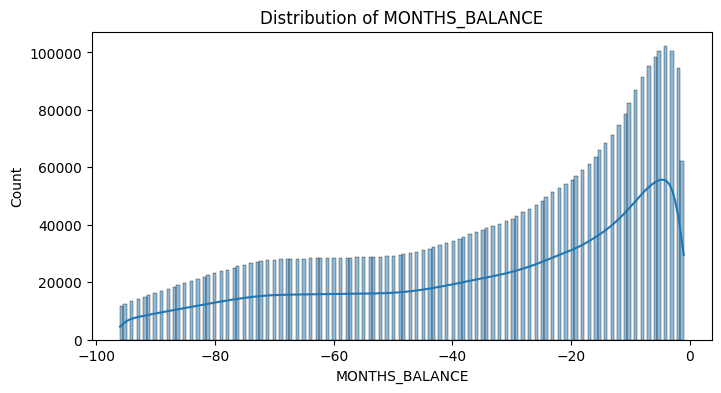

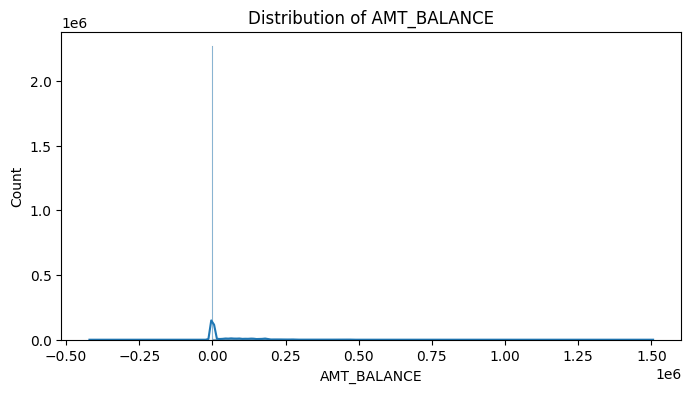

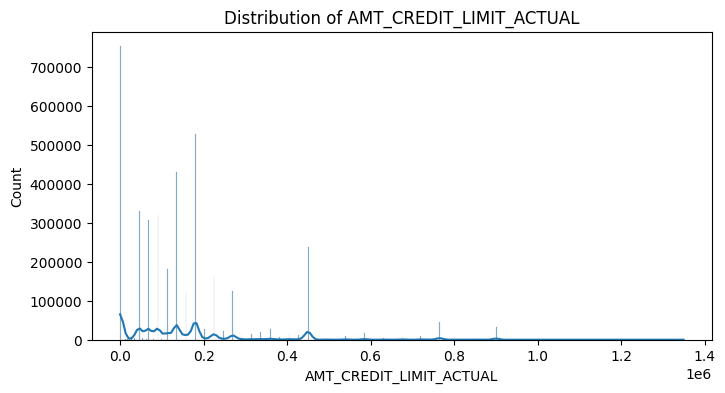

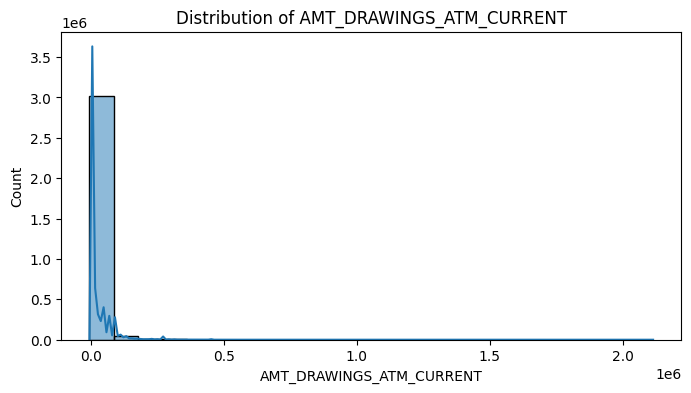

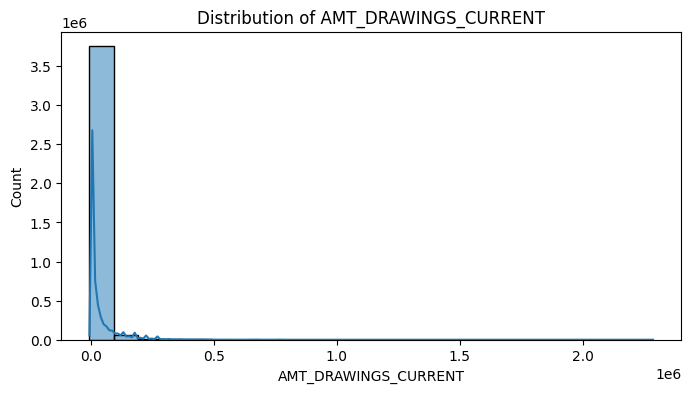

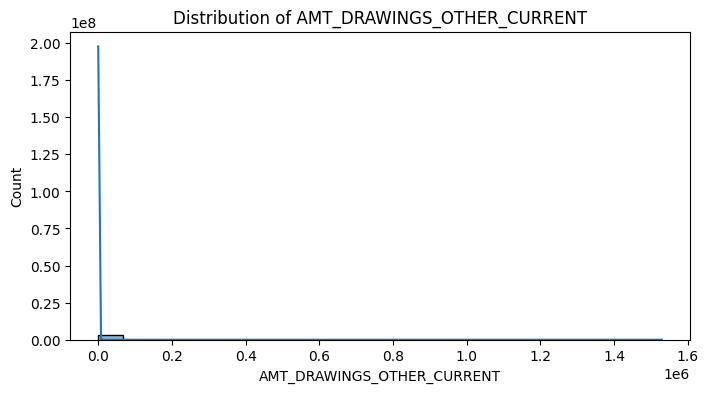

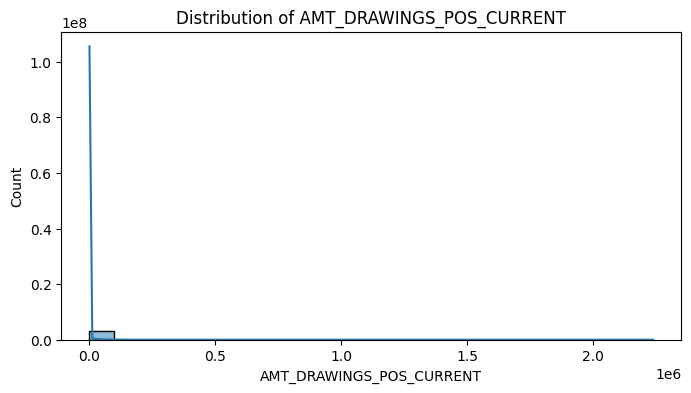

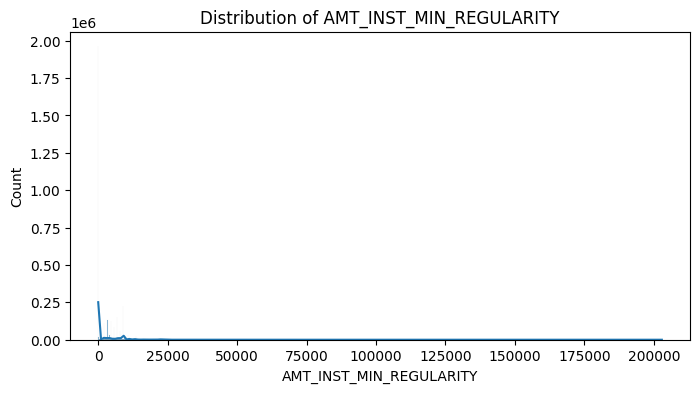

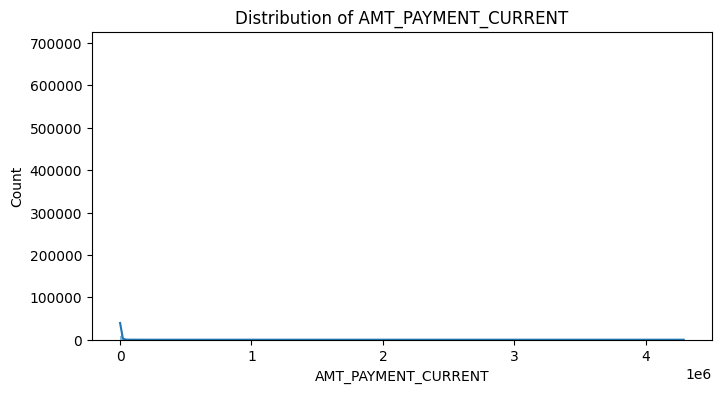

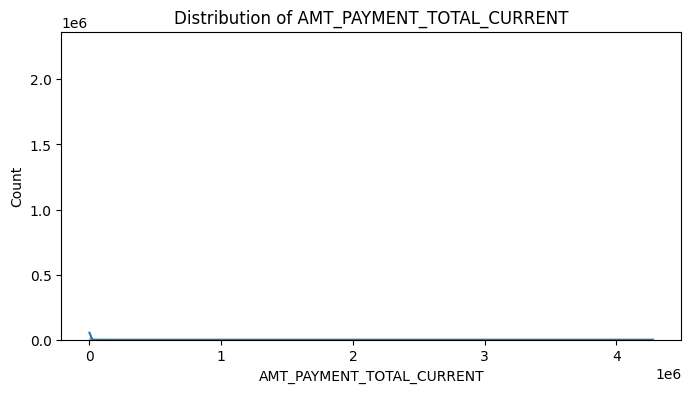

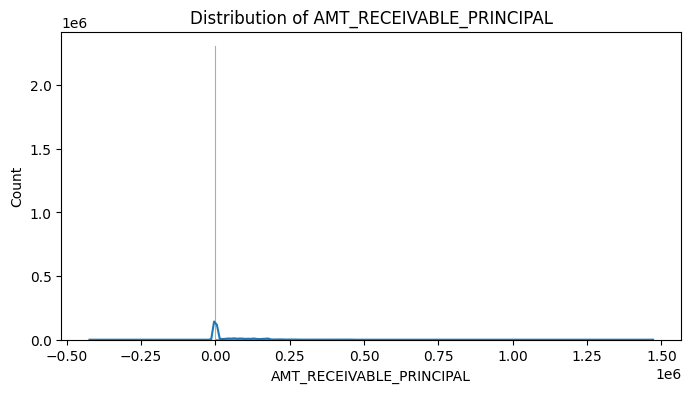

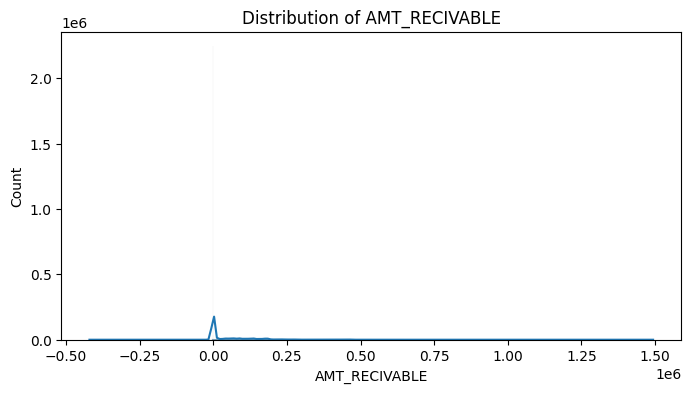

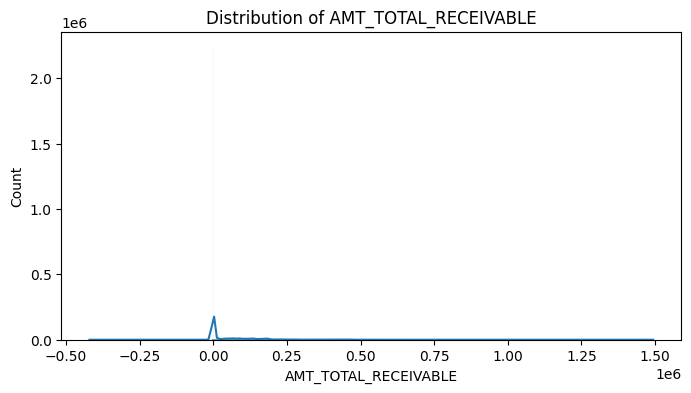

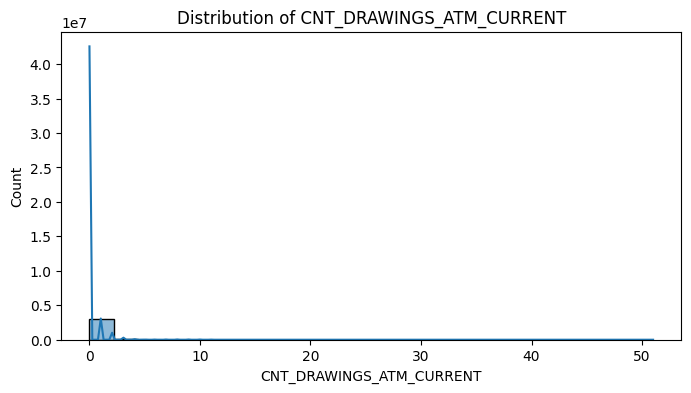

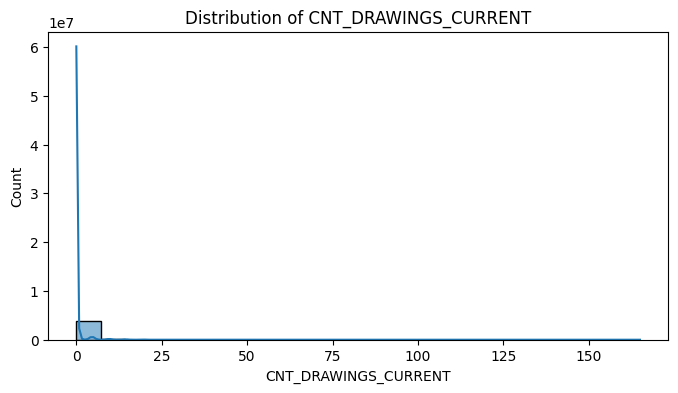

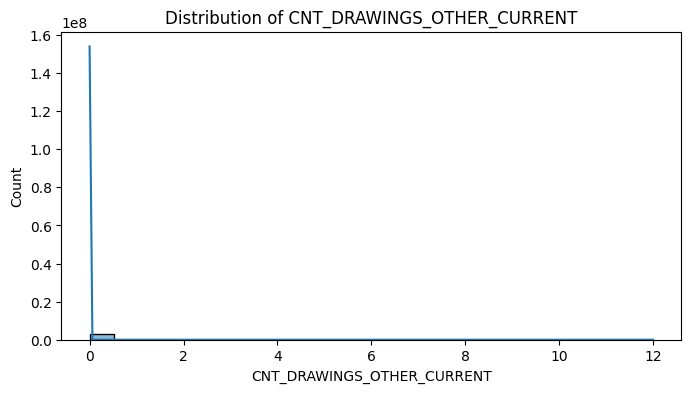

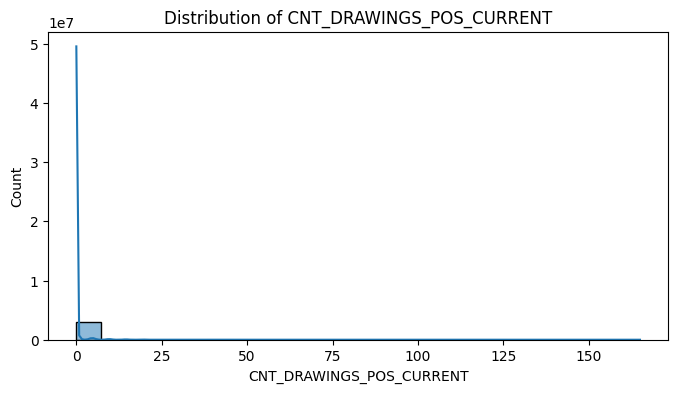

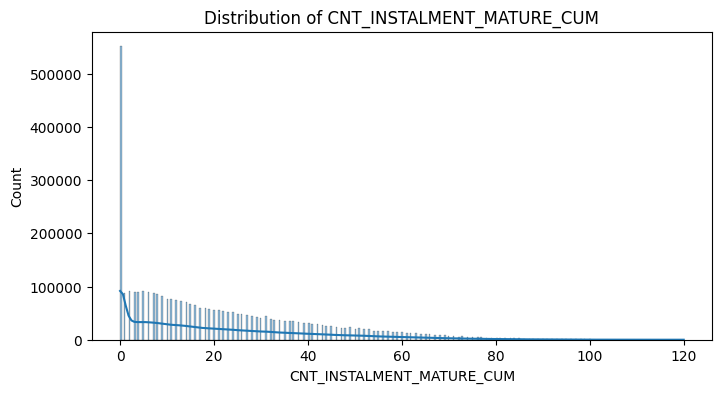

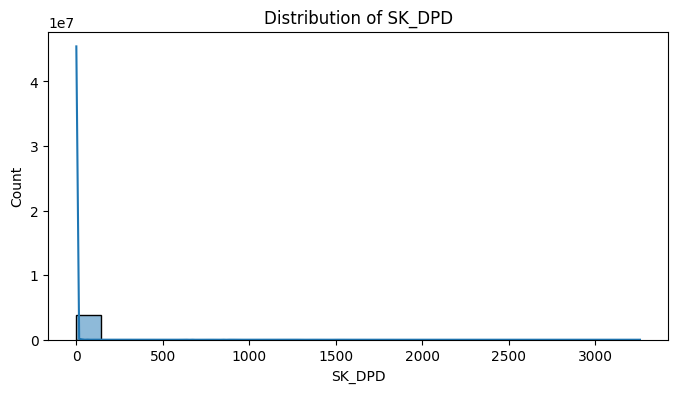

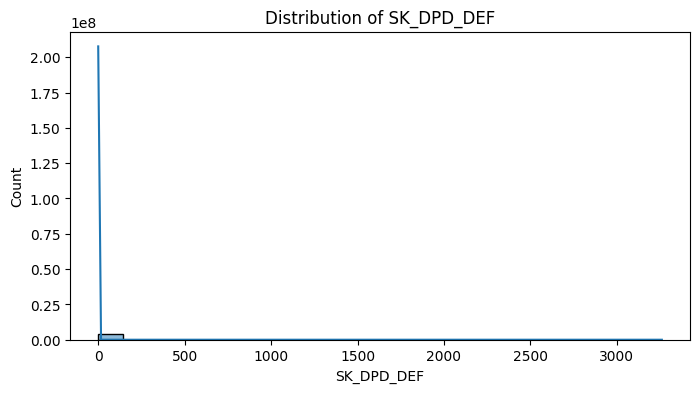

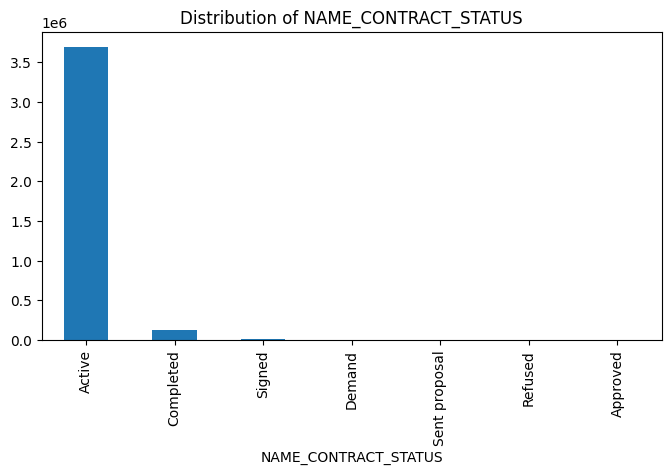

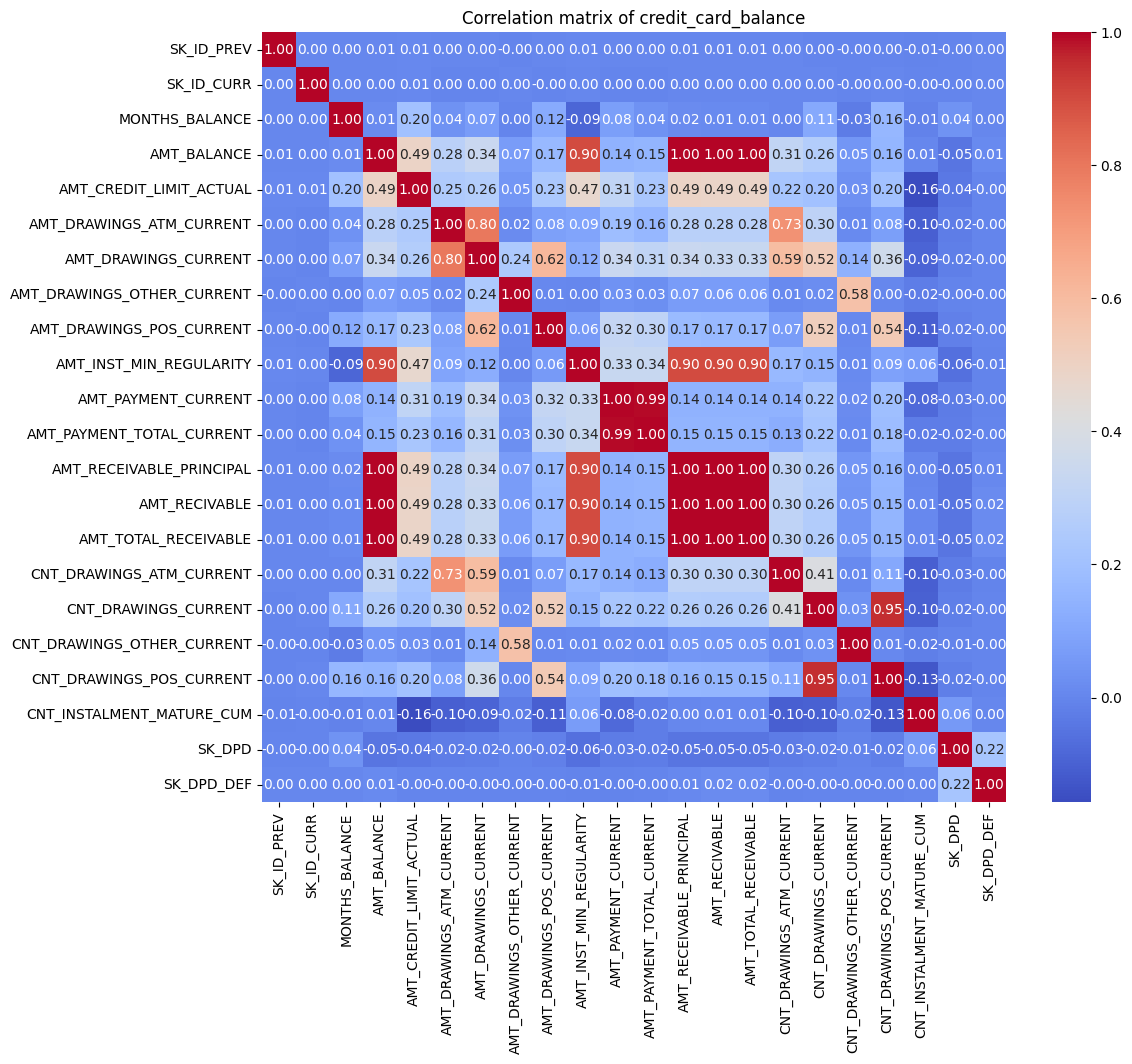

In [78]:
credit_card_balance = pd.read_csv(os.path.join(data_dir, 'credit_card_balance.csv'))

print("=== credit_card_balance EDA ===")

# Basic info
print(credit_card_balance.info())
print(credit_card_balance.describe())

# Missing values
print("\nMissing Values:")
print(credit_card_balance.isnull().sum())

# Distribution of numeric features
numeric_cols = credit_card_balance.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(credit_card_balance[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical features
categorical_cols = credit_card_balance.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    credit_card_balance[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(credit_card_balance[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of credit_card_balance')
plt.show()

### EDA for `POS_CASH_balance.csv`



In [ ]:
x# Load data
df_pos = pd.read_csv(os.path.join(data_dir,'POS_CASH_balance.csv'))

# Basic info
print("Shape of the data:", df_pos.shape)
print("\nColumn names:", df_pos.columns.tolist())
print("\nData types:\n", df_pos.dtypes)

# Missing values
missing = df_pos.isnull().mean().sort_values(ascending=False) * 100
print("\nMissing values (%):\n", missing[missing > 0])

# Unique values
print("\nUnique values per column:\n", df_pos.nunique())

# Distribution of contract status
print("\nContract Status Counts:\n", df_pos['NAME_CONTRACT_STATUS'].value_counts())

# DPD (Days Past Due) Summary
print("\nDPD Summary:\n", df_pos[['SK_DPD', 'SK_DPD_DEF']].describe())

# Plot: Contract Status Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_pos, x='NAME_CONTRACT_STATUS', order=df_pos['NAME_CONTRACT_STATUS'].value_counts().index)
plt.title('Contract Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Distribution of Installments Left
plt.figure(figsize=(8, 4))
sns.histplot(df_pos['CNT_INSTALMENT_FUTURE'].dropna(), bins=50, kde=True)
plt.title('Distribution of Remaining Installments')
plt.xlabel('CNT_INSTALMENT_FUTURE')
plt.tight_layout()
plt.show()

# Plot: Average DPD over Months
avg_dpd = df_pos.groupby('MONTHS_BALANCE')[['SK_DPD', 'SK_DPD_DEF']].mean()
avg_dpd.plot(title='Average DPD Over Time (by MONTHS_BALANCE)', figsize=(12, 5))
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Average DPD')
plt.grid(True)
plt.tight_layout()
plt.show()